In [1]:
import numpy as np
import pandas as pd
from nltk.probability import FreqDist
from pandas import DataFrame

from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
from scipy import stats
import itertools

from scipy import optimize
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import log as ln

import powerlaw

import numpy
import math

In [420]:
data = pd.read_csv('8x4.csv',sep = ',')

In [15]:
data.columns

Index(['Adam', 'Allison', 'April', 'Eve', 'Fraser', 'Peter', 'Naomi', 'Sarah',
       'Adam_mother_ir', 'Allison_mother_ir', 'April_mother_ir',
       'Eve_mother_ir', 'Fraser_mother_ir', 'Naomi_mother_ir',
       'Peter_mother_ir', 'Sarah_mother_ir', 'Adam_ir', 'April_ir',
       'Allison_ir', 'Eve_ir', 'Fraser_ir', 'Naomi_ir', 'Peter_ir', 'Sarah_ir',
       'Adam_mother', 'Allison_mother', 'April_mother', 'Eve_mother',
       'Fraser_mother', 'Naomi_mother', 'Peter_mother', 'Sarah_mother'],
      dtype='object')

In [228]:
data = pd.read_csv('8x4.csv',sep = ',')
Adam = data['Adam'].dropna()
Adam_ir = data['Adam_ir'].dropna()
Adam_x = list(range(1,len(Adam)+1))
Adam_ir_x = list(range(1,len(Adam_ir)+1)) 

In [11]:
kidlist = ['Adam', 'Eve','Sarah','Peter', 'Naomi', 'Allison', 'April', 'Fraser']

kid_ir


In [12]:
def get_child(kid):
    y = data[kid].dropna()
    y_ir = data['{}_ir'.format(kid)]
    x = np.array(range(1,len(y)+1))
    x_ir = np.array(range(1,len(y_ir)+1))
    return y,x,y_ir,x_ir

In [388]:
Adam

0      813.0
1      374.0
2      288.0
3      278.0
4      244.0
       ...  
301      1.0
302      1.0
303      1.0
304      1.0
305      1.0
Name: Adam, Length: 306, dtype: float64

Text(0.5, 1.0, 'Adam irregular verb')

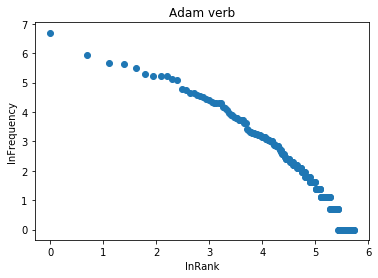

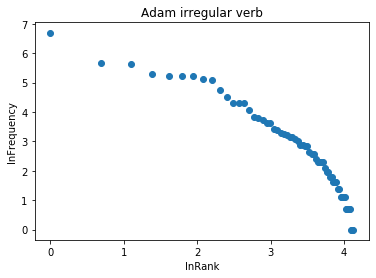

In [229]:
plt.figure()
plt.scatter(ln(Adam_x), ln(Adam))
plt.xlabel('lnRank')
plt.ylabel('lnFrequency')
plt.title ('Adam verb')

plt.figure()
plt.scatter(ln(Adam_ir_x), ln(Adam_ir))
plt.xlabel('lnRank')
plt.ylabel('lnFrequency')
plt.title ('Adam irregular verb')

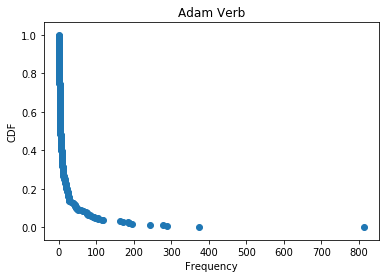

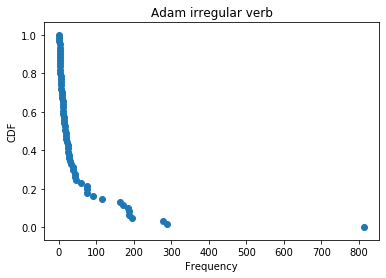

In [231]:
Asort = np.sort(Adam)
yvals=np.arange(len(Asort))/float(len(Asort)-1)
plt.scatter(Adam,yvals)
plt.xlabel('Frequency')
plt.ylabel('CDF')
plt.title('Adam Verb')
plt.show()

Asort_ir = np.sort(Adam_ir)
ir_yvals=np.arange(len(Asort_ir))/float(len(Asort_ir)-1)
plt.scatter(Adam_ir,ir_yvals)
plt.xlabel('Frequency')
plt.ylabel('CDF')
plt.title ('Adam irregular verb')
plt.show()

## Fitting based on y, x (frequency, rank)

In [33]:
##define fit_func
def Harmonic(N,s,q):
    total = 0.0
    for i in range(1,N+1):
        total += 1.0/((i+q)**s)
    return total
def zm(x, a, b, D):
    zm = D/(x+b)**a
    return zm
def pl(x, s, C):
    pl = C/x**(s)
    return pl
def yang(x, C):
    yan = C/x
    return yan
def lnfr(x, d, m, k):
    ln_fr = d - m*x**k
    return ln_fr 
def loglog (x, k, b):
    loglo = k*x + b
    return loglo

In [ ]:
def get_child(kid):
    y = data[kid].dropna()
    y_ir = data['{}_ir'.format(kid)]
    x = np.array(range(1,len(y)+1))
    x_ir = np.array(range(1,len(y_ir)+1))
    return y,x,y_ir,x_ir

In [26]:
class XY:
    def __init__(self, kid):
        self.kid = kid
    def verb (self,):
        yy = data[self.kid].dropna()
        xx = np.array(range(1,len(yy)+1))
        return yy, xx
    def v_ir (self):
        yy = data['{}_ir'.format(self.kid)].dropna()
        xx = np.array(range(1,len(yy)+1))
        return yy, xx
    def v_mot (self):
        yy = data['{}_mother'.format(self.kid)].dropna()
        xx = np.array(range(1,len(yy)+1))
        return yy, xx
    def v_mot_ir (self):
        yy = data['{}_mother_ir'.format(self.kid)].dropna()
        xx = np.array(range(1,len(yy)+1))
        return yy, xx

In [234]:
Adamy, Adamx = XY('Adam').verb()
Adamb, Adama = XY('Adam').v_ir()
Adamj, Adami = XY('Adam').v_mot()
Adamn, Adamm = XY('Adam').v_mot_ir()

In [235]:
Adamply_ir, Adamplpt_ir, Adampl_r_2_ir, Adampl_r_adj_ir, Adampl_ln_r2_ir = Parameter(Adama,Adamb).plaw()
Adamzmy_ir, Adamzmpt_ir, Adamzm_r_2_ir, Adamzm_r_adj_ir, Adamzm_ln_r2_ir = Parameter(Adama,Adamb).zipfm()
Adamyangy_ir, Adamyangpt_ir, Adamyang_r_2_ir, Adamyang_r_adj_ir, Adamyang_ln_r2_ir  = Parameter(Adama,Adamb).yangzipf()
Adamlogny_ir, Adamlnfrpt_ir, Adamlogn_r_2_ir, Adamlogn_r_adj_ir, Adamlogn_ln_r2_ir  = Parameter(Adama,Adamb).lognorm() 

Adamply, Adamplpt, Adampl_r_2, Adampl_r_adj, Adampl_ln_r2= Parameter(Adamx,Adamy).plaw()
Adamzmy, Adamzmpt, Adamzm_r_2, Adamzm_r_adj, Adamzm_ln_r2 = Parameter(Adamx,Adamy).zipfm()
Adamyangy, Adamyangpt, Adamyang_r_2, Adamyang_r_adj, Adamyang_ln_r2  = Parameter(Adamx,Adamy).yangzipf()
Adamlogny, Adamlnfrpt, Adamlogn_r_2, Adamlogn_r_adj, Adamlogn_ln_r2  = Parameter(Adamx,Adamy).lognorm()  

Adamply_mot, Adamplpt_mot, Adampl_r_2_mot, Adampl_r_adj_mot, Adampl_ln_r2_mot = Parameter(Adami,Adamj).plaw()
Adamzmy_mot, Adamzmpt_mot, Adamzm_r_2_mot, Adamzm_r_adj_mot, Adamzm_ln_r2_mot = Parameter(Adami,Adamj).zipfm()
Adamyangy_mot, Adamyangpt_mot, Adamyang_r_2_mot, Adamyang_r_adj_mot, Adamyang_ln_r2_mot  = Parameter(Adami,Adamj).yangzipf()
Adamlogny_mot, Adamlnfrpt_mot, Adamlogn_r_2_mot, Adamlogn_r_adj_mot, Adamlogn_ln_r2_mot  = Parameter(Adami,Adamj).lognorm() 

Adamply_mot_ir, Adamplpt_mot_ir, Adampl_r_2_mot_ir, Adampl_r_adj_mot_ir, Adampl_ln_r2_mot_ir = Parameter(Adamm,Adamn).plaw()
Adamzmy_mot_ir, Adamzmpt_mot_ir, Adamzm_r_2_mot_ir, Adamzm_r_adj_mot_ir, Adamzm_ln_r2_mot_ir = Parameter(Adamm,Adamn).zipfm()
Adamyangy_mot_ir, Adamyangpt_mot_ir, Adamyang_r_2_mot_ir, Adamyang_r_adj_mot_ir, Adamyang_ln_r2_mot_ir  = Parameter(Adamm,Adamn).yangzipf()
Adamlogny_mot_ir, Adamlnfrpt_mot_ir, Adamlogn_r_2_mot_ir, Adamlogn_r_adj_mot_ir, Adamlogn_ln_r2_mot_ir  = Parameter(Adamm,Adamn).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [276]:
afit1 = powerlaw.Fit(Adamy, discrete = True)
R1, p1= afit1.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R1, p1)
print('power law is a better fit is', R1>0)
print('and it is significant', p1<0.05)

-2.520493446852591 0.011719042038191213
power law is a better fit is False
and it is significant True


Calculating best minimal value for power law fit


In [278]:
afit2 = powerlaw.Fit(Adamb, discrete = True)
R2, p2= afit2.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R2, p2)
print('Adam irregular verb: power law is a better fit is', R2>0)
print('and it is significant', p2<0.05)
afit3 = powerlaw.Fit(Adamj, discrete = True)
R3, p3= afit3.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R3, p3)
print('Adam mother irregular verb: power law is a better fit is', R3>0)
print('and it is significant', p3<0.05)
afit4 = powerlaw.Fit(Adamn, discrete = True)
R4, p4= afit4.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R4, p4)
print('Adam mother irregular verb: power law is a better fit is', R4>0)
print('and it is significant', p4<0.05)

-1.3095462165026746 0.1903493932397956
Adam irregular verb: power law is a better fit is False
and it is significant False
-4.469917026642688 7.82499474336007e-06
Adam mother irregular verb: power law is a better fit is False
and it is significant True
-0.8810578709910537 0.3782864980477779
Adam mother irregular verb: power law is a better fit is False
and it is significant False


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


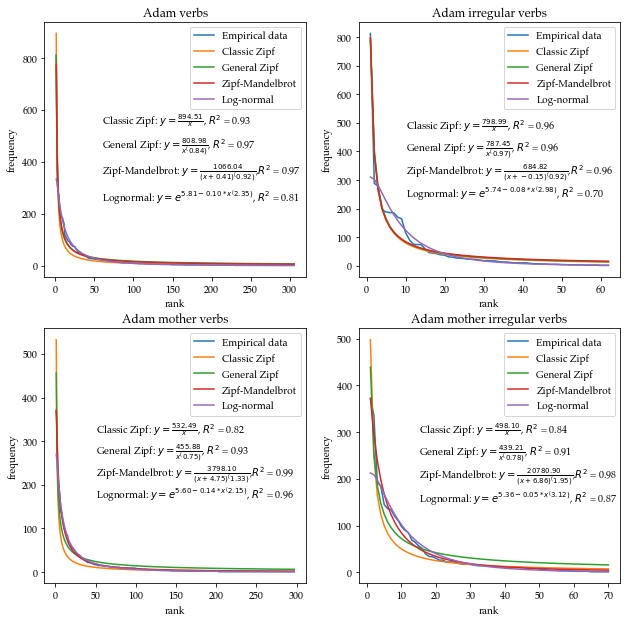

In [273]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(Adamx,Adamy,label ='Empirical data', color = '#1f77b4')
plt.plot(Adamx,Adamyangy, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Adamx,Adamply,label='General Zipf', color = '#2ca02c')
plt.plot(Adamx,Adamzmy,label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(Adamx,Adamlogny,label = 'Log-normal', color = '#9467bd')
plt.text(60, 550, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Adamyangpt, float(Adamyang_r_2)))
plt.text(60, 450, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Adamplpt[1], Adamplpt[0],float(Adampl_r_2)))
plt.text(60, 350, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Adamzmpt[2],Adamzmpt[1],Adamzmpt[0],float(Adamzm_r_2)))
plt.text(60, 250, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Adamlnfrpt[0], Adamlnfrpt[1], Adamlnfrpt[2], float(Adamlogn_r_2)))

plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Adam verbs')

plt.subplot(2,2,2)
plt.plot(Adama,Adamb,label ='Empirical data')
plt.plot(Adama,Adamyangy_ir, label = 'Classic Zipf')
plt.plot(Adama,Adamply_ir,label='General Zipf')
plt.plot(Adama,Adamzmy_ir,label='Zipf-Mandelbrot')
plt.plot(Adama,Adamlogny_ir,label = 'Log-normal')
plt.text(10, 480, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Adamyangpt_ir, float(Adamyang_r_2_ir)))
plt.text(10, 400, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Adamplpt_ir[1], Adamplpt_ir[0],float(Adampl_r_2_ir)))
plt.text(10, 320, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Adamzmpt_ir[2],Adamzmpt_ir[1],Adamzmpt_ir[0],float(Adamzm_r_2_ir)))
plt.text(10, 240, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^(%5.2f)}$, $R^2$ = %0.2f' % (Adamlnfrpt_ir[0], Adamlnfrpt_ir[1], Adamlnfrpt_ir[2], float(Adamlogn_r_2_ir)))

plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Adam irregular verbs')



plt.subplot(2,2,3)
plt.plot(Adami,Adamj,label ='Empirical data')
plt.plot(Adami,Adamyangy_mot, label = 'Classic Zipf')
plt.plot(Adami,Adamply_mot,label='General Zipf')
plt.plot(Adami,Adamzmy_mot,label='Zipf-Mandelbrot')
plt.plot(Adami,Adamlogny_mot,label = 'Log-normal')
plt.text(50, 320, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Adamyangpt_mot, float(Adamyang_r_2_mot)))
plt.text(50, 270, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Adamplpt_mot[1], Adamplpt_mot[0],float(Adampl_r_2_mot)))
plt.text(50, 220, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Adamzmpt_mot[2],Adamzmpt_mot[1],Adamzmpt_mot[0],float(Adamzm_r_2_mot)))
plt.text(50, 170, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Adamlnfrpt_mot[0], Adamlnfrpt_mot[1], Adamlnfrpt_mot[2], float(Adamlogn_r_2_mot)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Adam mother verbs')


plt.subplot(2,2,4)
plt.plot(Adamm,Adamn,label ='Empirical data')
plt.plot(Adamm,Adamyangy_mot_ir, label = 'Classic Zipf')
plt.plot(Adamm,Adamply_mot_ir,label='General Zipf')
plt.plot(Adamm,Adamzmy_mot_ir, label='Zipf-Mandelbrot')
plt.plot(Adamm,Adamlogny_mot_ir,label = 'Log-normal')
plt.text(15, 300, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Adamyangpt_mot_ir, float(Adamyang_r_2_mot_ir)))
plt.text(15, 250, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Adamplpt_mot_ir[1], Adamplpt_mot_ir[0],float(Adampl_r_2_mot_ir)))
plt.text(15, 200, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Adamzmpt_mot_ir[2],Adamzmpt_mot_ir[1],Adamzmpt_mot_ir[0],float(Adamzm_r_2_mot_ir)))
plt.text(15, 150, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Adamlnfrpt_mot_ir[0], Adamlnfrpt_mot_ir[1], Adamlnfrpt_mot_ir[2], float(Adamlogn_r_2_mot_ir)))

plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Adam mother irregular verbs')
figname = 'Adam_curve'
plt.savefig(figname+'.png',dpi = 300)

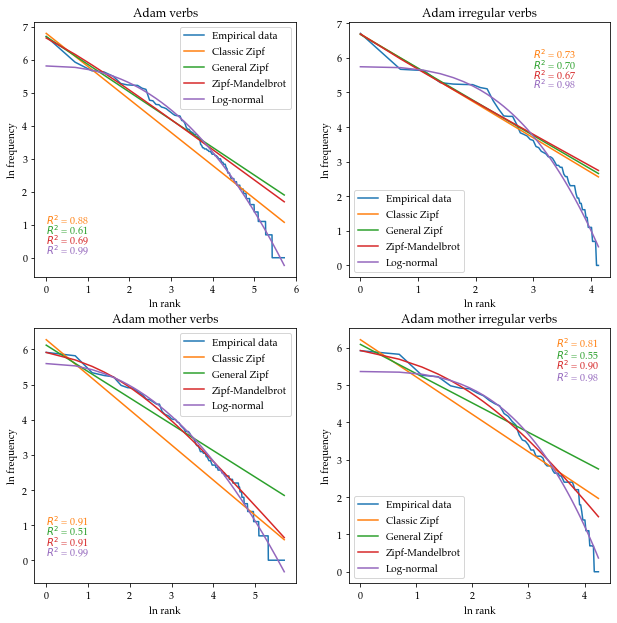

In [274]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(ln(Adamx),ln(Adamy),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Adamx),ln(Adamyangy), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Adamx),ln(Adamply),label='General Zipf', color = '#2ca02c')
plt.plot(ln(Adamx),ln(Adamzmy),label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(ln(Adamx),ln(Adamlogny),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Adamyang_ln_r2), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Adampl_ln_r2), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Adamzm_ln_r2), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Adamlogn_ln_r2), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Adam verbs')

plt.subplot(2,2,2)
plt.plot(ln(Adama),ln(Adamb),label ='Empirical data')
plt.plot(ln(Adama),ln(Adamyangy_ir), label = 'Classic Zipf')
plt.plot(ln(Adama),ln(Adamply_ir),label='General Zipf')
plt.plot(ln(Adama),ln(Adamzmy_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Adama),ln(Adamlogny_ir),label = 'Log-normal')
plt.text(3, 6, '$R^2$ = %0.2f' % float(Adamyang_ln_r2_ir), color = '#ff7f0e')
plt.text(3, 5.7, '$R^2$ = %0.2f' % float(Adampl_ln_r2_ir), color = '#2ca02c')
plt.text(3, 5.4, '$R^2$ = %0.2f' % float(Adamzm_ln_r2_ir), color = '#d62728')
plt.text(3, 5.1, '$R^2$ = %0.2f' % float(Adamlogn_ln_r2_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Adam irregular verbs')

plt.subplot(2,2,3)
plt.plot(ln(Adami), ln(Adamj),label ='Empirical data')
plt.plot(ln(Adami), ln(Adamyangy_mot),label = 'Classic Zipf')
plt.plot(ln(Adami), ln(Adamply_mot),label='General Zipf')
plt.plot(ln(Adami), ln(Adamzmy_mot),label='Zipf-Mandelbrot')
plt.plot(ln(Adami), ln(Adamlogny_mot),label = 'Log-normal')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Adamyang_ln_r2_mot), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Adampl_ln_r2_mot), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Adamzm_ln_r2_mot), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Adamlogn_ln_r2_mot), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Adam mother verbs')

plt.subplot(2,2,4)
plt.plot(ln(Adamm),ln(Adamn),label ='Empirical data')
plt.plot(ln(Adamm),ln(Adamyangy_mot_ir),label = 'Classic Zipf')
plt.plot(ln(Adamm),ln(Adamply_mot_ir),label='General Zipf')
plt.plot(ln(Adamm),ln(Adamzmy_mot_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Adamm),ln(Adamlogny_mot_ir),label = 'Log-normal')
plt.text(3.5, 6, '$R^2$ = %0.2f' % float(Adamyang_ln_r2_mot_ir), color = '#ff7f0e' )
plt.text(3.5, 5.7, '$R^2$ = %0.2f' % float(Adampl_ln_r2_mot_ir), color = '#2ca02c')
plt.text(3.5, 5.4, '$R^2$ = %0.2f' % float(Adamzm_ln_r2_mot_ir), color = '#d62728')
plt.text(3.5, 5.1, '$R^2$ = %0.2f' % float(Adamlogn_ln_r2_mot_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Adam mother irregular verbs')
figname = 'Adam_ln'
plt.savefig(figname+'.png', dpi =300)

In [243]:
Frasery, Fraserx = XY('Fraser').verb()
Fraserb, Frasera = XY('Fraser').v_ir()
Fraserj, Fraseri = XY('Fraser').v_mot()
Frasern, Fraserm = XY('Fraser').v_mot_ir()

Fraserply_ir, Fraserplpt_ir, Fraserpl_r_2_ir, Fraserpl_r_adj_ir, Fraserpl_ln_r2_ir = Parameter(Frasera,Fraserb).plaw()
Fraserzmy_ir, Fraserzmpt_ir, Fraserzm_r_2_ir, Fraserzm_r_adj_ir, Fraserzm_ln_r2_ir = Parameter(Frasera,Fraserb).zipfm()
Fraseryangy_ir, Fraseryangpt_ir, Fraseryang_r_2_ir, Fraseryang_r_adj_ir, Fraseryang_ln_r2_ir  = Parameter(Frasera,Fraserb).yangzipf()
Fraserlogny_ir, Fraserlnfrpt_ir, Fraserlogn_r_2_ir, Fraserlogn_r_adj_ir, Fraserlogn_ln_r2_ir  = Parameter(Frasera,Fraserb).lognorm() 

Fraserply, Fraserplpt, Fraserpl_r_2, Fraserpl_r_adj, Fraserpl_ln_r2= Parameter(Fraserx,Frasery).plaw()
Fraserzmy, Fraserzmpt, Fraserzm_r_2, Fraserzm_r_adj, Fraserzm_ln_r2 = Parameter(Fraserx,Frasery).zipfm()
Fraseryangy, Fraseryangpt, Fraseryang_r_2, Fraseryang_r_adj, Fraseryang_ln_r2  = Parameter(Fraserx,Frasery).yangzipf()
Fraserlogny, Fraserlnfrpt, Fraserlogn_r_2, Fraserlogn_r_adj, Fraserlogn_ln_r2  = Parameter(Fraserx,Frasery).lognorm()  

Fraserply_mot, Fraserplpt_mot, Fraserpl_r_2_mot, Fraserpl_r_adj_mot, Fraserpl_ln_r2_mot = Parameter(Fraseri,Fraserj).plaw()
Fraserzmy_mot, Fraserzmpt_mot, Fraserzm_r_2_mot, Fraserzm_r_adj_mot, Fraserzm_ln_r2_mot = Parameter(Fraseri,Fraserj).zipfm()
Fraseryangy_mot, Fraseryangpt_mot, Fraseryang_r_2_mot, Fraseryang_r_adj_mot, Fraseryang_ln_r2_mot  = Parameter(Fraseri,Fraserj).yangzipf()
Fraserlogny_mot, Fraserlnfrpt_mot, Fraserlogn_r_2_mot, Fraserlogn_r_adj_mot, Fraserlogn_ln_r2_mot  = Parameter(Fraseri,Fraserj).lognorm() 

Fraserply_mot_ir, Fraserplpt_mot_ir, Fraserpl_r_2_mot_ir, Fraserpl_r_adj_mot_ir, Fraserpl_ln_r2_mot_ir = Parameter(Fraserm,Frasern).plaw()
Fraserzmy_mot_ir, Fraserzmpt_mot_ir, Fraserzm_r_2_mot_ir, Fraserzm_r_adj_mot_ir, Fraserzm_ln_r2_mot_ir = Parameter(Fraserm,Frasern).zipfm()
Fraseryangy_mot_ir, Fraseryangpt_mot_ir, Fraseryang_r_2_mot_ir, Fraseryang_r_adj_mot_ir, Fraseryang_ln_r2_mot_ir  = Parameter(Fraserm,Frasern).yangzipf()
Fraserlogny_mot_ir, Fraserlnfrpt_mot_ir, Fraserlogn_r_2_mot_ir, Fraserlogn_r_adj_mot_ir, Fraserlogn_ln_r2_mot_ir  = Parameter(Fraserm,Frasern).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [279]:
afit1 = powerlaw.Fit(Frasery, discrete = True)
R1, p1= afit1.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R1, p1)
print('power law is a better fit is', R1>0)
print('and it is significant', p1<0.05)
afit2 = powerlaw.Fit(Fraserb, discrete = True)
R2, p2= afit2.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R2, p2)
print('Fraser irregular verb: power law is a better fit is', R2>0)
print('and it is significant', p2<0.05)
afit3 = powerlaw.Fit(Fraserj, discrete = True)
R3, p3= afit3.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R3, p3)
print('Fraser mother irregular verb: power law is a better fit is', R3>0)
print('and it is significant', p3<0.05)
afit4 = powerlaw.Fit(Frasern, discrete = True)
R4, p4= afit4.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R4, p4)
print('Fraser mother irregular verb: power law is a better fit is', R4>0)
print('and it is significant', p4<0.05)

-0.3165728662304314 0.7515677271943535
power law is a better fit is False
and it is significant False
-1.0998189067856166 0.2714110328537035
Fraser irregular verb: power law is a better fit is False
and it is significant False
-0.4259621532150361 0.6701354241857717
Fraser mother irregular verb: power law is a better fit is False
and it is significant False
-1.0808178202394683 0.27977815992614463
Fraser mother irregular verb: power law is a better fit is False
and it is significant False


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


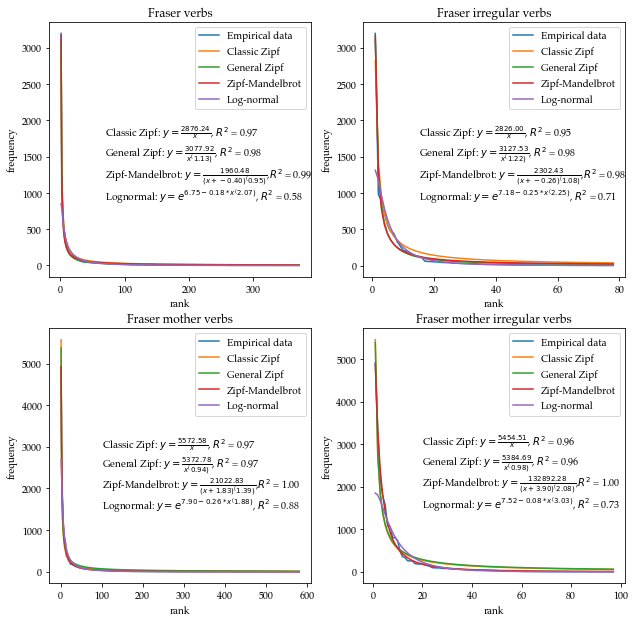

In [282]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(Fraserx,Frasery,label ='Empirical data', color = '#1f77b4')
plt.plot(Fraserx,Fraseryangy, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Fraserx,Fraserply,label='General Zipf', color = '#2ca02c')
plt.plot(Fraserx,Fraserzmy,label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(Fraserx,Fraserlogny,label = 'Log-normal', color = '#9467bd')
plt.text(70, 1800, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Fraseryangpt, float(Fraseryang_r_2)))
plt.text(70, 1500, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Fraserplpt[1], Fraserplpt[0],float(Fraserpl_r_2)))
plt.text(70, 1200, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Fraserzmpt[2],Fraserzmpt[1],Fraserzmpt[0],float(Fraserzm_r_2)))
plt.text(70, 900, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Fraserlnfrpt[0], Fraserlnfrpt[1], Fraserlnfrpt[2], float(Fraserlogn_r_2)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Fraser verbs')

plt.subplot(2,2,2)
plt.plot(Frasera,Fraserb,label ='Empirical data')
plt.plot(Frasera,Fraseryangy_ir, label = 'Classic Zipf')
plt.plot(Frasera,Fraserply_ir,label='General Zipf')
plt.plot(Frasera,Fraserzmy_ir,label='Zipf-Mandelbrot')
plt.plot(Frasera,Fraserlogny_ir,label = 'Log-normal')
plt.text(15, 1800, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Fraseryangpt_ir, float(Fraseryang_r_2_ir)))
plt.text(15, 1500, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Fraserplpt_ir[1], Fraserplpt_ir[0],float(Fraserpl_r_2_ir)))
plt.text(15, 1200, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Fraserzmpt_ir[2],Fraserzmpt_ir[1],Fraserzmpt_ir[0],float(Fraserzm_r_2_ir)))
plt.text(15, 900, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^(%5.2f)}$, $R^2$ = %0.2f' % (Fraserlnfrpt_ir[0], Fraserlnfrpt_ir[1], Fraserlnfrpt_ir[2], float(Fraserlogn_r_2_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Fraser irregular verbs')



plt.subplot(2,2,3)
plt.plot(Fraseri,Fraserj,label ='Empirical data')
plt.plot(Fraseri,Fraseryangy_mot, label = 'Classic Zipf')
plt.plot(Fraseri,Fraserply_mot,label='General Zipf')
plt.plot(Fraseri,Fraserzmy_mot,label='Zipf-Mandelbrot')
plt.plot(Fraseri,Fraserlogny_mot,label = 'Log-normal')
plt.text(100, 3000, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Fraseryangpt_mot, float(Fraseryang_r_2_mot)))
plt.text(100, 2500, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Fraserplpt_mot[1], Fraserplpt_mot[0],float(Fraserpl_r_2_mot)))
plt.text(100, 2000, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Fraserzmpt_mot[2],Fraserzmpt_mot[1],Fraserzmpt_mot[0],float(Fraserzm_r_2_mot)))
plt.text(100, 1500, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Fraserlnfrpt_mot[0], Fraserlnfrpt_mot[1], Fraserlnfrpt_mot[2], float(Fraserlogn_r_2_mot)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Fraser mother verbs')


plt.subplot(2,2,4)
plt.plot(Fraserm,Frasern,label ='Empirical data')
plt.plot(Fraserm,Fraseryangy_mot_ir, label = 'Classic Zipf')
plt.plot(Fraserm,Fraserply_mot_ir,label='General Zipf')
plt.plot(Fraserm,Fraserzmy_mot_ir, label='Zipf-Mandelbrot')
plt.plot(Fraserm,Fraserlogny_mot_ir,label = 'Log-normal')
plt.text(20, 3000, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Fraseryangpt_mot_ir, float(Fraseryang_r_2_mot_ir)))
plt.text(20, 2500, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Fraserplpt_mot_ir[1], Fraserplpt_mot_ir[0],float(Fraserpl_r_2_mot_ir)))
plt.text(20, 2000, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Fraserzmpt_mot_ir[2],Fraserzmpt_mot_ir[1],Fraserzmpt_mot_ir[0],float(Fraserzm_r_2_mot_ir)))
plt.text(20, 1500, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Fraserlnfrpt_mot_ir[0], Fraserlnfrpt_mot_ir[1], Fraserlnfrpt_mot_ir[2], float(Fraserlogn_r_2_mot_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Fraser mother irregular verbs')
figname = 'Fraser_curve'
plt.savefig(figname+'.png', dpi =300)





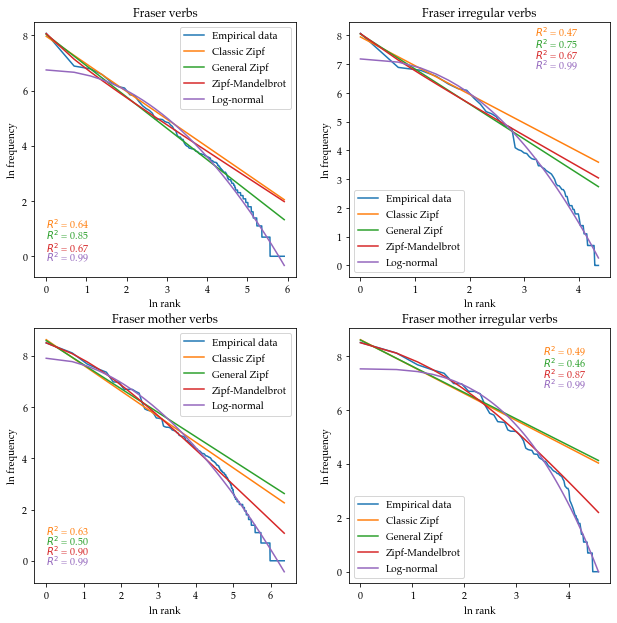

In [283]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(ln(Fraserx),ln(Frasery),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Fraserx),ln(Fraseryangy), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Fraserx),ln(Fraserply),label='General Zipf', color = '#2ca02c')
plt.plot(ln(Fraserx),ln(Fraserzmy),label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(ln(Fraserx),ln(Fraserlogny),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Fraseryang_ln_r2), color = '#ff7f0e' )
plt.text(0, 0.6, '$R^2$ = %0.2f' % float(Fraserpl_ln_r2), color = '#2ca02c')
plt.text(0, 0.2, '$R^2$ = %0.2f' % float(Fraserzm_ln_r2), color = '#d62728')
plt.text(0, -0.2, '$R^2$ = %0.2f' % float(Fraserlogn_ln_r2), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Fraser verbs')

plt.subplot(2,2,2)
plt.plot(ln(Frasera),ln(Fraserb),label ='Empirical data')
plt.plot(ln(Frasera),ln(Fraseryangy_ir), label = 'Classic Zipf')
plt.plot(ln(Frasera),ln(Fraserply_ir),label='General Zipf')
plt.plot(ln(Frasera),ln(Fraserzmy_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Frasera),ln(Fraserlogny_ir),label = 'Log-normal')
plt.text(3.2, 8, '$R^2$ = %0.2f' % float(Fraseryang_ln_r2_ir), color = '#ff7f0e')
plt.text(3.2, 7.6, '$R^2$ = %0.2f' % float(Fraserpl_ln_r2_ir), color = '#2ca02c')
plt.text(3.2, 7.2, '$R^2$ = %0.2f' % float(Fraserzm_ln_r2_ir), color = '#d62728')
plt.text(3.2, 6.8, '$R^2$ = %0.2f' % float(Fraserlogn_ln_r2_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Fraser irregular verbs')

plt.subplot(2,2,3)
plt.plot(ln(Fraseri), ln(Fraserj),label ='Empirical data')
plt.plot(ln(Fraseri), ln(Fraseryangy_mot),label = 'Classic Zipf')
plt.plot(ln(Fraseri), ln(Fraserply_mot),label='General Zipf')
plt.plot(ln(Fraseri), ln(Fraserzmy_mot),label='Zipf-Mandelbrot')
plt.plot(ln(Fraseri), ln(Fraserlogny_mot),label = 'Log-normal')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Fraseryang_ln_r2_mot), color = '#ff7f0e' )
plt.text(0, 0.6, '$R^2$ = %0.2f' % float(Fraserpl_ln_r2_mot), color = '#2ca02c')
plt.text(0, 0.2, '$R^2$ = %0.2f' % float(Fraserzm_ln_r2_mot), color = '#d62728')
plt.text(0, -0.2, '$R^2$ = %0.2f' % float(Fraserlogn_ln_r2_mot), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Fraser mother verbs')

plt.subplot(2,2,4)
plt.plot(ln(Fraserm),ln(Frasern),label ='Empirical data')
plt.plot(ln(Fraserm),ln(Fraseryangy_mot_ir),label = 'Classic Zipf')
plt.plot(ln(Fraserm),ln(Fraserply_mot_ir),label='General Zipf')
plt.plot(ln(Fraserm),ln(Fraserzmy_mot_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Fraserm),ln(Fraserlogny_mot_ir),label = 'Log-normal')
plt.text(3.5, 8, '$R^2$ = %0.2f' % float(Fraseryang_ln_r2_mot_ir), color = '#ff7f0e' )
plt.text(3.5, 7.6, '$R^2$ = %0.2f' % float(Fraserpl_ln_r2_mot_ir), color = '#2ca02c')
plt.text(3.5, 7.2, '$R^2$ = %0.2f' % float(Fraserzm_ln_r2_mot_ir), color = '#d62728')
plt.text(3.5, 6.8, '$R^2$ = %0.2f' % float(Fraserlogn_ln_r2_mot_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Fraser mother irregular verbs')

figname = 'Fraser_ln'
plt.savefig(figname+'.png', dpi =300)

In [248]:
Petery, Peterx = XY('Peter').verb()
Peterb, Petera = XY('Peter').v_ir()
Peterj, Peteri = XY('Peter').v_mot()
Petern, Peterm = XY('Peter').v_mot_ir()

Peterply_ir, Peterplpt_ir, Peterpl_r_2_ir, Peterpl_r_adj_ir, Peterpl_ln_r2_ir = Parameter(Petera,Peterb).plaw()
Peterzmy_ir, Peterzmpt_ir, Peterzm_r_2_ir, Peterzm_r_adj_ir, Peterzm_ln_r2_ir = Parameter(Petera,Peterb).zipfm()
Peteryangy_ir, Peteryangpt_ir, Peteryang_r_2_ir, Peteryang_r_adj_ir, Peteryang_ln_r2_ir  = Parameter(Petera,Peterb).yangzipf()
Peterlogny_ir, Peterlnfrpt_ir, Peterlogn_r_2_ir, Peterlogn_r_adj_ir, Peterlogn_ln_r2_ir  = Parameter(Petera,Peterb).lognorm() 

Peterply, Peterplpt, Peterpl_r_2, Peterpl_r_adj, Peterpl_ln_r2= Parameter(Peterx,Petery).plaw()
Peterzmy, Peterzmpt, Peterzm_r_2, Peterzm_r_adj, Peterzm_ln_r2 = Parameter(Peterx,Petery).zipfm()
Peteryangy, Peteryangpt, Peteryang_r_2, Peteryang_r_adj, Peteryang_ln_r2  = Parameter(Peterx,Petery).yangzipf()
Peterlogny, Peterlnfrpt, Peterlogn_r_2, Peterlogn_r_adj, Peterlogn_ln_r2  = Parameter(Peterx,Petery).lognorm()  

Peterply_mot, Peterplpt_mot, Peterpl_r_2_mot, Peterpl_r_adj_mot, Peterpl_ln_r2_mot = Parameter(Peteri,Peterj).plaw()
Peterzmy_mot, Peterzmpt_mot, Peterzm_r_2_mot, Peterzm_r_adj_mot, Peterzm_ln_r2_mot = Parameter(Peteri,Peterj).zipfm()
Peteryangy_mot, Peteryangpt_mot, Peteryang_r_2_mot, Peteryang_r_adj_mot, Peteryang_ln_r2_mot  = Parameter(Peteri,Peterj).yangzipf()
Peterlogny_mot, Peterlnfrpt_mot, Peterlogn_r_2_mot, Peterlogn_r_adj_mot, Peterlogn_ln_r2_mot  = Parameter(Peteri,Peterj).lognorm() 

Peterply_mot_ir, Peterplpt_mot_ir, Peterpl_r_2_mot_ir, Peterpl_r_adj_mot_ir, Peterpl_ln_r2_mot_ir = Parameter(Peterm,Petern).plaw()
Peterzmy_mot_ir, Peterzmpt_mot_ir, Peterzm_r_2_mot_ir, Peterzm_r_adj_mot_ir, Peterzm_ln_r2_mot_ir = Parameter(Peterm,Petern).zipfm()
Peteryangy_mot_ir, Peteryangpt_mot_ir, Peteryang_r_2_mot_ir, Peteryang_r_adj_mot_ir, Peteryang_ln_r2_mot_ir  = Parameter(Peterm,Petern).yangzipf()
Peterlogny_mot_ir, Peterlnfrpt_mot_ir, Peterlogn_r_2_mot_ir, Peterlogn_r_adj_mot_ir, Peterlogn_ln_r2_mot_ir  = Parameter(Peterm,Petern).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [284]:
afit1 = powerlaw.Fit(Petery, discrete = True)
R1, p1= afit1.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R1, p1)
print('Peter verb power law is a better fit is', R1>0)
print('and it is significant', p1<0.05)
afit2 = powerlaw.Fit(Peterb, discrete = True)
R2, p2= afit2.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R2, p2)
print('Peter irregular verb: power law is a better fit is', R2>0)
print('and it is significant', p2<0.05)
afit3 = powerlaw.Fit(Peterj, discrete = True)
R3, p3= afit3.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R3, p3)
print('Peter mother irregular verb: power law is a better fit is', R3>0)
print('and it is significant', p3<0.05)
afit4 = powerlaw.Fit(Petern, discrete = True)
R4, p4= afit4.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R4, p4)
print('Peter mother irregular verb: power law is a better fit is', R4>0)
print('and it is significant', p4<0.05)

-4.86373119812195 1.1519332822332769e-06
Peter verb power law is a better fit is False
and it is significant True
-2.0230123572666123 0.043071873499632506
Peter irregular verb: power law is a better fit is False
and it is significant True
-4.641645384089461 3.4564569284475234e-06
Peter mother irregular verb: power law is a better fit is False
and it is significant True
-1.752423391529777 0.0797010321466788
Peter mother irregular verb: power law is a better fit is False
and it is significant False


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


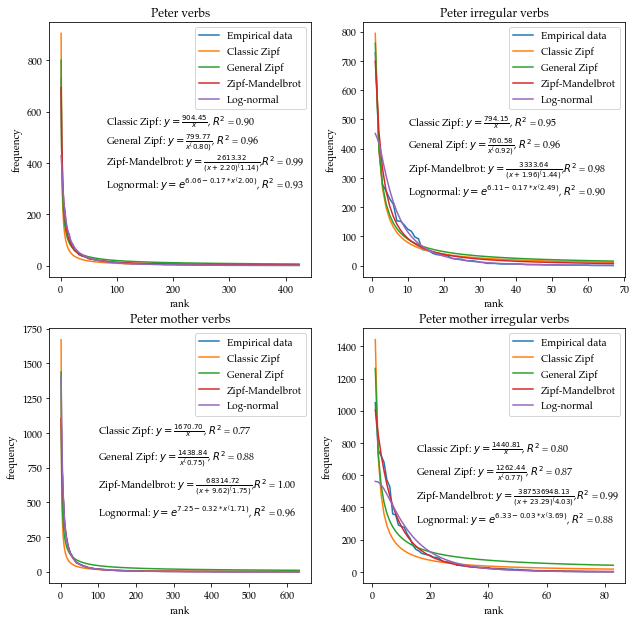

In [288]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(Peterx,Petery,label ='Empirical data', color = '#1f77b4')
plt.plot(Peterx,Peteryangy, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Peterx,Peterply,label='General Zipf', color = '#2ca02c')
plt.plot(Peterx,Peterzmy,label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(Peterx,Peterlogny,label = 'Log-normal', color = '#9467bd')
plt.text(80, 550, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Peteryangpt, float(Peteryang_r_2)))
plt.text(80, 470, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Peterplpt[1], Peterplpt[0],float(Peterpl_r_2)))
plt.text(80, 390, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Peterzmpt[2],Peterzmpt[1],Peterzmpt[0],float(Peterzm_r_2)))
plt.text(80, 300, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Peterlnfrpt[0], Peterlnfrpt[1], Peterlnfrpt[2], float(Peterlogn_r_2)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Peter verbs')

plt.subplot(2,2,2)
plt.plot(Petera,Peterb,label ='Empirical data')
plt.plot(Petera,Peteryangy_ir, label = 'Classic Zipf')
plt.plot(Petera,Peterply_ir,label='General Zipf')
plt.plot(Petera,Peterzmy_ir,label='Zipf-Mandelbrot')
plt.plot(Petera,Peterlogny_ir,label = 'Log-normal')
plt.text(10, 480, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Peteryangpt_ir, float(Peteryang_r_2_ir)))
plt.text(10, 400, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Peterplpt_ir[1], Peterplpt_ir[0],float(Peterpl_r_2_ir)))
plt.text(10, 320, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Peterzmpt_ir[2],Peterzmpt_ir[1],Peterzmpt_ir[0],float(Peterzm_r_2_ir)))
plt.text(10, 240, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^(%5.2f)}$, $R^2$ = %0.2f' % (Peterlnfrpt_ir[0], Peterlnfrpt_ir[1], Peterlnfrpt_ir[2], float(Peterlogn_r_2_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Peter irregular verbs')



plt.subplot(2,2,3)
plt.plot(Peteri,Peterj,label ='Empirical data')
plt.plot(Peteri,Peteryangy_mot, label = 'Classic Zipf')
plt.plot(Peteri,Peterply_mot,label='General Zipf')
plt.plot(Peteri,Peterzmy_mot,label='Zipf-Mandelbrot')
plt.plot(Peteri,Peterlogny_mot,label = 'Log-normal')
plt.text(100, 1000, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Peteryangpt_mot, float(Peteryang_r_2_mot)))
plt.text(100, 800, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Peterplpt_mot[1], Peterplpt_mot[0],float(Peterpl_r_2_mot)))
plt.text(100, 600, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Peterzmpt_mot[2],Peterzmpt_mot[1],Peterzmpt_mot[0],float(Peterzm_r_2_mot)))
plt.text(100, 400, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Peterlnfrpt_mot[0], Peterlnfrpt_mot[1], Peterlnfrpt_mot[2], float(Peterlogn_r_2_mot)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Peter mother verbs')


plt.subplot(2,2,4)
plt.plot(Peterm,Petern,label ='Empirical data')
plt.plot(Peterm,Peteryangy_mot_ir, label = 'Classic Zipf')
plt.plot(Peterm,Peterply_mot_ir,label='General Zipf')
plt.plot(Peterm,Peterzmy_mot_ir, label='Zipf-Mandelbrot')
plt.plot(Peterm,Peterlogny_mot_ir,label = 'Log-normal')
plt.text(15, 750, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Peteryangpt_mot_ir, float(Peteryang_r_2_mot_ir)))
plt.text(15, 600, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Peterplpt_mot_ir[1], Peterplpt_mot_ir[0],float(Peterpl_r_2_mot_ir)))
plt.text(15, 450, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Peterzmpt_mot_ir[2],Peterzmpt_mot_ir[1],Peterzmpt_mot_ir[0],float(Peterzm_r_2_mot_ir)))
plt.text(15, 300, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Peterlnfrpt_mot_ir[0], Peterlnfrpt_mot_ir[1], Peterlnfrpt_mot_ir[2], float(Peterlogn_r_2_mot_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Peter mother irregular verbs')
figname = 'Peter_curve'
plt.savefig(figname+'.png', dpi =300)





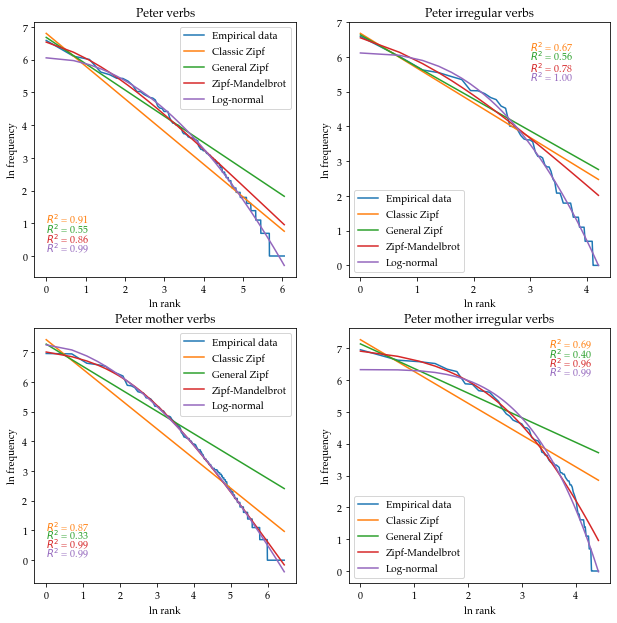

In [289]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(ln(Peterx),ln(Petery),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Peterx),ln(Peteryangy), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Peterx),ln(Peterply),label='General Zipf', color = '#2ca02c')
plt.plot(ln(Peterx),ln(Peterzmy),label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(ln(Peterx),ln(Peterlogny),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Peteryang_ln_r2), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Peterpl_ln_r2), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Peterzm_ln_r2), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Peterlogn_ln_r2), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Peter verbs')

plt.subplot(2,2,2)
plt.plot(ln(Petera),ln(Peterb),label ='Empirical data')
plt.plot(ln(Petera),ln(Peteryangy_ir), label = 'Classic Zipf')
plt.plot(ln(Petera),ln(Peterply_ir),label='General Zipf')
plt.plot(ln(Petera),ln(Peterzmy_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Petera),ln(Peterlogny_ir),label = 'Log-normal')
plt.text(3, 6.2, '$R^2$ = %0.2f' % float(Peteryang_ln_r2_ir), color = '#ff7f0e')
plt.text(3, 5.9, '$R^2$ = %0.2f' % float(Peterpl_ln_r2_ir), color = '#2ca02c')
plt.text(3, 5.6, '$R^2$ = %0.2f' % float(Peterzm_ln_r2_ir), color = '#d62728')
plt.text(3, 5.3, '$R^2$ = %0.2f' % float(Peterlogn_ln_r2_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Peter irregular verbs')

plt.subplot(2,2,3)
plt.plot(ln(Peteri), ln(Peterj),label ='Empirical data')
plt.plot(ln(Peteri), ln(Peteryangy_mot),label = 'Classic Zipf')
plt.plot(ln(Peteri), ln(Peterply_mot),label='General Zipf')
plt.plot(ln(Peteri), ln(Peterzmy_mot),label='Zipf-Mandelbrot')
plt.plot(ln(Peteri), ln(Peterlogny_mot),label = 'Log-normal')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Peteryang_ln_r2_mot), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Peterpl_ln_r2_mot), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Peterzm_ln_r2_mot), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Peterlogn_ln_r2_mot), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Peter mother verbs')

plt.subplot(2,2,4)
plt.plot(ln(Peterm),ln(Petern),label ='Empirical data')
plt.plot(ln(Peterm),ln(Peteryangy_mot_ir),label = 'Classic Zipf')
plt.plot(ln(Peterm),ln(Peterply_mot_ir),label='General Zipf')
plt.plot(ln(Peterm),ln(Peterzmy_mot_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Peterm),ln(Peterlogny_mot_ir),label = 'Log-normal')
plt.text(3.5, 7, '$R^2$ = %0.2f' % float(Peteryang_ln_r2_mot_ir), color = '#ff7f0e' )
plt.text(3.5, 6.7, '$R^2$ = %0.2f' % float(Peterpl_ln_r2_mot_ir), color = '#2ca02c')
plt.text(3.5, 6.4, '$R^2$ = %0.2f' % float(Peterzm_ln_r2_mot_ir), color = '#d62728')
plt.text(3.5, 6.1, '$R^2$ = %0.2f' % float(Peterlogn_ln_r2_mot_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Peter mother irregular verbs')

figname = 'Peter_ln'
plt.savefig(figname+'.png', dpi =300)

In [290]:
Naomiy, Naomix = XY('Naomi').verb()
Naomib, Naomia = XY('Naomi').v_ir()
Naomij, Naomii = XY('Naomi').v_mot()
Naomin, Naomim = XY('Naomi').v_mot_ir()

Naomiply_ir, Naomiplpt_ir, Naomipl_r_2_ir, Naomipl_r_adj_ir, Naomipl_ln_r2_ir = Parameter(Naomia,Naomib).plaw()
Naomizmy_ir, Naomizmpt_ir, Naomizm_r_2_ir, Naomizm_r_adj_ir, Naomizm_ln_r2_ir = Parameter(Naomia,Naomib).zipfm()
Naomiyangy_ir, Naomiyangpt_ir, Naomiyang_r_2_ir, Naomiyang_r_adj_ir, Naomiyang_ln_r2_ir  = Parameter(Naomia,Naomib).yangzipf()
Naomilogny_ir, Naomilnfrpt_ir, Naomilogn_r_2_ir, Naomilogn_r_adj_ir, Naomilogn_ln_r2_ir  = Parameter(Naomia,Naomib).lognorm() 

Naomiply, Naomiplpt, Naomipl_r_2, Naomipl_r_adj, Naomipl_ln_r2= Parameter(Naomix,Naomiy).plaw()
Naomizmy, Naomizmpt, Naomizm_r_2, Naomizm_r_adj, Naomizm_ln_r2 = Parameter(Naomix,Naomiy).zipfm()
Naomiyangy, Naomiyangpt, Naomiyang_r_2, Naomiyang_r_adj, Naomiyang_ln_r2  = Parameter(Naomix,Naomiy).yangzipf()
Naomilogny, Naomilnfrpt, Naomilogn_r_2, Naomilogn_r_adj, Naomilogn_ln_r2  = Parameter(Naomix,Naomiy).lognorm()  

Naomiply_mot, Naomiplpt_mot, Naomipl_r_2_mot, Naomipl_r_adj_mot, Naomipl_ln_r2_mot = Parameter(Naomii,Naomij).plaw()
Naomizmy_mot, Naomizmpt_mot, Naomizm_r_2_mot, Naomizm_r_adj_mot, Naomizm_ln_r2_mot = Parameter(Naomii,Naomij).zipfm()
Naomiyangy_mot, Naomiyangpt_mot, Naomiyang_r_2_mot, Naomiyang_r_adj_mot, Naomiyang_ln_r2_mot  = Parameter(Naomii,Naomij).yangzipf()
Naomilogny_mot, Naomilnfrpt_mot, Naomilogn_r_2_mot, Naomilogn_r_adj_mot, Naomilogn_ln_r2_mot  = Parameter(Naomii,Naomij).lognorm() 

Naomiply_mot_ir, Naomiplpt_mot_ir, Naomipl_r_2_mot_ir, Naomipl_r_adj_mot_ir, Naomipl_ln_r2_mot_ir = Parameter(Naomim,Naomin).plaw()
#Naomizmy_mot_ir, Naomizmpt_mot_ir, Naomizm_r_2_mot_ir, Naomizm_r_adj_mot_ir, Naomizm_ln_r2_mot_ir = Parameter(Naomim,Naomin).zipfm()
Naomiyangy_mot_ir, Naomiyangpt_mot_ir, Naomiyang_r_2_mot_ir, Naomiyang_r_adj_mot_ir, Naomiyang_ln_r2_mot_ir  = Parameter(Naomim,Naomin).yangzipf()
Naomilogny_mot_ir, Naomilnfrpt_mot_ir, Naomilogn_r_2_mot_ir, Naomilogn_r_adj_mot_ir, Naomilogn_ln_r2_mot_ir  = Parameter(Naomim,Naomin).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [291]:
afit1 = powerlaw.Fit(Naomiy, discrete = True)
R1, p1= afit1.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R1, p1)
print('Naomi verb power law is a better fit is', R1>0)
print('and it is significant', p1<0.05)
afit2 = powerlaw.Fit(Naomib, discrete = True)
R2, p2= afit2.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R2, p2)
print('Naomi irregular verb: power law is a better fit is', R2>0)
print('and it is significant', p2<0.05)
afit3 = powerlaw.Fit(Naomij, discrete = True)
R3, p3= afit3.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R3, p3)
print('Naomi mother irregular verb: power law is a better fit is', R3>0)
print('and it is significant', p3<0.05)
afit4 = powerlaw.Fit(Naomin, discrete = True)
R4, p4= afit4.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R4, p4)
print('Naomi mother irregular verb: power law is a better fit is', R4>0)
print('and it is significant', p4<0.05)

-3.2082435128751436 0.0013354836980962023
Naomi verb power law is a better fit is False
and it is significant True
-0.03961406749559427 0.9684008120032318
Naomi irregular verb: power law is a better fit is False
and it is significant False
-1.114187795114514 0.2651986302497573
Naomi mother irregular verb: power law is a better fit is False
and it is significant False
-1.283670635043194 0.1992572232664842
Naomi mother irregular verb: power law is a better fit is False
and it is significant False


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


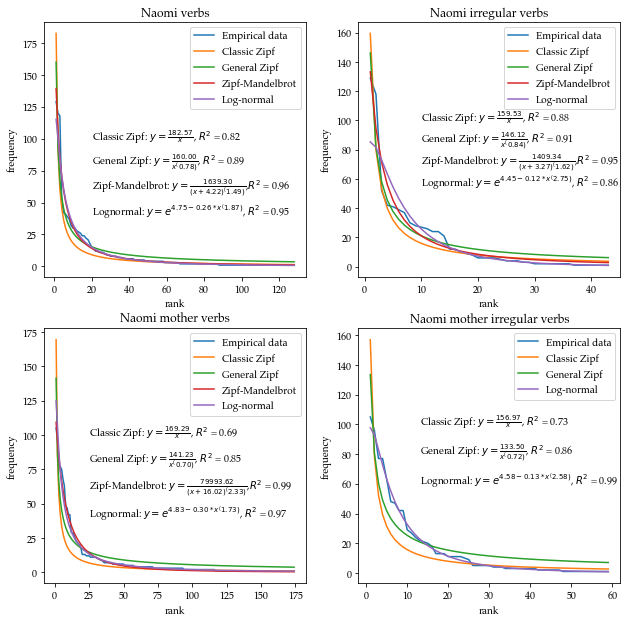

In [295]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(Naomix,Naomiy,label ='Empirical data', color = '#1f77b4')
plt.plot(Naomix,Naomiyangy, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Naomix,Naomiply,label='General Zipf', color = '#2ca02c')
plt.plot(Naomix,Naomizmy,label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(Naomix,Naomilogny,label = 'Log-normal', color = '#9467bd')
plt.text(20, 100, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Naomiyangpt, float(Naomiyang_r_2)))
plt.text(20, 80, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Naomiplpt[1], Naomiplpt[0],float(Naomipl_r_2)))
plt.text(20, 60, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Naomizmpt[2],Naomizmpt[1],Naomizmpt[0],float(Naomizm_r_2)))
plt.text(20, 40, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Naomilnfrpt[0], Naomilnfrpt[1], Naomilnfrpt[2], float(Naomilogn_r_2)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Naomi verbs')

plt.subplot(2,2,2)
plt.plot(Naomia,Naomib,label ='Empirical data')
plt.plot(Naomia,Naomiyangy_ir, label = 'Classic Zipf')
plt.plot(Naomia,Naomiply_ir,label='General Zipf')
plt.plot(Naomia,Naomizmy_ir,label='Zipf-Mandelbrot')
plt.plot(Naomia,Naomilogny_ir,label = 'Log-normal')
plt.text(10, 100, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Naomiyangpt_ir, float(Naomiyang_r_2_ir)))
plt.text(10, 85, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Naomiplpt_ir[1], Naomiplpt_ir[0],float(Naomipl_r_2_ir)))
plt.text(10, 70, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Naomizmpt_ir[2],Naomizmpt_ir[1],Naomizmpt_ir[0],float(Naomizm_r_2_ir)))
plt.text(10, 55, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^(%5.2f)}$, $R^2$ = %0.2f' % (Naomilnfrpt_ir[0], Naomilnfrpt_ir[1], Naomilnfrpt_ir[2], float(Naomilogn_r_2_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Naomi irregular verbs')



plt.subplot(2,2,3)
plt.plot(Naomii,Naomij,label ='Empirical data')
plt.plot(Naomii,Naomiyangy_mot, label = 'Classic Zipf')
plt.plot(Naomii,Naomiply_mot,label='General Zipf')
plt.plot(Naomii,Naomizmy_mot,label='Zipf-Mandelbrot')
plt.plot(Naomii,Naomilogny_mot,label = 'Log-normal')
plt.text(25, 100, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Naomiyangpt_mot, float(Naomiyang_r_2_mot)))
plt.text(25, 80, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Naomiplpt_mot[1], Naomiplpt_mot[0],float(Naomipl_r_2_mot)))
plt.text(25, 60, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Naomizmpt_mot[2],Naomizmpt_mot[1],Naomizmpt_mot[0],float(Naomizm_r_2_mot)))
plt.text(25, 40, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Naomilnfrpt_mot[0], Naomilnfrpt_mot[1], Naomilnfrpt_mot[2], float(Naomilogn_r_2_mot)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Naomi mother verbs')


plt.subplot(2,2,4)
plt.plot(Naomim,Naomin,label ='Empirical data',color = '#1f77b4')
plt.plot(Naomim,Naomiyangy_mot_ir, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Naomim,Naomiply_mot_ir,label='General Zipf', color = '#2ca02c')
#plt.plot(Naomim,Naomizmy_mot_ir, label='Zipf-Mandelbrot')
plt.plot(Naomim,Naomilogny_mot_ir,label = 'Log-normal', color = '#9467bd')
plt.text(13, 100, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Naomiyangpt_mot_ir, float(Naomiyang_r_2_mot_ir)))
plt.text(13, 80, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Naomiplpt_mot_ir[1], Naomiplpt_mot_ir[0],float(Naomipl_r_2_mot_ir)))
#plt.text(15, 60, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Naomizmpt_mot_ir[2],Naomizmpt_mot_ir[1],Naomizmpt_mot_ir[0],float(Naomizm_r_2_mot_ir)))
plt.text(13, 60, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Naomilnfrpt_mot_ir[0], Naomilnfrpt_mot_ir[1], Naomilnfrpt_mot_ir[2], float(Naomilogn_r_2_mot_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Naomi mother irregular verbs')
figname = 'Naomi_curve'
plt.savefig(figname+'.png', dpi =300)


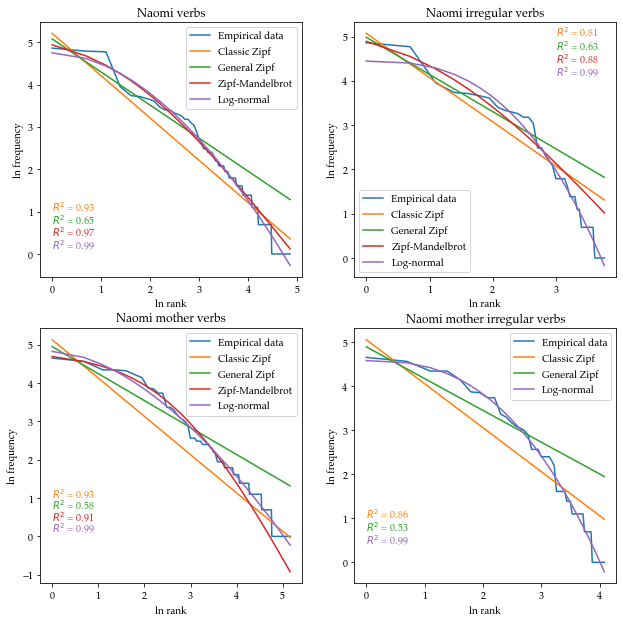

In [296]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(ln(Naomix),ln(Naomiy),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Naomix),ln(Naomiyangy), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Naomix),ln(Naomiply),label='General Zipf', color = '#2ca02c')
plt.plot(ln(Naomix),ln(Naomizmy),label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(ln(Naomix),ln(Naomilogny),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Naomiyang_ln_r2), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Naomipl_ln_r2), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Naomizm_ln_r2), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Naomilogn_ln_r2), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Naomi verbs')

plt.subplot(2,2,2)
plt.plot(ln(Naomia),ln(Naomib),label ='Empirical data')
plt.plot(ln(Naomia),ln(Naomiyangy_ir), label = 'Classic Zipf')
plt.plot(ln(Naomia),ln(Naomiply_ir),label='General Zipf')
plt.plot(ln(Naomia),ln(Naomizmy_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Naomia),ln(Naomilogny_ir),label = 'Log-normal')
plt.text(3, 5, '$R^2$ = %0.2f' % float(Naomiyang_ln_r2_ir), color = '#ff7f0e')
plt.text(3, 4.7, '$R^2$ = %0.2f' % float(Naomipl_ln_r2_ir), color = '#2ca02c')
plt.text(3, 4.4, '$R^2$ = %0.2f' % float(Naomizm_ln_r2_ir), color = '#d62728')
plt.text(3, 4.1, '$R^2$ = %0.2f' % float(Naomilogn_ln_r2_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Naomi irregular verbs')

plt.subplot(2,2,3)
plt.plot(ln(Naomii), ln(Naomij),label ='Empirical data')
plt.plot(ln(Naomii), ln(Naomiyangy_mot),label = 'Classic Zipf')
plt.plot(ln(Naomii), ln(Naomiply_mot),label='General Zipf')
plt.plot(ln(Naomii), ln(Naomizmy_mot),label='Zipf-Mandelbrot')
plt.plot(ln(Naomii), ln(Naomilogny_mot),label = 'Log-normal')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Naomiyang_ln_r2_mot), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Naomipl_ln_r2_mot), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Naomizm_ln_r2_mot), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Naomilogn_ln_r2_mot), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Naomi mother verbs')

plt.subplot(2,2,4)
plt.plot(ln(Naomim),ln(Naomin),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Naomim),ln(Naomiyangy_mot_ir),label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Naomim),ln(Naomiply_mot_ir),label='General Zipf', color = '#2ca02c')
#plt.plot(ln(Naomim),ln(Naomizmy_mot_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Naomim),ln(Naomilogny_mot_ir),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Naomiyang_ln_r2_mot_ir), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Naomipl_ln_r2_mot_ir), color = '#2ca02c')
#plt.text(3.5, 6.4, '$R^2$ = %0.2f' % float(Naomizm_ln_r2_mot_ir), color = '#d62728')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Naomilogn_ln_r2_mot_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Naomi mother irregular verbs')

figname = 'Naomi_ln'
plt.savefig(figname+'.png', dpi =300)

In [299]:
Allisony, Allisonx = XY('Allison').verb()
Allisonb, Allisona = XY('Allison').v_ir()
Allisonj, Allisoni = XY('Allison').v_mot()
Allisonn, Allisonm = XY('Allison').v_mot_ir()

Allisonply_ir, Allisonplpt_ir, Allisonpl_r_2_ir, Allisonpl_r_adj_ir, Allisonpl_ln_r2_ir = Parameter(Allisona,Allisonb).plaw()
Allisonzmy_ir, Allisonzmpt_ir, Allisonzm_r_2_ir, Allisonzm_r_adj_ir, Allisonzm_ln_r2_ir = Parameter(Allisona,Allisonb).zipfm()
Allisonyangy_ir, Allisonyangpt_ir, Allisonyang_r_2_ir, Allisonyang_r_adj_ir, Allisonyang_ln_r2_ir  = Parameter(Allisona,Allisonb).yangzipf()
Allisonlogny_ir, Allisonlnfrpt_ir, Allisonlogn_r_2_ir, Allisonlogn_r_adj_ir, Allisonlogn_ln_r2_ir  = Parameter(Allisona,Allisonb).lognorm() 

Allisonply, Allisonplpt, Allisonpl_r_2, Allisonpl_r_adj, Allisonpl_ln_r2= Parameter(Allisonx,Allisony).plaw()
Allisonzmy, Allisonzmpt, Allisonzm_r_2, Allisonzm_r_adj, Allisonzm_ln_r2 = Parameter(Allisonx,Allisony).zipfm()
Allisonyangy, Allisonyangpt, Allisonyang_r_2, Allisonyang_r_adj, Allisonyang_ln_r2  = Parameter(Allisonx,Allisony).yangzipf()
Allisonlogny, Allisonlnfrpt, Allisonlogn_r_2, Allisonlogn_r_adj, Allisonlogn_ln_r2  = Parameter(Allisonx,Allisony).lognorm()  

Allisonply_mot, Allisonplpt_mot, Allisonpl_r_2_mot, Allisonpl_r_adj_mot, Allisonpl_ln_r2_mot = Parameter(Allisoni,Allisonj).plaw()
Allisonzmy_mot, Allisonzmpt_mot, Allisonzm_r_2_mot, Allisonzm_r_adj_mot, Allisonzm_ln_r2_mot = Parameter(Allisoni,Allisonj).zipfm()
Allisonyangy_mot, Allisonyangpt_mot, Allisonyang_r_2_mot, Allisonyang_r_adj_mot, Allisonyang_ln_r2_mot  = Parameter(Allisoni,Allisonj).yangzipf()
Allisonlogny_mot, Allisonlnfrpt_mot, Allisonlogn_r_2_mot, Allisonlogn_r_adj_mot, Allisonlogn_ln_r2_mot  = Parameter(Allisoni,Allisonj).lognorm() 

Allisonply_mot_ir, Allisonplpt_mot_ir, Allisonpl_r_2_mot_ir, Allisonpl_r_adj_mot_ir, Allisonpl_ln_r2_mot_ir = Parameter(Allisonm,Allisonn).plaw()
#Allisonzmy_mot_ir, Allisonzmpt_mot_ir, Allisonzm_r_2_mot_ir, Allisonzm_r_adj_mot_ir, Allisonzm_ln_r2_mot_ir = Parameter(Allisonm,Allisonn).zipfm()
Allisonyangy_mot_ir, Allisonyangpt_mot_ir, Allisonyang_r_2_mot_ir, Allisonyang_r_adj_mot_ir, Allisonyang_ln_r2_mot_ir  = Parameter(Allisonm,Allisonn).yangzipf()
Allisonlogny_mot_ir, Allisonlnfrpt_mot_ir, Allisonlogn_r_2_mot_ir, Allisonlogn_r_adj_mot_ir, Allisonlogn_ln_r2_mot_ir  = Parameter(Allisonm,Allisonn).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [300]:
afit1 = powerlaw.Fit(Allisony, discrete = True)
R1, p1= afit1.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R1, p1)
print('Allison verb power law is a better fit is', R1>0)
print('and it is significant', p1<0.05)
afit2 = powerlaw.Fit(Allisonb, discrete = True)
R2, p2= afit2.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R2, p2)
print('Allison irregular verb: power law is a better fit is', R2>0)
print('and it is significant', p2<0.05)
afit3 = powerlaw.Fit(Allisonj, discrete = True)
R3, p3= afit3.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R3, p3)
print('Allison mother irregular verb: power law is a better fit is', R3>0)
print('and it is significant', p3<0.05)
afit4 = powerlaw.Fit(Allisonn, discrete = True)
R4, p4= afit4.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R4, p4)
print('Allison mother irregular verb: power law is a better fit is', R4>0)
print('and it is significant', p4<0.05)

-0.7350864689296923 0.4622868344704655
Allison verb power law is a better fit is False
and it is significant False
-0.7643809461489656 0.4446402600518963
Allison irregular verb: power law is a better fit is False
and it is significant False
-1.1595170492404419 0.2462454910968137
Allison mother irregular verb: power law is a better fit is False
and it is significant False
-0.8503678465443978 0.3951206066594174
Allison mother irregular verb: power law is a better fit is False
and it is significant False


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


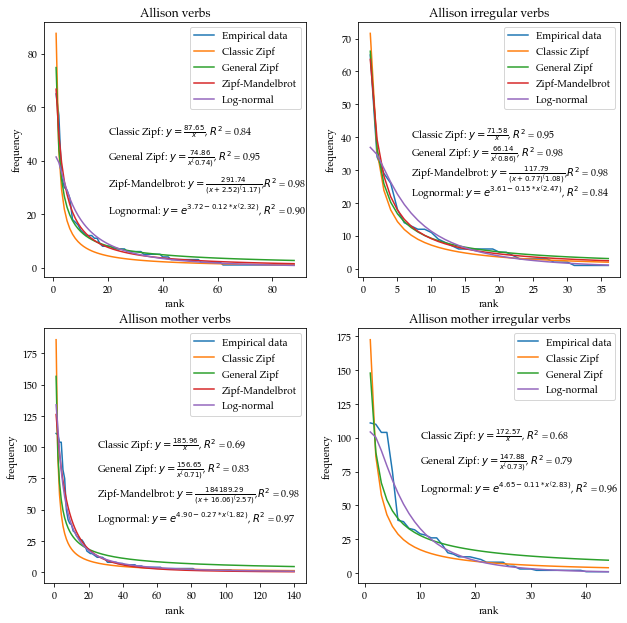

In [304]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(Allisonx,Allisony,label ='Empirical data', color = '#1f77b4')
plt.plot(Allisonx,Allisonyangy, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Allisonx,Allisonply,label='General Zipf', color = '#2ca02c')
plt.plot(Allisonx,Allisonzmy,label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(Allisonx,Allisonlogny,label = 'Log-normal', color = '#9467bd')
plt.text(20, 50, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Allisonyangpt, float(Allisonyang_r_2)))
plt.text(20, 40, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Allisonplpt[1], Allisonplpt[0],float(Allisonpl_r_2)))
plt.text(20, 30, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Allisonzmpt[2],Allisonzmpt[1],Allisonzmpt[0],float(Allisonzm_r_2)))
plt.text(20, 20, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Allisonlnfrpt[0], Allisonlnfrpt[1], Allisonlnfrpt[2], float(Allisonlogn_r_2)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Allison verbs')

plt.subplot(2,2,2)
plt.plot(Allisona,Allisonb,label ='Empirical data')
plt.plot(Allisona,Allisonyangy_ir, label = 'Classic Zipf')
plt.plot(Allisona,Allisonply_ir,label='General Zipf')
plt.plot(Allisona,Allisonzmy_ir,label='Zipf-Mandelbrot')
plt.plot(Allisona,Allisonlogny_ir,label = 'Log-normal')
plt.text(7, 40, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Allisonyangpt_ir, float(Allisonyang_r_2_ir)))
plt.text(7, 34, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Allisonplpt_ir[1], Allisonplpt_ir[0],float(Allisonpl_r_2_ir)))
plt.text(7, 28, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Allisonzmpt_ir[2],Allisonzmpt_ir[1],Allisonzmpt_ir[0],float(Allisonzm_r_2_ir)))
plt.text(7, 22, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^(%5.2f)}$, $R^2$ = %0.2f' % (Allisonlnfrpt_ir[0], Allisonlnfrpt_ir[1], Allisonlnfrpt_ir[2], float(Allisonlogn_r_2_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Allison irregular verbs')



plt.subplot(2,2,3)
plt.plot(Allisoni,Allisonj,label ='Empirical data')
plt.plot(Allisoni,Allisonyangy_mot, label = 'Classic Zipf')
plt.plot(Allisoni,Allisonply_mot,label='General Zipf')
plt.plot(Allisoni,Allisonzmy_mot,label='Zipf-Mandelbrot')
plt.plot(Allisoni,Allisonlogny_mot,label = 'Log-normal')
plt.text(25, 100, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Allisonyangpt_mot, float(Allisonyang_r_2_mot)))
plt.text(25, 80, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Allisonplpt_mot[1], Allisonplpt_mot[0],float(Allisonpl_r_2_mot)))
plt.text(25, 60, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Allisonzmpt_mot[2],Allisonzmpt_mot[1],Allisonzmpt_mot[0],float(Allisonzm_r_2_mot)))
plt.text(25, 40, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Allisonlnfrpt_mot[0], Allisonlnfrpt_mot[1], Allisonlnfrpt_mot[2], float(Allisonlogn_r_2_mot)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Allison mother verbs')


plt.subplot(2,2,4)
plt.plot(Allisonm,Allisonn,label ='Empirical data', color = '#1f77b4')
plt.plot(Allisonm,Allisonyangy_mot_ir, label = 'Classic Zipf', color = '#ff7f0e' )
plt.plot(Allisonm,Allisonply_mot_ir,label='General Zipf', color = '#2ca02c')
#plt.plot(Allisonm,Allisonzmy_mot_ir, label='Zipf-Mandelbrot')
plt.plot(Allisonm,Allisonlogny_mot_ir,label = 'Log-normal', color = '#9467bd')
plt.text(10, 100, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Allisonyangpt_mot_ir, float(Allisonyang_r_2_mot_ir)))
plt.text(10, 80, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Allisonplpt_mot_ir[1], Allisonplpt_mot_ir[0],float(Allisonpl_r_2_mot_ir)))
#plt.text(15, 60, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Allisonzmpt_mot_ir[2],Allisonzmpt_mot_ir[1],Allisonzmpt_mot_ir[0],float(Allisonzm_r_2_mot_ir)))
plt.text(10, 60, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Allisonlnfrpt_mot_ir[0], Allisonlnfrpt_mot_ir[1], Allisonlnfrpt_mot_ir[2], float(Allisonlogn_r_2_mot_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Allison mother irregular verbs')
figname = 'Allison_curve'
plt.savefig(figname+'.png', dpi =300)


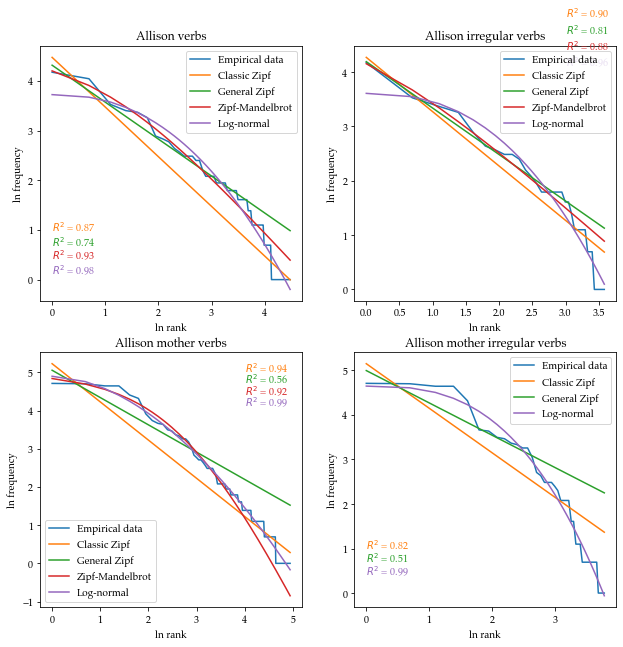

In [305]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(ln(Allisonx),ln(Allisony),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Allisonx),ln(Allisonyangy), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Allisonx),ln(Allisonply),label='General Zipf', color = '#2ca02c')
plt.plot(ln(Allisonx),ln(Allisonzmy),label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(ln(Allisonx),ln(Allisonlogny),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Allisonyang_ln_r2), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Allisonpl_ln_r2), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Allisonzm_ln_r2), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Allisonlogn_ln_r2), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Allison verbs')

plt.subplot(2,2,2)
plt.plot(ln(Allisona),ln(Allisonb),label ='Empirical data')
plt.plot(ln(Allisona),ln(Allisonyangy_ir), label = 'Classic Zipf')
plt.plot(ln(Allisona),ln(Allisonply_ir),label='General Zipf')
plt.plot(ln(Allisona),ln(Allisonzmy_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Allisona),ln(Allisonlogny_ir),label = 'Log-normal')
plt.text(3, 5, '$R^2$ = %0.2f' % float(Allisonyang_ln_r2_ir), color = '#ff7f0e')
plt.text(3, 4.7, '$R^2$ = %0.2f' % float(Allisonpl_ln_r2_ir), color = '#2ca02c')
plt.text(3, 4.4, '$R^2$ = %0.2f' % float(Allisonzm_ln_r2_ir), color = '#d62728')
plt.text(3, 4.1, '$R^2$ = %0.2f' % float(Allisonlogn_ln_r2_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Allison irregular verbs')

plt.subplot(2,2,3)
plt.plot(ln(Allisoni), ln(Allisonj),label ='Empirical data')
plt.plot(ln(Allisoni), ln(Allisonyangy_mot),label = 'Classic Zipf')
plt.plot(ln(Allisoni), ln(Allisonply_mot),label='General Zipf')
plt.plot(ln(Allisoni), ln(Allisonzmy_mot),label='Zipf-Mandelbrot')
plt.plot(ln(Allisoni), ln(Allisonlogny_mot),label = 'Log-normal')
plt.text(4, 5, '$R^2$ = %0.2f' % float(Allisonyang_ln_r2_mot), color = '#ff7f0e' )
plt.text(4, 4.7, '$R^2$ = %0.2f' % float(Allisonpl_ln_r2_mot), color = '#2ca02c')
plt.text(4, 4.4, '$R^2$ = %0.2f' % float(Allisonzm_ln_r2_mot), color = '#d62728')
plt.text(4, 4.1, '$R^2$ = %0.2f' % float(Allisonlogn_ln_r2_mot), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Allison mother verbs')

plt.subplot(2,2,4)
plt.plot(ln(Allisonm),ln(Allisonn),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Allisonm),ln(Allisonyangy_mot_ir),label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Allisonm),ln(Allisonply_mot_ir),label='General Zipf', color = '#2ca02c')
#plt.plot(ln(Allisonm),ln(Allisonzmy_mot_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Allisonm),ln(Allisonlogny_mot_ir),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Allisonyang_ln_r2_mot_ir), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Allisonpl_ln_r2_mot_ir), color = '#2ca02c')
#plt.text(3.5, 6.4, '$R^2$ = %0.2f' % float(Allisonzm_ln_r2_mot_ir), color = '#d62728')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Allisonlogn_ln_r2_mot_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Allison mother irregular verbs')

figname = 'Allison_ln'
plt.savefig(figname+'.png', dpi =300)

In [320]:
Aprily, Aprilx = XY('April').verb()
Aprilb, Aprila = XY('April').v_ir()
Aprilj, Aprili = XY('April').v_mot()
Apriln, Aprilm = XY('April').v_mot_ir()

Aprilply_ir, Aprilplpt_ir, Aprilpl_r_2_ir, Aprilpl_r_adj_ir, Aprilpl_ln_r2_ir = Parameter(Aprila,Aprilb).plaw()
#Aprilzmy_ir, Aprilzmpt_ir, Aprilzm_r_2_ir, Aprilzm_r_adj_ir, Aprilzm_ln_r2_ir = Parameter(Aprila,Aprilb).zipfm()
Aprilyangy_ir, Aprilyangpt_ir, Aprilyang_r_2_ir, Aprilyang_r_adj_ir, Aprilyang_ln_r2_ir  = Parameter(Aprila,Aprilb).yangzipf()
Aprillogny_ir, Aprillnfrpt_ir, Aprillogn_r_2_ir, Aprillogn_r_adj_ir, Aprillogn_ln_r2_ir  = Parameter(Aprila,Aprilb).lognorm() 

Aprilply, Aprilplpt, Aprilpl_r_2, Aprilpl_r_adj, Aprilpl_ln_r2= Parameter(Aprilx,Aprily).plaw()
Aprilzmy, Aprilzmpt, Aprilzm_r_2, Aprilzm_r_adj, Aprilzm_ln_r2 = Parameter(Aprilx,Aprily).zipfm()
Aprilyangy, Aprilyangpt, Aprilyang_r_2, Aprilyang_r_adj, Aprilyang_ln_r2  = Parameter(Aprilx,Aprily).yangzipf()
Aprillogny, Aprillnfrpt, Aprillogn_r_2, Aprillogn_r_adj, Aprillogn_ln_r2  = Parameter(Aprilx,Aprily).lognorm()  

Aprilply_mot, Aprilplpt_mot, Aprilpl_r_2_mot, Aprilpl_r_adj_mot, Aprilpl_ln_r2_mot = Parameter(Aprili,Aprilj).plaw()
Aprilzmy_mot, Aprilzmpt_mot, Aprilzm_r_2_mot, Aprilzm_r_adj_mot, Aprilzm_ln_r2_mot = Parameter(Aprili,Aprilj).zipfm()
Aprilyangy_mot, Aprilyangpt_mot, Aprilyang_r_2_mot, Aprilyang_r_adj_mot, Aprilyang_ln_r2_mot  = Parameter(Aprili,Aprilj).yangzipf()
Aprillogny_mot, Aprillnfrpt_mot, Aprillogn_r_2_mot, Aprillogn_r_adj_mot, Aprillogn_ln_r2_mot  = Parameter(Aprili,Aprilj).lognorm() 

Aprilply_mot_ir, Aprilplpt_mot_ir, Aprilpl_r_2_mot_ir, Aprilpl_r_adj_mot_ir, Aprilpl_ln_r2_mot_ir = Parameter(Aprilm,Apriln).plaw()
#Aprilzmy_mot_ir, Aprilzmpt_mot_ir, Aprilzm_r_2_mot_ir, Aprilzm_r_adj_mot_ir, Aprilzm_ln_r2_mot_ir = Parameter(Aprilm,Apriln).zipfm()
Aprilyangy_mot_ir, Aprilyangpt_mot_ir, Aprilyang_r_2_mot_ir, Aprilyang_r_adj_mot_ir, Aprilyang_ln_r2_mot_ir  = Parameter(Aprilm,Apriln).yangzipf()
Aprillogny_mot_ir, Aprillnfrpt_mot_ir, Aprillogn_r_2_mot_ir, Aprillogn_r_adj_mot_ir, Aprillogn_ln_r2_mot_ir  = Parameter(Aprilm,Apriln).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [308]:
afit1 = powerlaw.Fit(Aprily, discrete = True)
R1, p1= afit1.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R1, p1)
print('April verb power law is a better fit is', R1>0)
print('and it is significant', p1<0.05)
afit2 = powerlaw.Fit(Aprilb, discrete = True)
R2, p2= afit2.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R2, p2)
print('April irregular verb: power law is a better fit is', R2>0)
print('and it is significant', p2<0.05)
afit3 = powerlaw.Fit(Aprilj, discrete = True)
R3, p3= afit3.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R3, p3)
print('April mother irregular verb: power law is a better fit is', R3>0)
print('and it is significant', p3<0.05)
afit4 = powerlaw.Fit(Apriln, discrete = True)
R4, p4= afit4.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R4, p4)
print('April mother irregular verb: power law is a better fit is', R4>0)
print('and it is significant', p4<0.05)

-0.6850374258519287 0.4933203044868022
April verb power law is a better fit is False
and it is significant False
-0.2106035376335592 0.833196651595046
April irregular verb: power law is a better fit is False
and it is significant False
-3.306638113797123 0.0009442278976308508
April mother irregular verb: power law is a better fit is False
and it is significant True
-0.5533687595472103 0.5800109263998081
April mother irregular verb: power law is a better fit is False
and it is significant False


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


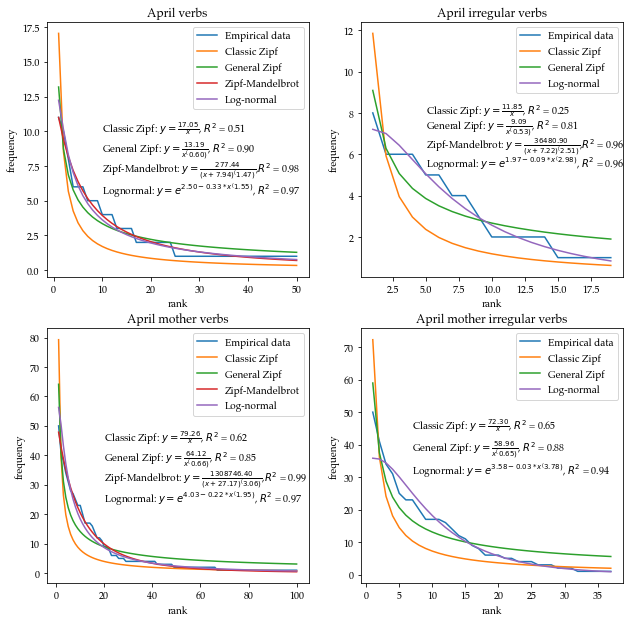

In [314]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(Aprilx,Aprily,label ='Empirical data', color = '#1f77b4')
plt.plot(Aprilx,Aprilyangy, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Aprilx,Aprilply,label='General Zipf', color = '#2ca02c')
plt.plot(Aprilx,Aprilzmy,label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(Aprilx,Aprillogny,label = 'Log-normal', color = '#9467bd')
plt.text(10, 10, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Aprilyangpt, float(Aprilyang_r_2)))
plt.text(10, 8.5, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Aprilplpt[1], Aprilplpt[0],float(Aprilpl_r_2)))
plt.text(10, 7, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Aprilzmpt[2],Aprilzmpt[1],Aprilzmpt[0],float(Aprilzm_r_2)))
plt.text(10, 5.5, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Aprillnfrpt[0], Aprillnfrpt[1], Aprillnfrpt[2], float(Aprillogn_r_2)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('April verbs')

plt.subplot(2,2,2)
plt.plot(Aprila,Aprilb,label ='Empirical data', color = '#1f77b4')
plt.plot(Aprila,Aprilyangy_ir, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Aprila,Aprilply_ir,label='General Zipf', color = '#2ca02c')
#plt.plot(Aprila,Aprilzmy_ir,label='Zipf-Mandelbrot')
plt.plot(Aprila,Aprillogny_ir,label = 'Log-normal', color = '#9467bd')
plt.text(5, 8, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Aprilyangpt_ir, float(Aprilyang_r_2_ir)))
plt.text(5, 7.2, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Aprilplpt_ir[1], Aprilplpt_ir[0],float(Aprilpl_r_2_ir)))
plt.text(5, 6.3, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Aprilzmpt_ir[2],Aprilzmpt_ir[1],Aprilzmpt_ir[0],float(Aprilzm_r_2_ir)))
plt.text(5, 5.4, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^(%5.2f)}$, $R^2$ = %0.2f' % (Aprillnfrpt_ir[0], Aprillnfrpt_ir[1], Aprillnfrpt_ir[2], float(Aprillogn_r_2_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('April irregular verbs')



plt.subplot(2,2,3)
plt.plot(Aprili,Aprilj,label ='Empirical data')
plt.plot(Aprili,Aprilyangy_mot, label = 'Classic Zipf')
plt.plot(Aprili,Aprilply_mot,label='General Zipf')
plt.plot(Aprili,Aprilzmy_mot,label='Zipf-Mandelbrot')
plt.plot(Aprili,Aprillogny_mot,label = 'Log-normal')
plt.text(20, 45, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Aprilyangpt_mot, float(Aprilyang_r_2_mot)))
plt.text(20, 38, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Aprilplpt_mot[1], Aprilplpt_mot[0],float(Aprilpl_r_2_mot)))
plt.text(20, 31, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Aprilzmpt_mot[2],Aprilzmpt_mot[1],Aprilzmpt_mot[0],float(Aprilzm_r_2_mot)))
plt.text(20, 24, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Aprillnfrpt_mot[0], Aprillnfrpt_mot[1], Aprillnfrpt_mot[2], float(Aprillogn_r_2_mot)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('April mother verbs')


plt.subplot(2,2,4)
plt.plot(Aprilm,Apriln,label ='Empirical data', color = '#1f77b4')
plt.plot(Aprilm,Aprilyangy_mot_ir, label = 'Classic Zipf', color = '#ff7f0e' )
plt.plot(Aprilm,Aprilply_mot_ir,label='General Zipf', color = '#2ca02c')
#plt.plot(Aprilm,Aprilzmy_mot_ir, label='Zipf-Mandelbrot')
plt.plot(Aprilm,Aprillogny_mot_ir,label = 'Log-normal', color = '#9467bd')
plt.text(7, 45, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Aprilyangpt_mot_ir, float(Aprilyang_r_2_mot_ir)))
plt.text(7, 38, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Aprilplpt_mot_ir[1], Aprilplpt_mot_ir[0],float(Aprilpl_r_2_mot_ir)))
plt.text(7, 31, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Aprillnfrpt_mot_ir[0], Aprillnfrpt_mot_ir[1], Aprillnfrpt_mot_ir[2], float(Aprillogn_r_2_mot_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('April mother irregular verbs')
figname = 'April_curve'
plt.savefig(figname+'.png', dpi =300)


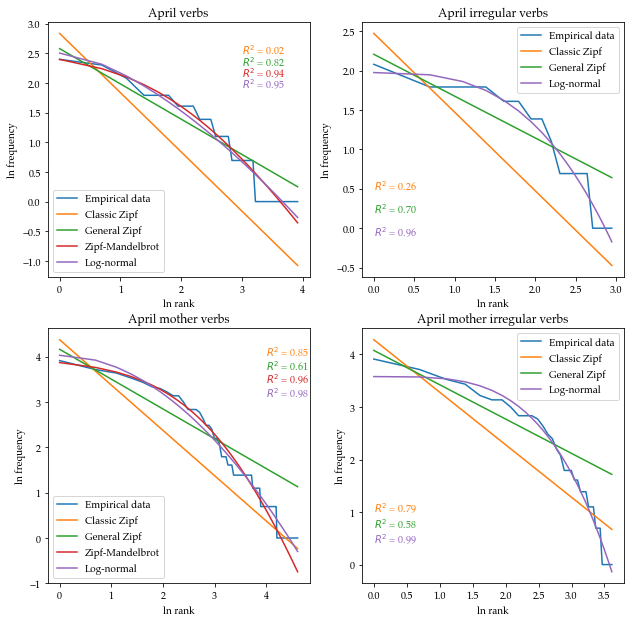

In [316]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(ln(Aprilx),ln(Aprily),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Aprilx),ln(Aprilyangy), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Aprilx),ln(Aprilply),label='General Zipf', color = '#2ca02c')
plt.plot(ln(Aprilx),ln(Aprilzmy),label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(ln(Aprilx),ln(Aprillogny),label = 'Log-normal', color = '#9467bd')
plt.text(3, 2.5, '$R^2$ = %0.2f' % float(Aprilyang_ln_r2), color = '#ff7f0e' )
plt.text(3, 2.3, '$R^2$ = %0.2f' % float(Aprilpl_ln_r2), color = '#2ca02c')
plt.text(3, 2.1, '$R^2$ = %0.2f' % float(Aprilzm_ln_r2), color = '#d62728')
plt.text(3, 1.9, '$R^2$ = %0.2f' % float(Aprillogn_ln_r2), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('April verbs')

plt.subplot(2,2,2)
plt.plot(ln(Aprila),ln(Aprilb),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Aprila),ln(Aprilyangy_ir), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Aprila),ln(Aprilply_ir),label='General Zipf', color = '#2ca02c')
#plt.plot(ln(Aprila),ln(Aprilzmy_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Aprila),ln(Aprillogny_ir),label = 'Log-normal', color = '#9467bd')
plt.text(0, 0.5, '$R^2$ = %0.2f' % float(Aprilyang_ln_r2_ir), color = '#ff7f0e')
plt.text(0, 0.2, '$R^2$ = %0.2f' % float(Aprilpl_ln_r2_ir), color = '#2ca02c')
#plt.text(3, 4.4, '$R^2$ = %0.2f' % float(Aprilzm_ln_r2_ir), color = '#d62728')
plt.text(0, -0.1, '$R^2$ = %0.2f' % float(Aprillogn_ln_r2_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('April irregular verbs')

plt.subplot(2,2,3)
plt.plot(ln(Aprili), ln(Aprilj),label ='Empirical data')
plt.plot(ln(Aprili), ln(Aprilyangy_mot),label = 'Classic Zipf')
plt.plot(ln(Aprili), ln(Aprilply_mot),label='General Zipf')
plt.plot(ln(Aprili), ln(Aprilzmy_mot),label='Zipf-Mandelbrot')
plt.plot(ln(Aprili), ln(Aprillogny_mot),label = 'Log-normal')
plt.text(4, 4, '$R^2$ = %0.2f' % float(Aprilyang_ln_r2_mot), color = '#ff7f0e' )
plt.text(4, 3.7, '$R^2$ = %0.2f' % float(Aprilpl_ln_r2_mot), color = '#2ca02c')
plt.text(4, 3.4, '$R^2$ = %0.2f' % float(Aprilzm_ln_r2_mot), color = '#d62728')
plt.text(4, 3.1, '$R^2$ = %0.2f' % float(Aprillogn_ln_r2_mot), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('April mother verbs')

plt.subplot(2,2,4)
plt.plot(ln(Aprilm),ln(Apriln),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Aprilm),ln(Aprilyangy_mot_ir),label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Aprilm),ln(Aprilply_mot_ir),label='General Zipf', color = '#2ca02c')
#plt.plot(ln(Aprilm),ln(Aprilzmy_mot_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Aprilm),ln(Aprillogny_mot_ir),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Aprilyang_ln_r2_mot_ir), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Aprilpl_ln_r2_mot_ir), color = '#2ca02c')
#plt.text(3.5, 6.4, '$R^2$ = %0.2f' % float(Aprilzm_ln_r2_mot_ir), color = '#d62728')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Aprillogn_ln_r2_mot_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('April mother irregular verbs')

figname = 'April_ln'
plt.savefig(figname+'.png', dpi =300)

In [318]:
Evey, Evex = XY('Eve').verb()
Eveb, Evea = XY('Eve').v_ir()
Evej, Evei = XY('Eve').v_mot()
Even, Evem = XY('Eve').v_mot_ir()

Eveply_ir, Eveplpt_ir, Evepl_r_2_ir, Evepl_r_adj_ir, Evepl_ln_r2_ir = Parameter(Evea,Eveb).plaw()
#Evezmy_ir, Evezmpt_ir, Evezm_r_2_ir, Evezm_r_adj_ir, Evezm_ln_r2_ir = Parameter(Evea,Eveb).zipfm()
Eveyangy_ir, Eveyangpt_ir, Eveyang_r_2_ir, Eveyang_r_adj_ir, Eveyang_ln_r2_ir  = Parameter(Evea,Eveb).yangzipf()
Evelogny_ir, Evelnfrpt_ir, Evelogn_r_2_ir, Evelogn_r_adj_ir, Evelogn_ln_r2_ir  = Parameter(Evea,Eveb).lognorm() 

Eveply, Eveplpt, Evepl_r_2, Evepl_r_adj, Evepl_ln_r2= Parameter(Evex,Evey).plaw()
Evezmy, Evezmpt, Evezm_r_2, Evezm_r_adj, Evezm_ln_r2 = Parameter(Evex,Evey).zipfm()
Eveyangy, Eveyangpt, Eveyang_r_2, Eveyang_r_adj, Eveyang_ln_r2  = Parameter(Evex,Evey).yangzipf()
Evelogny, Evelnfrpt, Evelogn_r_2, Evelogn_r_adj, Evelogn_ln_r2  = Parameter(Evex,Evey).lognorm()  

Eveply_mot, Eveplpt_mot, Evepl_r_2_mot, Evepl_r_adj_mot, Evepl_ln_r2_mot = Parameter(Evei,Evej).plaw()
Evezmy_mot, Evezmpt_mot, Evezm_r_2_mot, Evezm_r_adj_mot, Evezm_ln_r2_mot = Parameter(Evei,Evej).zipfm()
Eveyangy_mot, Eveyangpt_mot, Eveyang_r_2_mot, Eveyang_r_adj_mot, Eveyang_ln_r2_mot  = Parameter(Evei,Evej).yangzipf()
Evelogny_mot, Evelnfrpt_mot, Evelogn_r_2_mot, Evelogn_r_adj_mot, Evelogn_ln_r2_mot  = Parameter(Evei,Evej).lognorm() 

Eveply_mot_ir, Eveplpt_mot_ir, Evepl_r_2_mot_ir, Evepl_r_adj_mot_ir, Evepl_ln_r2_mot_ir = Parameter(Evem,Even).plaw()
Evezmy_mot_ir, Evezmpt_mot_ir, Evezm_r_2_mot_ir, Evezm_r_adj_mot_ir, Evezm_ln_r2_mot_ir = Parameter(Evem,Even).zipfm()
Eveyangy_mot_ir, Eveyangpt_mot_ir, Eveyang_r_2_mot_ir, Eveyang_r_adj_mot_ir, Eveyang_ln_r2_mot_ir  = Parameter(Evem,Even).yangzipf()
Evelogny_mot_ir, Evelnfrpt_mot_ir, Evelogn_r_2_mot_ir, Evelogn_r_adj_mot_ir, Evelogn_ln_r2_mot_ir  = Parameter(Evem,Even).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [321]:
afit1 = powerlaw.Fit(Evey, discrete = True)
R1, p1= afit1.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R1, p1)
print('Eve verb power law is a better fit is', R1>0)
print('and it is significant', p1<0.05)
afit2 = powerlaw.Fit(Eveb, discrete = True)
R2, p2= afit2.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R2, p2)
print('Eve irregular verb: power law is a better fit is', R2>0)
print('and it is significant', p2<0.05)
afit3 = powerlaw.Fit(Evej, discrete = True)
R3, p3= afit3.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R3, p3)
print('Eve mother irregular verb: power law is a better fit is', R3>0)
print('and it is significant', p3<0.05)
afit4 = powerlaw.Fit(Even, discrete = True)
R4, p4= afit4.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R4, p4)
print('Eve mother irregular verb: power law is a better fit is', R4>0)
print('and it is significant', p4<0.05)

-3.113929876833169 0.0018461336036979903
Eve verb power law is a better fit is False
and it is significant True
-2.2152879231423723 0.026740308252900108
Eve irregular verb: power law is a better fit is False
and it is significant True
-3.638844068794876 0.0002738645530444191
Eve mother irregular verb: power law is a better fit is False
and it is significant True
-0.21408025667473 0.8304844717821307
Eve mother irregular verb: power law is a better fit is False
and it is significant False


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


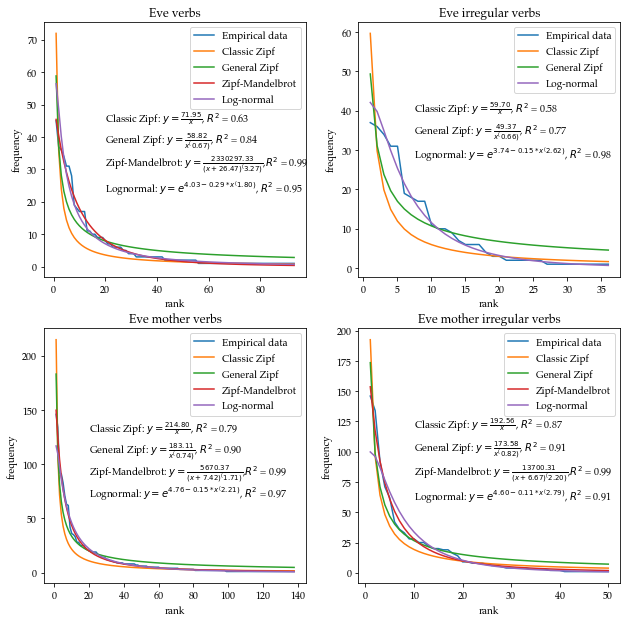

In [327]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(Evex,Evey,label ='Empirical data', color = '#1f77b4')
plt.plot(Evex,Eveyangy, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Evex,Eveply,label='General Zipf', color = '#2ca02c')
plt.plot(Evex,Evezmy,label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(Evex,Evelogny,label = 'Log-normal', color = '#9467bd')
plt.text(20, 45, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Eveyangpt, float(Eveyang_r_2)))
plt.text(20, 38, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Eveplpt[1], Eveplpt[0],float(Evepl_r_2)))
plt.text(20, 31, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Evezmpt[2],Evezmpt[1],Evezmpt[0],float(Evezm_r_2)))
plt.text(20, 23, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Evelnfrpt[0], Evelnfrpt[1], Evelnfrpt[2], float(Evelogn_r_2)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Eve verbs')

plt.subplot(2,2,2)
plt.plot(Evea,Eveb,label ='Empirical data', color = '#1f77b4')
plt.plot(Evea,Eveyangy_ir, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(Evea,Eveply_ir,label='General Zipf', color = '#2ca02c')
#plt.plot(Evea,Evezmy_ir,label='Zipf-Mandelbrot')
plt.plot(Evea,Evelogny_ir,label = 'Log-normal', color = '#9467bd')
plt.text(7.5, 40, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Eveyangpt_ir, float(Eveyang_r_2_ir)))
plt.text(7.5, 34, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Eveplpt_ir[1], Eveplpt_ir[0],float(Evepl_r_2_ir)))
#plt.text(15, 6.3, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Evezmpt_ir[2],Evezmpt_ir[1],Evezmpt_ir[0],float(Evezm_r_2_ir)))
plt.text(7.5, 28, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^(%5.2f)}$, $R^2$ = %0.2f' % (Evelnfrpt_ir[0], Evelnfrpt_ir[1], Evelnfrpt_ir[2], float(Evelogn_r_2_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Eve irregular verbs')



plt.subplot(2,2,3)
plt.plot(Evei,Evej,label ='Empirical data')
plt.plot(Evei,Eveyangy_mot, label = 'Classic Zipf')
plt.plot(Evei,Eveply_mot,label='General Zipf')
plt.plot(Evei,Evezmy_mot,label='Zipf-Mandelbrot')
plt.plot(Evei,Evelogny_mot,label = 'Log-normal')
plt.text(20, 130, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Eveyangpt_mot, float(Eveyang_r_2_mot)))
plt.text(20, 110, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Eveplpt_mot[1], Eveplpt_mot[0],float(Evepl_r_2_mot)))
plt.text(20, 90, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Evezmpt_mot[2],Evezmpt_mot[1],Evezmpt_mot[0],float(Evezm_r_2_mot)))
plt.text(20, 70, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Evelnfrpt_mot[0], Evelnfrpt_mot[1], Evelnfrpt_mot[2], float(Evelogn_r_2_mot)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Eve mother verbs')


plt.subplot(2,2,4)
plt.plot(Evem,Even,label ='Empirical data')
plt.plot(Evem,Eveyangy_mot_ir, label = 'Classic Zipf')
plt.plot(Evem,Eveply_mot_ir,label='General Zipf')
plt.plot(Evem,Evezmy_mot_ir, label='Zipf-Mandelbrot')
plt.plot(Evem,Evelogny_mot_ir,label = 'Log-normal')
plt.text(10, 120, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (Eveyangpt_mot_ir, float(Eveyang_r_2_mot_ir)))
plt.text(10, 100, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (Eveplpt_mot_ir[1], Eveplpt_mot_ir[0],float(Evepl_r_2_mot_ir)))
plt.text(10, 80, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (Evezmpt_mot_ir[2],Evezmpt_mot_ir[1],Evezmpt_mot_ir[0],float(Evezm_r_2_mot_ir)))
plt.text(10, 60, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (Evelnfrpt_mot_ir[0], Evelnfrpt_mot_ir[1], Evelnfrpt_mot_ir[2], float(Evelogn_r_2_mot_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Eve mother irregular verbs')
figname = 'Eve_curve'
plt.savefig(figname+'.png', dpi =300)


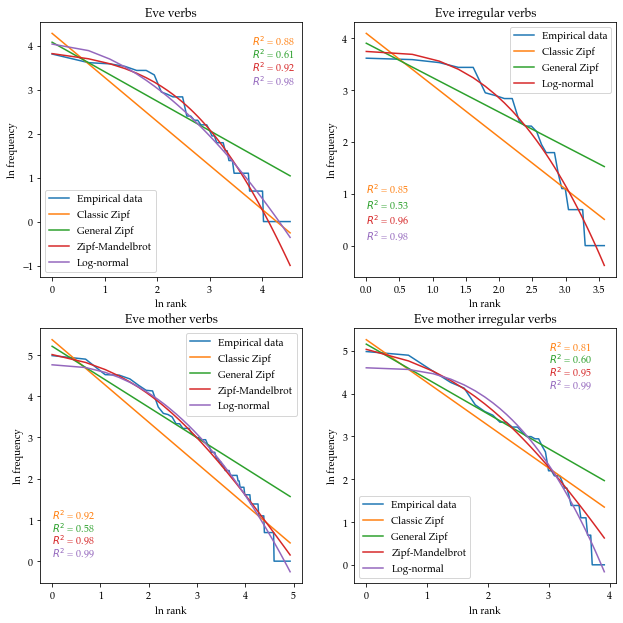

In [329]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(ln(Evex),ln(Evey),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Evex),ln(Eveyangy), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Evex),ln(Eveply),label='General Zipf', color = '#2ca02c')
plt.plot(ln(Evex),ln(Evezmy),label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(ln(Evex),ln(Evelogny),label = 'Log-normal', color = '#9467bd')
plt.text(3.8, 4, '$R^2$ = %0.2f' % float(Eveyang_ln_r2), color = '#ff7f0e' )
plt.text(3.8, 3.7, '$R^2$ = %0.2f' % float(Evepl_ln_r2), color = '#2ca02c')
plt.text(3.8, 3.4, '$R^2$ = %0.2f' % float(Evezm_ln_r2), color = '#d62728')
plt.text(3.8, 3.1, '$R^2$ = %0.2f' % float(Evelogn_ln_r2), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Eve verbs')

plt.subplot(2,2,2)
plt.plot(ln(Evea),ln(Eveb),label ='Empirical data')
plt.plot(ln(Evea),ln(Eveyangy_ir), label = 'Classic Zipf')
plt.plot(ln(Evea),ln(Eveply_ir),label='General Zipf')
#plt.plot(ln(Evea),ln(Evezmy_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Evea),ln(Evelogny_ir),label = 'Log-normal')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Eveyang_ln_r2_ir), color = '#ff7f0e')
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Evepl_ln_r2_ir), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Evezm_ln_r2_ir), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Evelogn_ln_r2_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Eve irregular verbs')

plt.subplot(2,2,3)
plt.plot(ln(Evei), ln(Evej),label ='Empirical data')
plt.plot(ln(Evei), ln(Eveyangy_mot),label = 'Classic Zipf')
plt.plot(ln(Evei), ln(Eveply_mot),label='General Zipf')
plt.plot(ln(Evei), ln(Evezmy_mot),label='Zipf-Mandelbrot')
plt.plot(ln(Evei), ln(Evelogny_mot),label = 'Log-normal')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Eveyang_ln_r2_mot), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Evepl_ln_r2_mot), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Evezm_ln_r2_mot), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Evelogn_ln_r2_mot), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Eve mother verbs')

plt.subplot(2,2,4)
plt.plot(ln(Evem),ln(Even),label ='Empirical data')
plt.plot(ln(Evem),ln(Eveyangy_mot_ir),label = 'Classic Zipf')
plt.plot(ln(Evem),ln(Eveply_mot_ir),label='General Zipf')
plt.plot(ln(Evem),ln(Evezmy_mot_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Evem),ln(Evelogny_mot_ir),label = 'Log-normal')
plt.text(3, 5, '$R^2$ = %0.2f' % float(Eveyang_ln_r2_mot_ir), color = '#ff7f0e' )
plt.text(3, 4.7, '$R^2$ = %0.2f' % float(Evepl_ln_r2_mot_ir), color = '#2ca02c')
plt.text(3, 4.4, '$R^2$ = %0.2f' % float(Evezm_ln_r2_mot_ir), color = '#d62728')
plt.text(3, 4.1, '$R^2$ = %0.2f' % float(Evelogn_ln_r2_mot_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Eve mother irregular verbs')

figname = 'Eve_ln'
plt.savefig(figname+'.png', dpi =300)

In [30]:
y, x = XY('Sarah').verb()

In [56]:
b,a = XY('Sarah').v_ir()

In [61]:
j,i = XY('Sarah').v_mot()
n,m = XY('Sarah').v_mot_ir()

In [58]:
ply_ir

array([203.28593748, 113.00612022,  80.15551053,  62.81980626,
        51.99998269,  44.55823837,  39.10360077,  34.92136577,
        31.60526473,  28.90665418,  26.66451506,  24.76980801,
        23.145967  ,  21.73758925,  20.50355874,  19.41269577,
        18.44091025,  17.56928388,  16.78274518,  16.06913335,
        15.41852389,  14.82273408,  14.27495464,  13.7694714 ,
        13.30145229,  12.86678243,  12.46193495,  12.08386893,
        11.72994796,  11.3978746 ,  11.08563725,  10.79146673,
        10.51380063,  10.25125371,  10.00259333,   9.7667189 ,
         9.54264445,   9.32948409,   9.12643946,   8.93278914,
         8.74787955,   8.57111705,   8.40196124,   8.23991906,
         8.08453963,   7.9354099 ,   7.79215064,   7.65441309])

In [55]:
ply

array([214.00389   , 124.01268472,  90.12722381,  71.86386178,
        60.28758676,  52.22764404,  46.2597536 ,  41.64424504,
        37.95686364,  34.93593266,  32.41082736,  30.26529263,
        28.41724089,  26.80697177,  25.38997223,  24.13233998,
        23.00777537,  21.99554673,  21.07907906,  20.2449535 ,
        19.48218402,  18.7816853 ,  18.13587524,  17.53837368,
        16.98377127,  16.46744989,  15.98544187,  15.53431827,
        15.11109965,  14.71318405,  14.33828854,  13.98440126,
        13.64974203,  13.33272958,  13.03195427,  12.74615523,
        12.474201  ,  12.21507322,  11.96785269,  11.73170747,
        11.5058827 ,  11.28969172,  11.08250852,  10.88376112,
        10.69292577,  10.50952194,  10.33310794,  10.16327697,
         9.99965376,   9.84189153,   9.68966929,   9.54268949,
         9.40067588,   9.26337163,   9.13053761,   9.00195092,
         8.87740347,   8.75670081,   8.63966097,   8.5261135 ,
         8.41589855,   8.30886605,   8.20487496,   8.10

In [136]:
ply_ir, plpt_ir, pl_r_2_ir, pl_r_adj_ir, pl_ln_r2_ir = Parameter(a,b).plaw()
zmy_ir, zmpt_ir, zm_r_2_ir, zm_r_adj_ir, zm_ln_r2_ir = Parameter(a,b).zipfm()
yangy_ir, yangpt_ir, yang_r_2_ir, yang_r_adj_ir, yang_ln_r2_ir  = Parameter(a,b).yangzipf()
logny_ir, lnfrpt_ir, logn_r_2_ir, logn_r_adj_ir, logn_ln_r2_ir  = Parameter(a,b).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [126]:
ply, plpt, pl_r_2, pl_r_adj, pl_ln_r2= Parameter(x,y).plaw()
zmy, zmpt, zm_r_2, zm_r_adj, zm_ln_r2 = Parameter(x,y).zipfm()
yangy, yangpt, yang_r_2, yang_r_adj, yang_ln_r2  = Parameter(x,y).yangzipf()
logny, lnfrpt, logn_r_2, logn_r_adj, logn_ln_r2  = Parameter(x,y).lognorm()       

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [139]:
ply_mot, plpt_mot, pl_r_2_mot, pl_r_adj_mot, pl_ln_r2_mot = Parameter(i,j).plaw()
zmy_mot, zmpt_mot, zm_r_2_mot, zm_r_adj_mot, zm_ln_r2_mot = Parameter(i,j).zipfm()
yangy_mot, yangpt_mot, yang_r_2_mot, yang_r_adj_mot, yang_ln_r2_mot  = Parameter(i,j).yangzipf()
logny_mot, lnfrpt_mot, logn_r_2_mot, logn_r_adj_mot, logn_ln_r2_mot  = Parameter(i,j).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [149]:
ply_mot_ir, plpt_mot_ir, pl_r_2_mot_ir, pl_r_adj_mot_ir, pl_ln_r2_mot_ir = Parameter(m,n).plaw()
zmy_mot_ir, zmpt_mot_ir, zm_r_2_mot_ir, zm_r_adj_mot_ir, zm_ln_r2_mot_ir = Parameter(m,n).zipfm()
yangy_mot_ir, yangpt_mot_ir, yang_r_2_mot_ir, yang_r_adj_mot_ir, yang_ln_r2_mot_ir  = Parameter(m,n).yangzipf()
logny_mot_ir, lnfrpt_mot_ir, logn_r_2_mot_ir, logn_r_adj_mot_ir, logn_ln_r2_mot_ir  = Parameter(m,n).lognorm() 

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [330]:
afit1 = powerlaw.Fit(y, discrete = True)
R1, p1= afit1.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R1, p1)
print('Sarah verb power law is a better fit is', R1>0)
print('and it is significant', p1<0.05)
afit2 = powerlaw.Fit(b, discrete = True)
R2, p2= afit2.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R2, p2)
print(' irregular verb: power law is a better fit is', R2>0)
print('and it is significant', p2<0.05)
afit3 = powerlaw.Fit(j, discrete = True)
R3, p3= afit3.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R3, p3)
print(' mother irregular verb: power law is a better fit is', R3>0)
print('and it is significant', p3<0.05)
afit4 = powerlaw.Fit(n, discrete = True)
R4, p4= afit4.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
print(R4, p4)
print(' mother irregular verb: power law is a better fit is', R4>0)
print('and it is significant', p4<0.05)

-3.205918451079694 0.0013463213723713004
Sarah verb power law is a better fit is False
and it is significant True
-0.19011597935769323 0.8492182487221996
 irregular verb: power law is a better fit is False
and it is significant False
-3.92069622309766 8.829350763585194e-05
 mother irregular verb: power law is a better fit is False
and it is significant True
-0.39929761098631483 0.6896739272193234
 mother irregular verb: power law is a better fit is False
and it is significant False


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [ ]:
def lnR2 (fitfunc, xdata, ydata, p):
    pred_y = ln(Rsquare(fitfunc, xdata, ydata, p)[0]) 
    r = sum((ln(ydata) - pred_y)**2)
    ss = sum((ln(ydata) - ln(np.mean(ydata)))**2)
    r_2 = 1 - (r/ss)
    return pred_y, r_2
   
        


In [124]:
class Parameter:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def plaw (self):
        plpt, plcov = curve_fit(pl, self.x, self.y)
        predy = pl(self.x, *plpt)
        lnpredy = ln(predy)
        reg = sum((self.y-predy)**2)
        tot = sum((self.y - np.mean(self.y))**2)
        r_2 = 1- (reg/tot)
        lnpredy = ln(predy)
        r_adj = 1-(1-r_2)*(len(self.x)-1)/(len(self.x)-2)
        lnreg = sum((ln(self.y) - lnpredy)**2)
        lntot = sum((ln(self.y) - ln(np.mean(self.y)))**2)
        lnr_2 = 1-(lnreg/lntot)
        return predy, plpt, r_2, r_adj,lnr_2
    def zipfm (self):
        zmpt, zmcov = curve_fit(zm, self.x, self.y)
        predy = zm(self.x, *zmpt)
        reg = sum((self.y-predy)**2)
        tot = sum((self.y - np.mean(self.y))**2)
        r_2 = 1- (reg/tot)
        r_adj = 1-(1-r_2)*(len(self.x)-1)/(len(self.x)-3)
        lnpredy = ln(predy)
        r_adj = 1-(1-r_2)*(len(self.x)-1)/(len(self.x)-2)
        lnreg = sum((ln(self.y) - lnpredy)**2)
        lntot = sum((ln(self.y) - ln(np.mean(self.y)))**2)
        lnr_2 = 1-(lnreg/lntot)
        return predy, zmpt, r_2, r_adj, lnr_2       
    def yangzipf (self):
        yangpt, yangcov = curve_fit(yang,self.x, self.y)
        predy = yang(self.x, *yangpt)
        reg = sum((self.y-predy)**2)
        tot = sum((self.y - np.mean(self.y))**2)
        r_2 = 1- (reg/tot)
        r_adj = 1-(1-r_2)*(len(self.x)-1)/(len(self.x)-1)
        lnpredy = ln(predy)
        r_adj = 1-(1-r_2)*(len(self.x)-1)/(len(self.x)-2)
        lnreg = sum((ln(self.y) - lnpredy)**2)
        lntot = sum((ln(self.y) - ln(np.mean(self.y)))**2)
        lnr_2 = 1-(lnreg/lntot)
        return predy, yangpt, r_2, r_adj, lnr_2   
    def lognorm (self):
        lnfrpt, lnfrcov = curve_fit(lnfr, ln(self.x), ln(self.y))
        lnpredy = lnfr(ln(self.x), *lnfrpt)
        predy = np.exp(lnpredy)
        reg = sum((self.y-predy)**2)
        tot = sum((self.y - np.mean(self.y))**2)
        r_2 = 1- (reg/tot)
        lnreg = sum((ln(self.y) - lnpredy)**2)
        lntot = sum((ln(self.y) - ln(np.mean(self.y)))**2)
        lnr_2 = 1-(lnreg/lntot)
        return predy, lnfrpt, r_2, r_adj, lnr_2

In [74]:
pl_r_2

0.8990845289609811

In [95]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Palatino']

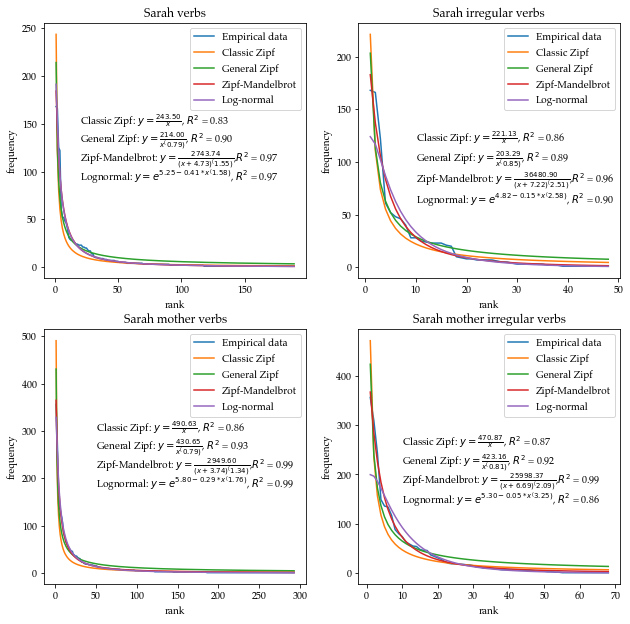

In [333]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(x,y,label ='Empirical data', color = '#1f77b4')
plt.plot(x,yangy, label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(x,ply,label='General Zipf', color = '#2ca02c')
plt.plot(x,zmy,label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(x,logny,label = 'Log-normal', color = '#9467bd')
plt.text(20, 150, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (yangpt, float(yang_r_2)))
plt.text(20, 130, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (plpt[1], plpt[0],float(pl_r_2)))
plt.text(20, 110, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (zmpt[2],zmpt[1],zmpt[0],float(zm_r_2)))
plt.text(20, 90, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (lnfrpt[0], lnfrpt[1], lnfrpt[2], float(logn_r_2)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Sarah verbs')

plt.subplot(2,2,2)
plt.plot(a,b,label ='Empirical data')
plt.plot(a,yangy_ir, label = 'Classic Zipf')
plt.plot(a,ply_ir,label='General Zipf')
plt.plot(a,zmy_ir,label='Zipf-Mandelbrot')
plt.plot(a,logny_ir,label = 'Log-normal')
plt.text(10, 120, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (yangpt_ir, float(yang_r_2_ir)))
plt.text(10, 100, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (plpt_ir[1], plpt_ir[0],float(pl_r_2_ir)))
plt.text(10, 80, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (zmpt_ir[2],zmpt_ir[1],zmpt_ir[0],float(zm_r_2_ir)))
plt.text(10, 60, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^(%5.2f)}$, $R^2$ = %0.2f' % (lnfrpt_ir[0], lnfrpt_ir[1], lnfrpt_ir[2], float(logn_r_2_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Sarah irregular verbs')



plt.subplot(2,2,3)
plt.plot(i,j,label ='Empirical data')
plt.plot(i,yangy_mot, label = 'Classic Zipf')
plt.plot(i,ply_mot,label='General Zipf')
plt.plot(i,zmy_mot,label='Zipf-Mandelbrot')
plt.plot(i,logny_mot,label = 'Log-normal')
plt.text(50, 300, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (yangpt_mot, float(yang_r_2_mot)))
plt.text(50, 260, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (plpt_mot[1], plpt_mot[0],float(pl_r_2_mot)))
plt.text(50, 220, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (zmpt_mot[2],zmpt_mot[1],zmpt_mot[0],float(zm_r_2_mot)))
plt.text(50, 180, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (lnfrpt_mot[0], lnfrpt_mot[1], lnfrpt_mot[2], float(logn_r_2_mot)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Sarah mother verbs')


plt.subplot(2,2,4)
plt.plot(m,n,label ='Empirical data')
plt.plot(m,yangy_mot_ir, label = 'Classic Zipf')
plt.plot(m,ply_mot_ir,label='General Zipf')
plt.plot(m,zmy_mot_ir, label='Zipf-Mandelbrot')
plt.plot(m,logny_mot_ir,label = 'Log-normal')
plt.text(10, 260, r'Classic Zipf: $y = \frac{%5.2f}{x}$, $R^2$ = %0.2f' % (yangpt_mot_ir, float(yang_r_2_mot_ir)))
plt.text(10, 220, r'General Zipf: $y = \frac{%5.2f}{x^(%5.2f)}$, $R^2$ = %0.2f' % (plpt_mot_ir[1], plpt_mot_ir[0],float(pl_r_2_mot_ir)))
plt.text(10, 180, r'Zipf-Mandelbrot: $y = \frac{%5.2f}{(x+%5.2f)^(%5.2f)}$,$R^2$ = %0.2f' % (zmpt_mot_ir[2],zmpt_mot_ir[1],zmpt_mot_ir[0],float(zm_r_2_mot_ir)))
plt.text(10, 140, r'Lognormal: $y = e^{%5.2f - %5.2f * x ^ (%5.2f)}$, $R^2$ = %0.2f' % (lnfrpt_mot_ir[0], lnfrpt_mot_ir[1], lnfrpt_mot_ir[2], float(logn_r_2_mot_ir)))
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Sarah mother irregular verbs')
figname = 'Sarah_curve'
plt.savefig(figname+'.png', dpi =300)







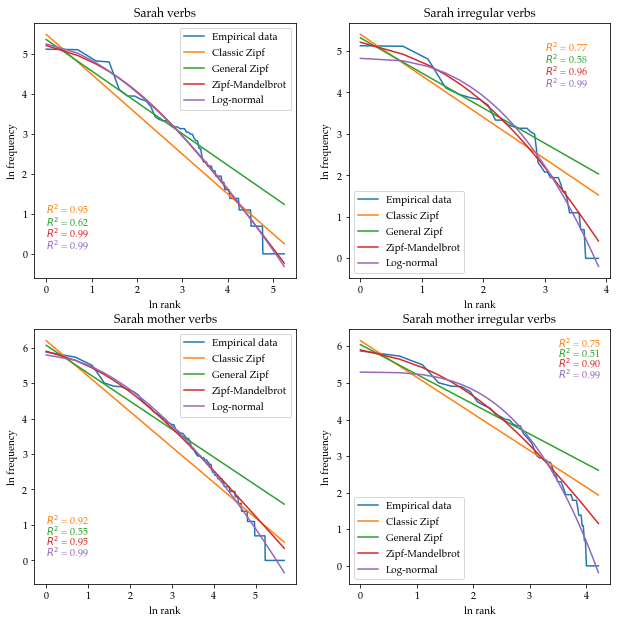

In [334]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(ln(x),ln(y),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(x),ln(yangy), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(x),ln(ply),label='General Zipf', color = '#2ca02c')
plt.plot(ln(x),ln(zmy),label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(ln(x),ln(logny),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(yang_ln_r2), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(pl_ln_r2), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(zm_ln_r2), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(logn_ln_r2), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Sarah verbs')

plt.subplot(2,2,2)
plt.plot(ln(a),ln(b),label ='Empirical data')
plt.plot(ln(a),ln(yangy_ir), label = 'Classic Zipf')
plt.plot(ln(a),ln(ply_ir),label='General Zipf')
plt.plot(ln(a),ln(zmy_ir),label='Zipf-Mandelbrot')
plt.plot(ln(a),ln(logny_ir),label = 'Log-normal')
plt.text(3, 5, '$R^2$ = %0.2f' % float(yang_ln_r2_ir), color = '#ff7f0e')
plt.text(3, 4.7, '$R^2$ = %0.2f' % float(pl_ln_r2_ir), color = '#2ca02c')
plt.text(3, 4.4, '$R^2$ = %0.2f' % float(zm_ln_r2_ir), color = '#d62728')
plt.text(3, 4.1, '$R^2$ = %0.2f' % float(logn_ln_r2_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Sarah irregular verbs')

plt.subplot(2,2,3)
plt.plot(ln(i), ln(j),label ='Empirical data')
plt.plot(ln(i), ln(yangy_mot),label = 'Classic Zipf')
plt.plot(ln(i), ln(ply_mot),label='General Zipf')
plt.plot(ln(i), ln(zmy_mot),label='Zipf-Mandelbrot')
plt.plot(ln(i), ln(logny_mot),label = 'Log-normal')
plt.text(0, 1, '$R^2$ = %0.2f' % float(yang_ln_r2_mot), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(pl_ln_r2_mot), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(zm_ln_r2_mot), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(logn_ln_r2_mot), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Sarah mother verbs')

plt.subplot(2,2,4)
plt.plot(ln(m),ln(n),label ='Empirical data')
plt.plot(ln(m),ln(yangy_mot_ir),label = 'Classic Zipf')
plt.plot(ln(m),ln(ply_mot_ir),label='General Zipf')
plt.plot(ln(m),ln(zmy_mot_ir),label='Zipf-Mandelbrot')
plt.plot(ln(m),ln(logny_mot_ir),label = 'Log-normal')
plt.text(3.5, 6, '$R^2$ = %0.2f' % float(yang_ln_r2_mot_ir), color = '#ff7f0e' )
plt.text(3.5, 5.7, '$R^2$ = %0.2f' % float(pl_ln_r2_mot_ir), color = '#2ca02c')
plt.text(3.5, 5.4, '$R^2$ = %0.2f' % float(zm_ln_r2_mot_ir), color = '#d62728')
plt.text(3.5, 5.1, '$R^2$ = %0.2f' % float(logn_ln_r2_mot_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Sarah mother irregular verbs')

figname = 'Sarah_ln'
plt.savefig(figname+'.png', dpi =300)

In [ ]:
plt.figure(figsize = (10,10))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = None, top = None, wspace = 0.2, hspace = 0.2)
plt.subplot(2,2,1)
plt.plot(ln(Adamx),ln(Adamy),label ='Empirical data', color = '#1f77b4')
plt.plot(ln(Adamx),ln(Adamyangy), label = 'Classic Zipf', color = '#ff7f0e')
plt.plot(ln(Adamx),ln(Adamply),label='General Zipf', color = '#2ca02c')
plt.plot(ln(Adamx),ln(Adamzmy),label='Zipf-Mandelbrot', color = '#d62728')
plt.plot(ln(Adamx),ln(Adamlogny),label = 'Log-normal', color = '#9467bd')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Adamyang_ln_r2), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Adampl_ln_r2), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Adamzm_ln_r2), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Adamlogn_ln_r2), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Adam verbs')

plt.subplot(2,2,2)
plt.plot(ln(Adama),ln(Adamb),label ='Empirical data')
plt.plot(ln(Adama),ln(Adamyangy_ir), label = 'Classic Zipf')
plt.plot(ln(Adama),ln(Adamply_ir),label='General Zipf')
plt.plot(ln(Adama),ln(Adamzmy_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Adama),ln(Adamlogny_ir),label = 'Log-normal')
plt.text(3, 5, '$R^2$ = %0.2f' % float(Adamyang_ln_r2_ir), color = '#ff7f0e')
plt.text(3, 4.7, '$R^2$ = %0.2f' % float(Adampl_ln_r2_ir), color = '#2ca02c')
plt.text(3, 4.4, '$R^2$ = %0.2f' % float(Adamzm_ln_r2_ir), color = '#d62728')
plt.text(3, 4.1, '$R^2$ = %0.2f' % float(Adamlogn_ln_r2_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Adam irregular verbs')

plt.subplot(2,2,3)
plt.plot(ln(Adami), ln(Adamj),label ='Empirical data')
plt.plot(ln(Adami), ln(Adamyangy_mot),label = 'Classic Zipf')
plt.plot(ln(Adami), ln(Adamply_mot),label='General Zipf')
plt.plot(ln(Adami), ln(Adamzmy_mot),label='Zipf-Mandelbrot')
plt.plot(ln(Adami), ln(Adamlogny_mot),label = 'Log-normal')
plt.text(0, 1, '$R^2$ = %0.2f' % float(Adamyang_ln_r2_mot), color = '#ff7f0e' )
plt.text(0, 0.7, '$R^2$ = %0.2f' % float(Adampl_ln_r2_mot), color = '#2ca02c')
plt.text(0, 0.4, '$R^2$ = %0.2f' % float(Adamzm_ln_r2_mot), color = '#d62728')
plt.text(0, 0.1, '$R^2$ = %0.2f' % float(Adamlogn_ln_r2_mot), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Adam mother verbs')

plt.subplot(2,2,4)
plt.plot(ln(Adamm),ln(Adamn),label ='Empirical data')
plt.plot(ln(Adamm),ln(Adamyangy_mot_ir),label = 'Classic Zipf')
plt.plot(ln(Adamm),ln(Adamply_mot_ir),label='General Zipf')
plt.plot(ln(Adamm),ln(Adamzmy_mot_ir),label='Zipf-Mandelbrot')
plt.plot(ln(Adamm),ln(Adamlogny_mot_ir),label = 'Log-normal')
plt.text(3.5, 6, '$R^2$ = %0.2f' % float(Adamyang_ln_r2_mot_ir), color = '#ff7f0e' )
plt.text(3.5, 5.7, '$R^2$ = %0.2f' % float(Adampl_ln_r2_mot_ir), color = '#2ca02c')
plt.text(3.5, 5.4, '$R^2$ = %0.2f' % float(Adamzm_ln_r2_mot_ir), color = '#d62728')
plt.text(3.5, 5.1, '$R^2$ = %0.2f' % float(Adamlogn_ln_r2_mot_ir), color = '#9467bd')
plt.xlabel('ln rank')
plt.ylabel('ln frequency')
plt.legend()
plt.title ('Adam mother irregular verbs')

figname = 'Adam_ln'
plt.savefig(figname+'.tiff', dpi =300)

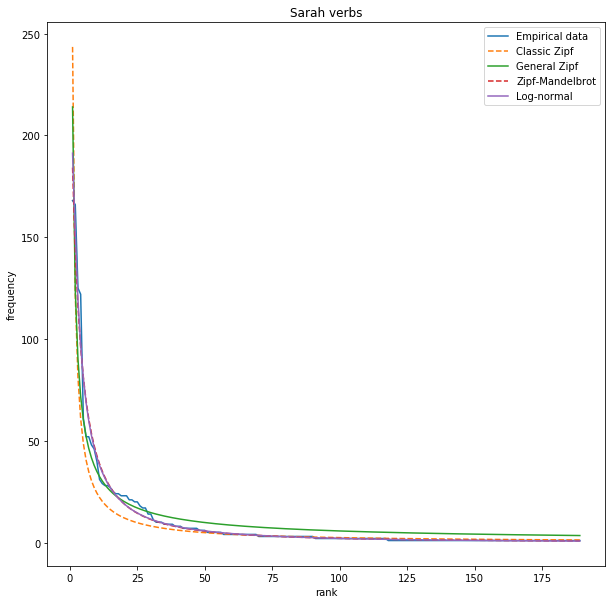

In [50]:
plt.figure(figsize = (10,10))


In [235]:
##Prepare Fit Function
plpt, plcov = curve_fit(pl, Adam_x, Adam)
zmpt, zmcov = curve_fit(zm, Adam_x, Adam)
yangpt, yangcov = curve_fit(yang, Adam_x, Adam)
lnfrpt, lnfrcov = curve_fit(lnfr, ln(Adam_x), ln(Adam))
loglogpt, loglogcov = curve_fit(loglog, ln(Adam_x), ln(Adam))

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


In [286]:
## Calculate R square

def Rsquare(fitfunc, xdata, ydata, p):
    pred_y = fitfunc(xdata, *p)
    r = sum((ydata - pred_y)**2)
    ss = sum((ydata - np.mean(ydata))**2)
    r_2 = 1- (r/ss)
    return pred_y, r_2

Adam_pl = pl(Adam_x, *plpt)
Adam_zm = zm(Adam_x,*zmpt)
Adam_yang = yang(Adam_x, *yangpt)
ln_Adam_frpt = lnfr(ln(Adam_x), *lnfrpt)
ln_Adam_loglog = loglog(ln(Adam_x), *loglogpt)

pl_r = sum((Adam - Adam_pl)**2)
zm_r = sum((Adam - Adam_zm)**2)
yang_r = sum((Adam - Adam_yang)**2)
lnfr_r = sum((Adam - np.exp(lnfr(ln(Adam_x),*lnfrpt)))**2)
loglog_r = sum((Adam - np.exp(loglogpt[1])/(Adam_x**loglogpt[0]))**2)
ss_tot = sum((Adam - numpy.mean(Adam))**2)
pl_r_2 = 1 - (pl_r / ss_tot)
zm_r_2 = 1 - (zm_r / ss_tot)
yang_r_2 = 1 - (yang_r / ss_tot)
lnfr_r_2 = 1 - (lnfr_r / ss_tot)
loglog_r_2 = 1 - (loglog_r / ss_tot)
print('Adam Verb R_square (x,y) for Zipf is %5.2f' %(pl_r_2))
print('Adam Verb R_square (x,y) for Zipf-Mandelbrot is %5.3f' %(zm_r_2))
print('Adam Verb R_square (x,y) for Yang is %5.3f' %(yang_r_2))
print('Adam Verb R_square (x,y) for Lognormal is %5.3f' %(lnfr_r_2))
print('Adam Verb R_square (x,y) for log-log is %5.3f' %(loglog_r_2))


Adam Verb R_square (x,y) for Zipf is  0.97
Adam Verb R_square (x,y) for Zipf-Mandelbrot is 0.971
Adam Verb R_square (x,y) for Yang is 0.934
Adam Verb R_square (x,y) for Lognormal is 0.810
Adam Verb R_square (x,y) for log-log is -111420404356.031


In [287]:
print('Formulas for Adam:')
print('Zipf: y = %5.2f/x**%5.2f'%(plpt[1],plpt[0]))
print('Zipf-Mendalbrot: y = %5.2f/(x+%5.3f)**%5.2f'%(zmpt[2],zmpt[1],zmpt[0]))
print('Yang: y = %5.2f/x' %yangpt)
print('lognormal: y = e**(%5.2f - %5.2f * x ** %5.2f)'%(lnfrpt[0], lnfrpt[1], lnfrpt[2]))
print('log-log: y = %5.2f/x**%5.3f'%(math.e**loglogpt[1],-loglogpt[0]))

Formulas for Adam:
Zipf: y = 808.98/x** 0.84
Zipf-Mendalbrot: y = 1066.04/(x+0.411)** 0.92
Yang: y = 894.51/x
lognormal: y = e**( 5.81 -  0.10 * x **  2.35)
log-log: y = 7195.19/x**1.518


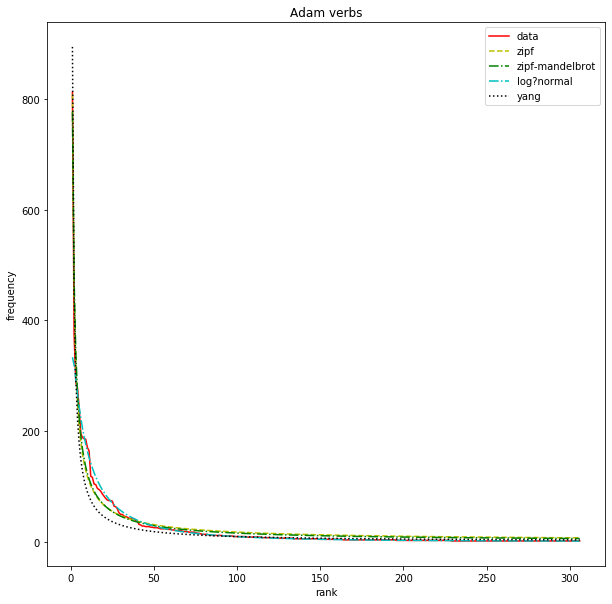

In [268]:
plt.figure(figsize = (10,10))
plt.plot(Adam_x,Adam,'r-',label = 'data')
plt.plot(Adam_x, pl(Adam_x, *plpt), 'y-',linestyle = 'dashed', label='zipf')
plt.plot(Adam_x, zm(Adam_x,*zmpt), 'g-', linestyle = '-.', label='zipf-mandelbrot')
plt.plot(Adam_x, np.exp(lnfr(ln(Adam_x),*lnfrpt)), 'c',linestyle = '-.', label = 'log?normal')
plt.plot(Adam_x, yang(Adam_x, *yangpt), 'k', linestyle = ':', label = 'yang')
#plt.plot(Adam_x, (np.exp(loglogpt[1])*(Adam_x**loglogpt[0])), 'm', linestyle = '-.', label = 'log-log')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Adam verbs')
plt.show()

In [269]:
##Prepare Fit Function
plpt_ir, plcov_ir = curve_fit(pl, Adam_ir_x, Adam_ir)
zmpt_ir, zmcov_ir = curve_fit(zm, Adam_ir_x, Adam_ir)
yangpt_ir, yangcov_ir = curve_fit(yang, Adam_ir_x, Adam_ir)
lnfrpt_ir, lnfrcov_ir = curve_fit(lnfr, ln(Adam_ir_x), ln(Adam_ir))
loglogpt_ir, loglogcov_ir = curve_fit(loglog, ln(Adam_ir_x), ln(Adam_ir))

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


In [306]:
loglogpt_ir

array([-1.64692885,  8.10309162])

In [307]:
lnfrpt_ir

array([5.73677775, 0.07591702, 2.98130687])

In [279]:
## Calculate R square
Adam_pl = pl(Adam_x, *plpt)
Adam_zm = zm(Adam_x,*zmpt)
Adam_yang = yang(Adam_x, *yangpt)
ln_Adam_frpt = lnfr(ln(Adam), *lnfrpt)
ln_Adam_loglog = loglog(ln(Adam), *loglogpt)

Adam_plir_r_2 = Rsquare(pl, Adam_ir_x, Adam_ir, plpt_ir)
Adam_zmir_r_2 = Rsquare(zm, Adam_ir_x, Adam_ir, zmpt_ir)
Adam_yangir_r_2 = Rsquare(yang, Adam_ir_x, Adam_ir, yangpt_ir)

Adam_lnfr_ir_r = sum((Adam_ir - np.exp(lnfr(ln(Adam_ir_x),*lnfrpt_ir)))**2)
Adam_loglog_ir_r = sum((Adam_ir - np.exp(loglogpt_ir[1])/(Adam_ir_x**loglogpt_ir[0]))**2)
Adam_ss_ir_tot = sum((Adam_ir - numpy.mean(Adam_ir))**2)
Adam_lnfr_ir_r_2 = 1 - (Adam_lnfr_ir_r / Adam_ss_ir_tot)
Adam_loglog_ir_r_2 = 1 - (Adam_loglog_ir_r / Adam_ss_ir_tot)
print('Adam Verb Irregular R_square (x,y) for Zipf is %5.2f' %(Adam_plir_r_2))
print('Adam Verb Irregular R_square (x,y) for Zipf-Mandelbrot is %5.3f' %(Adam_zmir_r_2))
print('Adam Verb Irregular R_square (x,y) for Yang is %5.3f' %(Adam_yangir_r_2))
print('Adam Verb Irregular R_square (x,y) for Lognormal is %5.3f' %(Adam_lnfr_ir_r_2))
print('Adam Verb Irregular R_square (x,y) for log-log is %5.3f' %(Adam_loglog_ir_r_2))


Adam Verb Irregular R_square (x,y) for Zipf is  0.96
Adam Verb Irregular R_square (x,y) for Zipf-Mandelbrot is 0.956
Adam Verb Irregular R_square (x,y) for Yang is 0.955
Adam Verb Irregular R_square (x,y) for Lognormal is 0.698
Adam Verb Irregular R_square (x,y) for log-log is -151078238.917


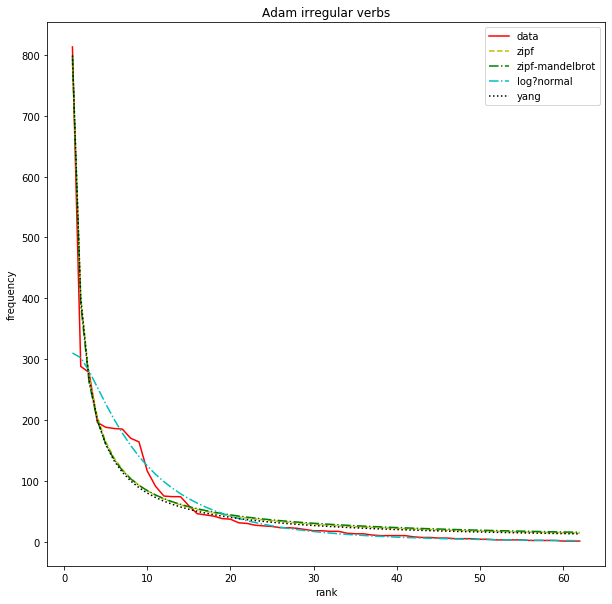

In [270]:
plt.figure(figsize = (10,10))
plt.plot(Adam_ir_x,Adam_ir,'r-',label = 'data')
plt.plot(Adam_ir_x, pl(Adam_ir_x, *plpt_ir), 'y-',linestyle = 'dashed', label='zipf')
plt.plot(Adam_ir_x, zm(Adam_ir_x,*zmpt_ir), 'g-', linestyle = '-.', label='zipf-mandelbrot')
plt.plot(Adam_ir_x, np.exp(lnfr(ln(Adam_ir_x),*lnfrpt_ir)), 'c',linestyle = '-.', label = 'log?normal')
plt.plot(Adam_ir_x, yang(Adam_ir_x, *yangpt_ir), 'k', linestyle = ':', label = 'yang')
#plt.plot(Adam_x, (np.exp(loglogpt[1])*(Adam_x**loglogpt[0])), 'm', linestyle = '-.', label = 'log-log')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Adam irregular verbs')
plt.show()

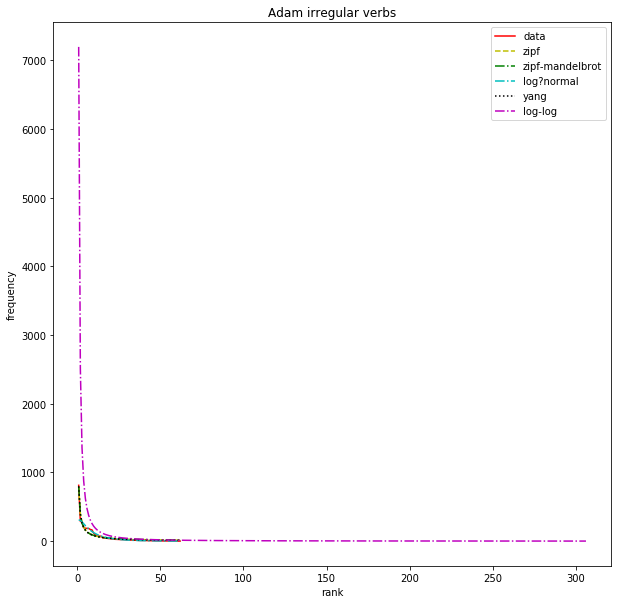

In [302]:
plt.figure(figsize = (10,10))
plt.plot(Adam_ir_x,Adam_ir,'r-',label = 'data')
plt.plot(Adam_ir_x, pl(Adam_ir_x, *plpt_ir), 'y-',linestyle = 'dashed', label='zipf')
plt.plot(Adam_ir_x, zm(Adam_ir_x,*zmpt_ir), 'g-', linestyle = '-.', label='zipf-mandelbrot')
plt.plot(Adam_ir_x, np.exp(lnfr(ln(Adam_ir_x),*lnfrpt_ir)), 'c',linestyle = '-.', label = 'log?normal')
plt.plot(Adam_ir_x, yang(Adam_ir_x, *yangpt_ir), 'k', linestyle = ':', label = 'yang')
plt.plot(Adam_x, (np.exp(loglogpt[1])*(Adam_x**loglogpt[0])), 'm', linestyle = '-.', label = 'log-log')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.legend()
plt.title ('Adam irregular verbs')
plt.show()

In [280]:
print('Formulas for Adam Irregular:')
print('Zipf: y = %5.2f/x**%5.2f'%(plpt_ir[1],plpt_ir[0]))
print('Zipf-Mendalbrot: y = %5.2f/(x+%5.3f)**%5.2f'%(zmpt_ir[2],zmpt_ir[1],zmpt_ir[0]))
print('Yang: y = %5.2f/x' %yangpt_ir)
print('lognormal: y = e**(%5.2f - %5.2f * x ** %5.2f)'%(lnfrpt_ir[0], lnfrpt_ir[1], lnfrpt_ir[2]))
print('log-log: y = %5.2f/x**%5.3f'%(math.e**loglogpt_ir[1],-loglogpt_ir[0]))

Formulas for Adam Irregular:
Zipf: y = 787.45/x** 0.97
Zipf-Mendalbrot: y = 684.82/(x+-0.152)** 0.92
Yang: y = 798.99/x
lognormal: y = e**( 5.74 -  0.08 * x **  2.98)
log-log: y = 3304.67/x**1.647


## Fitting based on ln(y), ln(x) (log frequency, rank)

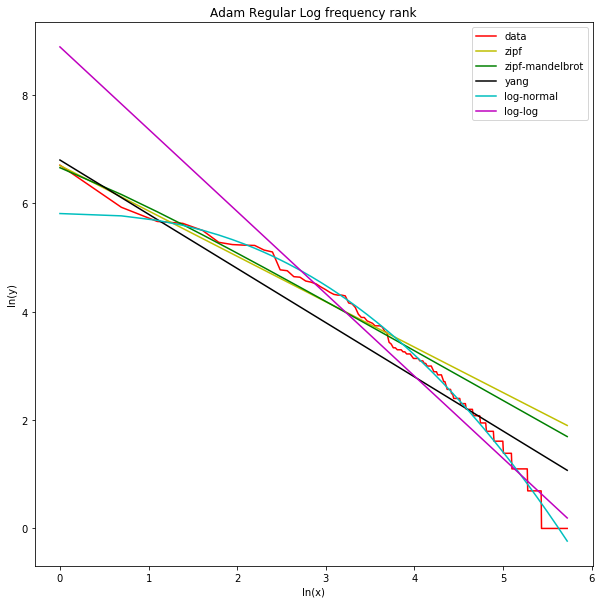

In [289]:
plt.figure(figsize = (10,10))
plt.plot(ln(Adam_x), ln(Adam), 'r', label = 'data')
plt.plot(ln(Adam_x), ln(Adam_pl), 'y', label = 'zipf')
plt.plot(ln(Adam_x), ln(Adam_zm), 'g', label = 'zipf-mandelbrot')
plt.plot(ln(Adam_x), ln(Adam_yang), 'k', label = 'yang')
plt.plot(ln(Adam_x), ln_Adam_frpt, 'c', label='log-normal' )
plt.plot(ln(Adam_x), (slope*(ln(Adam_x))+intercept), 'm', label = 'log-log')
plt.xlabel ('ln(x)')
plt.ylabel('ln(y)')
plt.title ('Adam Regular Log frequency rank')
plt.legend()
plt.show()

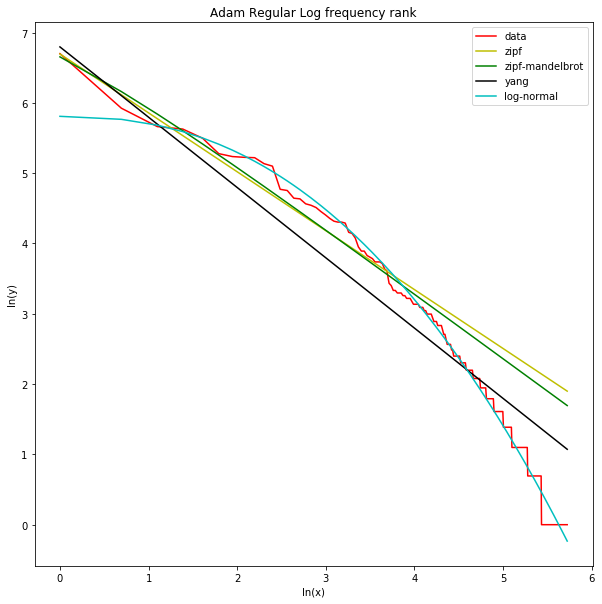

In [303]:
plt.figure(figsize = (10,10))
plt.plot(ln(Adam_x), ln(Adam), 'r', label = 'data')
plt.plot(ln(Adam_x), ln(Adam_pl), 'y', label = 'zipf')
plt.plot(ln(Adam_x), ln(Adam_zm), 'g', label = 'zipf-mandelbrot')
plt.plot(ln(Adam_x), ln(Adam_yang), 'k', label = 'yang')
plt.plot(ln(Adam_x), ln_Adam_frpt, 'c', label='log-normal' )
#plt.plot(ln(Adam_x), (slope*(ln(Adam_x))+intercept), 'm', label = 'log-log')
plt.xlabel ('ln(x)')
plt.ylabel('ln(y)')
plt.title ('Adam Regular Log frequency rank')
plt.legend()
plt.show()

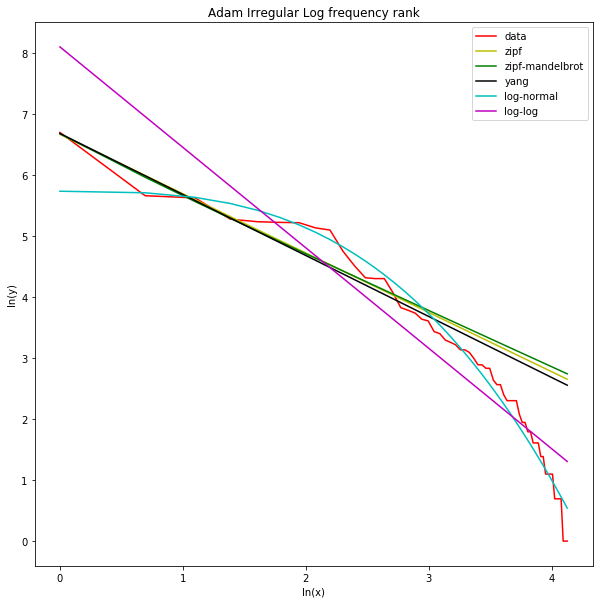

In [309]:
plt.figure(figsize = (10,10))
plt.plot(ln(Adam_ir_x), ln(Adam_ir), 'r', label = 'data')
plt.plot(ln(Adam_ir_x), ln(Rsquare(pl, Adam_ir_x, Adam_ir, plpt_ir)[0]), 'y', label = 'zipf')
plt.plot(ln(Adam_ir_x), ln(Rsquare(zm, Adam_ir_x, Adam_ir, zmpt_ir)[0]), 'g', label = 'zipf-mandelbrot')
plt.plot(ln(Adam_ir_x), ln(Rsquare(yang, Adam_ir_x, Adam_ir, yangpt_ir)[0]), 'k', label = 'yang')
plt.plot(ln(Adam_ir_x), lnfr(ln(Adam_ir_x),*lnfrpt_ir), 'c', label='log-normal' )
plt.plot(ln(Adam_ir_x), loglog(ln(Adam_ir_x), *loglogpt_ir), 'm', label = 'log-log')
plt.xlabel ('ln(x)')
plt.ylabel('ln(y)')
plt.title ('Adam Irregular Log frequency rank')
plt.legend()
plt.show()

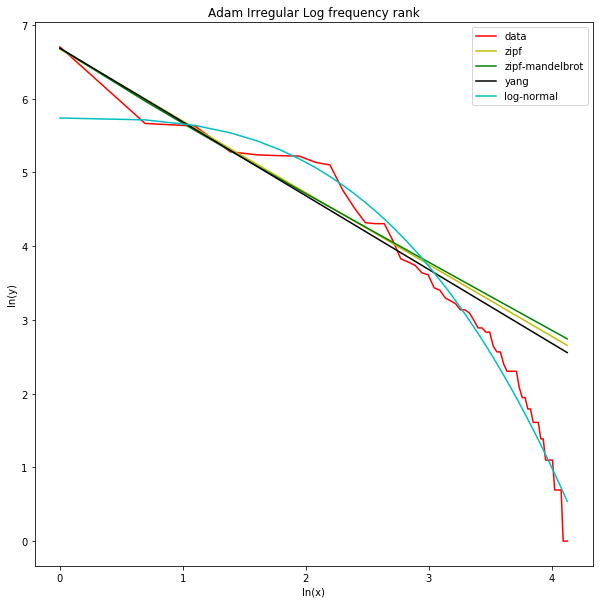

In [313]:
plt.figure(figsize = (10,10))
plt.plot(ln(Adam_ir_x), ln(Adam_ir), 'r', label = 'data')
plt.plot(ln(Adam_ir_x), ln(Rsquare(pl, Adam_ir_x, Adam_ir, plpt_ir)[0]), 'y', label = 'zipf')
plt.plot(ln(Adam_ir_x), ln(Rsquare(zm, Adam_ir_x, Adam_ir, zmpt_ir)[0]), 'g', label = 'zipf-mandelbrot')
plt.plot(ln(Adam_ir_x), ln(Rsquare(yang, Adam_ir_x, Adam_ir, yangpt_ir)[0]), 'k', label = 'yang')
plt.plot(ln(Adam_ir_x), lnfr(ln(Adam_ir_x),*lnfrpt_ir), 'c', label='log-normal' )
#plt.plot(ln(Adam_ir_x), loglog(ln(Adam_ir_x), *loglogpt_ir), 'm', label = 'log-log')
plt.xlabel ('ln(x)')
plt.ylabel('ln(y)')
plt.title ('Adam Irregular Log frequency rank')
plt.legend()
plt.show()

In [310]:
Rsquare(pl, Adam_ir_x, Adam_ir, plpt_ir)[1]

0.9560313478137249

In [301]:
##Rsquare for lnx lny 
def lnR2 (fitfunc, xdata, ydata, p):
    pred_y = ln(Rsquare(fitfunc, xdata, ydata, p)[0]) 
    r = sum((ln(ydata) - pred_y)**2)
    ss = sum((ln(ydata) - ln(np.mean(ydata)))**2)
    r_2 = 1 - (r/ss)
    return pred_y, r_2

lnAdam_pl, lnAdam_pl_r_2 = lnR2(pl, Adam_x, Adam, plpt)
lnAdam_zm_, lnAdam_zm_r_2 = lnR2(zm, Adam_x, Adam, zmpt)
lnAdam_yang, lnAdam_yang_r_2 = lnR2(yang, Adam_x, Adam, yangpt)

Adamss = sum((ln(Adam)-ln(np.mean(Adam)))**2)
ln_Adam_frpt_r = sum((ln_Adam_frpt - ln(Adam))**2)
ln_Adam_frpt_r_2 = 1 - (ln_Adam_frpt_r/Adamss)
                     
ln_Adam_loglog_r = sum((ln(Adam) - slope*(ln(Adam_x))+intercept)**2)
ln_Adam_loglog_r_2 = 1 - (ln_Adam_loglog_r/Adamss)
                     
print('Adam Verb  R_square ln(x,y) for Zipf is %5.2f' %(lnAdam_pl_r_2))
print('Adam Verb  R_square ln(x,y) for Zipf-Mandelbrot is %5.3f' %(lnAdam_zm_r_2))
print('Adam Verb  R_square ln(x,y) for Yang is %5.3f' %(lnAdam_yang_r_2))
print('Adam Verb  R_square ln(x,y) for Lognormal is %5.3f' %(ln_Adam_frpt_r_2))
print('Adam Verb  R_square ln(x,y) for log-log is %5.3f' %(ln_Adam_loglog_r_2))

Adam Verb  R_square ln(x,y) for Zipf is  0.61
Adam Verb  R_square ln(x,y) for Zipf-Mandelbrot is 0.693
Adam Verb  R_square ln(x,y) for Yang is 0.876
Adam Verb  R_square ln(x,y) for Lognormal is 0.994
Adam Verb  R_square ln(x,y) for log-log is -73.380


(array([78., 65., 49., 37., 35., 14., 15.,  8.,  4.,  1.]),
 array([0.        , 0.67007311, 1.34014622, 2.01021933, 2.68029244,
        3.35036555, 4.02043867, 4.69051178, 5.36058489, 6.030658  ,
        6.70073111]),
 <a list of 10 Patch objects>)

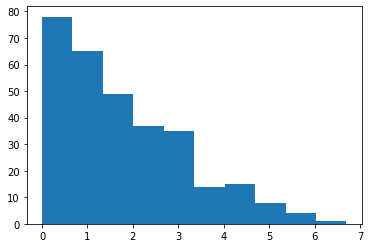

In [342]:
plt.hist(ln(Adam), bins = 'auto')

(array([ 1.,  0.,  1.,  1.,  1.,  2.,  3.,  3.,  5.,  7.,  9., 12., 17.,
        23., 32., 45., 60., 84.]),
 array([0.        , 0.31797695, 0.6359539 , 0.95393085, 1.2719078 ,
        1.58988475, 1.9078617 , 2.22583865, 2.5438156 , 2.86179255,
        3.1797695 , 3.49774645, 3.8157234 , 4.13370035, 4.4516773 ,
        4.76965425, 5.0876312 , 5.40560815, 5.7235851 ]),
 <a list of 18 Patch objects>)

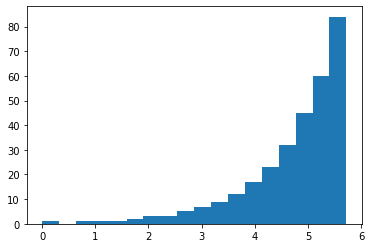

In [344]:
plt.hist(ln(Adam_x), bins = 'auto')

In [312]:
##Rsquare for lnx lny Irregular
lnAdam_ir_pl, lnAdam_ir_pl_r_2 = lnR2(pl, Adam_ir_x, Adam_ir, plpt_ir)
lnAdam_ir_zm_, lnAdam_ir_zm_r_2 = lnR2(zm, Adam_ir_x, Adam_ir, zmpt_ir)
lnAdam_ir_yang, lnAdam_yang_ir_r_2 = lnR2(yang, Adam_ir_x, Adam_ir, yangpt_ir)

Adamirss = sum((ln(Adam_ir) - ln(np.mean(Adam_ir)))**2)
ln_Adam_ir_frpt_r = sum((lnfr(ln(Adam_ir_x),*lnfrpt_ir) - ln(Adam_ir))**2)
ln_Adam_ir_frpt_r_2 = 1 - (ln_Adam_ir_frpt_r/Adamirss)

ln_Adam_ir_loglog_r = sum((loglog(ln(Adam_ir_x), *loglogpt_ir))**2)
ln_Adam_ir_loglog_r_2 = 1 - (ln_Adam_ir_loglog_r/Adamirss)

print('Adam Verb  R_square ln(x,y) for Zipf is %5.2f' %(lnAdam_ir_pl_r_2))
print('Adam Verb  R_square ln(x,y) for Zipf-Mandelbrot is %5.3f' %(lnAdam_ir_zm_r_2))
print('Adam Verb  R_square ln(x,y) for Yang is %5.3f' %(lnAdam_yang_ir_r_2))
print('Adam Verb  R_square ln(x,y) for Lognormal is %5.3f' %(ln_Adam_ir_frpt_r_2))
print('Adam Verb  R_square ln(x,y) for log-log is %5.3f' %(ln_Adam_ir_loglog_r_2))

Adam Verb  R_square ln(x,y) for Zipf is  0.70
Adam Verb  R_square ln(x,y) for Zipf-Mandelbrot is 0.673
Adam Verb  R_square ln(x,y) for Yang is 0.735
Adam Verb  R_square ln(x,y) for Lognormal is 0.985
Adam Verb  R_square ln(x,y) for log-log is -1.672


### PDF and CDF

In [319]:
adam_fit = powerlaw.Fit(Adam, discrete = True)
adam_R, adam_p= adam_fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
adam_R, adam_p

Calculating best minimal value for power law fit


(-2.520493446852591, 0.011719042038191213)

In [323]:
adam_mu, adam_sigma = adam_fit.lognormal.parameter1, adam_fit.lognormal.parameter2
adam_mu, adam_sigma

(0.581362861628955, 2.173741139667111)

## P and t

In [335]:
TN = adam_fit.lognormal.pdf(Adam_x) * sorted(Adam_x)[:304]
sum(TN)

22.060875242269024

In [354]:
def lognormalp (x, mu, sigma):
    px = (1/math.sqrt(2*math.pi)*x*sigma) * (np.exp(-(ln(x)-mu)**2/2*sigma**2))
    return px

In [361]:
list(adam_fit.lognormal.pdf(Adam_x))

[0.1368881694284621,
 0.09823677869946934,
 0.07511504988986356,
 0.0598830806054323,
 0.04918217964423954,
 0.04130858869320515,
 0.03530889791573992,
 0.030609702708415287,
 0.026846484866334154,
 0.02377707401961468,
 0.021234692383084126,
 0.019100994114742777,
 0.017289846947924563,
 0.015737187050927633,
 0.01439445801687841,
 0.013224244066558243,
 0.012197289874510669,
 0.01129042132707477,
 0.010485066156039329,
 0.009766182787222204,
 0.00912147244957058,
 0.008540791322788796,
 0.008015706218419275,
 0.007539154753222747,
 0.007105182607240844,
 0.006708738343387579,
 0.0063455116942742135,
 0.006011805014733811,
 0.0057044302841000455,
 0.005420625967736521,
 0.005157989443762265,
 0.004914421724721653,
 0.004688081962078027,
 0.004477349788153956,
 0.004280793977547706,
 0.004097146235064829,
 0.003925279166294465,
 0.0037641876792901584,
 0.003612973215305766,
 0.0034708303235854985,
 0.0033370351873230437,
 0.0032109357809375003,
 0.0030919433969484596,
 0.00297952532733

In [350]:
1/math.sqrt(2*math.pi)*4*adam_sigma

3.4687889890448256

In [352]:
np.exp(-(ln(4)-adam_mu)**2/2*adam_sigma**2)

0.21637391225726935

In [358]:
np.array(Adam_x)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [362]:
list(lognormalp(np.array(Adam_x), adam_mu, adam_sigma))

[0.39023795951749124,
 1.6839399329738194,
 1.3826799537848986,
 0.7505554443545671,
 0.35695440420021196,
 0.1633200091505738,
 0.07459598840523814,
 0.03455397884881738,
 0.01634276903187357,
 0.007912722816496609,
 0.003924188088012932,
 0.0019925820998826873,
 0.0010349890018028739,
 0.0005493213993083751,
 0.0002975608579287986,
 0.0001643131972782403,
 9.238975640215647e-05,
 5.284014703742313e-05,
 3.070840049712971e-05,
 1.8117499596016496e-05,
 1.0842066062614593e-05,
 6.575848134177735e-06,
 4.039216287822295e-06,
 2.5110314571346933e-06,
 1.578859296610435e-06,
 1.003501328983936e-06,
 6.443790937471176e-07,
 4.1782715562503576e-07,
 2.734525095445815e-07,
 1.8055505645546884e-07,
 1.2022790195664697e-07,
 8.070601980037725e-08,
 5.4595846008070985e-08,
 3.720695361112229e-08,
 2.5536792537927932e-08,
 1.7646618294167578e-08,
 1.227417643779738e-08,
 8.591100577760546e-09,
 6.0496066642781274e-09,
 4.284791244016303e-09,
 3.051857279361425e-09,
 2.185464414894456e-09,
 1.573

In [333]:
len(adam_fit.lognormal.pdf(Adam_x))

304

In [321]:
adam_ir_fit = powerlaw.Fit(Adam_ir, discrete = True)
adam_ir_R, adam_ir_p= adam_ir_fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
adam_ir_R, adam_ir_p

Calculating best minimal value for power law fit


(-1.3095462165026746, 0.1903493932397956)

In [233]:
adam_fit = powerlaw.Fit(Adamy, discrete = True)
adam_R, adam_p = adam_fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
adam_R, adam_p 

Calculating best minimal value for power law fit
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(-2.520493446852591, 0.011719042038191213)

In [ ]:
adam_fit = powerlaw.Fit(Adamy, discrete = True)
adam_R, adam_p = adam_fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
adam_R, adam_p 

### Adam's distirbution is not power law, it's lognormal. 
### Adam's irregular distribution is not power law, it's lognormal. 
The negative showed that it's unlikely the first distribution (powerlaw). It's lognormal

In [380]:
import nltk
from nltk.corpus.reader import CHILDESCorpusReader
corpus = nltk.data.find('/Users/Ershui13/Desktop/Tolerance-Principle/')
Adam_all = CHILDESCorpusReader(corpus, 'Adam-All-data/.*.xml')

In [381]:
all_words = Adam_all.words(speaker = ['CHI'])

In [382]:
rank_all_words = FreqDist(all_words).most_common()

In [383]:
rank_all_words

[('I', 7462),
 ('you', 4501),
 ('a', 4442),
 ('it', 4300),
 ('that', 3628),
 ('the', 3390),
 ('what', 3130),
 ('dat', 3025),
 ('this', 2628),
 ('Mommy', 2298),
 ('dis', 2185),
 ('is', 1883),
 ('no', 1740),
 ('de', 1696),
 ('in', 1680),
 ('', 1653),
 ('one', 1648),
 ('me', 1645),
 ('to', 1604),
 ('my', 1582),
 ('on', 1489),
 ('and', 1353),
 ('put', 1310),
 ('some', 1277),
 ('yeah', 1275),
 ('go', 1269),
 ('have', 1190),
 ("don't", 1187),
 ('see', 1168),
 ('like', 1115),
 ('can', 1108),
 ('do', 1104),
 ('where', 1073),
 ("it's", 1059),
 ('xxx', 1031),
 ('there', 941),
 ('why', 932),
 ('up', 918),
 ('want', 896),
 ('dere', 875),
 ('for', 867),
 ('he', 857),
 ('get', 805),
 ('look', 770),
 ('going', 767),
 ('here', 753),
 ('gonna', 725),
 ('we', 718),
 ('they', 714),
 ('know', 697),
 ("that's", 680),
 ('how', 678),
 ('with', 676),
 ('are', 673),
 ('two', 660),
 ('down', 643),
 ('not', 632),
 ("I'm", 628),
 ('oh', 608),
 ('play', 604),
 ('out', 603),
 ('yes', 601),
 ('got', 593),
 ('now', 5

In [384]:
dfall = pd.DataFrame(rank_all_words)
dfall.columns = ['word', 'count']

Text(0.5, 1.0, 'Adam all words')

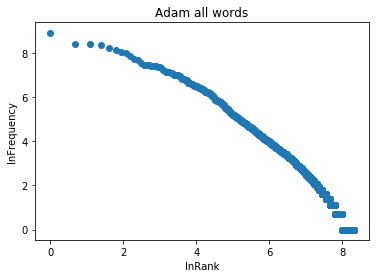

In [386]:
all_x = list(range(1, len(dfall)+1))
all_y = dfall['count']
plt.figure()
plt.scatter(ln(all_x), ln(all_y))
plt.xlabel('lnRank')
plt.ylabel('lnFrequency')
plt.title ('Adam all words')

In [387]:
plpt_all, plcov_all = curve_fit(pl, all_x, all_y)
zmpt_all, zmcov_all = curve_fit(zm, all_x, all_y)
yangpt_all, yangcov_all = curve_fit(yang, all_x, all_y)
lnfrpt_all, lnfrcov_all = curve_fit(lnfr, ln(all_x), ln(all_y))
loglogpt_all, loglogcov_all = curve_fit(loglog, ln(all_x), ln(all_y))

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


In [ ]:

plt.figure(figsize = (10,10))
plt.plot(all_x,all_y,'r-',label = 'data')
plallpt, plallcov = 
plt.plot(all_x, pl(all_x, *plpt_ir), 'y-',linestyle = 'dashed', label='zipf')
plt.plot(all_x, zm(all_x,*zmpt_ir), 'g-', linestyle = '-.', label='zipf-mandelbrot')
plt.plot(all_x, yang(all_x, *yangpt_ir), 'k', linestyle = ':', label = 'yang')


### Great Try

In [409]:
pi = []
for i in Adam:
    p = i/sum(Adam)
    pi.append(p)

In [413]:
pi

[0.12049799911071588,
 0.05543204387135023,
 0.0426856380613606,
 0.04120349785089669,
 0.0361642211353194,
 0.029049948125092633,
 0.027864235956721505,
 0.027567807914628723,
 0.027419593893582332,
 0.025196383577886467,
 0.02430709945160812,
 0.017489254483474135,
 0.017192826441381356,
 0.015414258188824663,
 0.015266044167778272,
 0.014228546020453535,
 0.013932117978360753,
 0.01348747591522158,
 0.012746405809989625,
 0.01215354972580406,
 0.011560693641618497,
 0.011116051578479324,
 0.010967837557432933,
 0.010967837557432933,
 0.010819623536386542,
 0.009485697346969022,
 0.009337483325922631,
 0.008744627241737067,
 0.007707129094412331,
 0.007262487031273158,
 0.007262487031273158,
 0.006817844968133985,
 0.006669630947087594,
 0.006521416926041203,
 0.006224988883948421,
 0.006224988883948421,
 0.006224988883948421,
 0.00607677486290203,
 0.005632132799762857,
 0.005483918778716466,
 0.00459463465243812,
 0.004446420631391729,
 0.004149992589298948,
 0.004149992589298948,


In [410]:
ti = []
for i in Adam:
    t = 813/i
    ti.append(t)

In [411]:
Tn = [k * j for k,j in zip(pi,ti)]

In [415]:
np.multiply(pi,ti)

array([0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120498,
       0.120498, 0.120498, 0.120498, 0.120498, 0.120498, 0.120

In [414]:
sum(Tn)

36.87238772787899

In [432]:
pir_i = []
tir_i = []
for i in Adam_ir:
    p = i/sum(Adam_ir)
    t = 813/i
    pir_i.append(p)
    tir_i.append(t)

In [422]:
pir_i

[0.22384361233480177,
 0.07929515418502203,
 0.07654185022026432,
 0.053964757709251104,
 0.051762114537444934,
 0.051211453744493395,
 0.05093612334801762,
 0.04680616740088106,
 0.04515418502202643,
 0.031938325991189426,
 0.025055066079295155,
 0.02064977973568282,
 0.020374449339207047,
 0.020374449339207047,
 0.016244493392070486,
 0.012665198237885462,
 0.012114537444933921,
 0.011563876651982379,
 0.010462555066079295,
 0.010187224669603524,
 0.008535242290748899,
 0.008259911894273128,
 0.007433920704845815,
 0.007158590308370044,
 0.006883259911894273,
 0.006332599118942731,
 0.006332599118942731,
 0.006057268722466961,
 0.005506607929515419,
 0.004955947136563877,
 0.004955947136563877,
 0.004680616740088106,
 0.004680616740088106,
 0.003854625550660793,
 0.003579295154185022,
 0.003579295154185022,
 0.0030286343612334803,
 0.0027533039647577094,
 0.0027533039647577094,
 0.0027533039647577094,
 0.0027533039647577094,
 0.0022026431718061676,
 0.0019273127753303965,
 0.00192731

In [433]:
tir_i

[1.0,
 2.8229166666666665,
 2.9244604316546763,
 4.1479591836734695,
 4.324468085106383,
 4.370967741935484,
 4.394594594594595,
 4.7823529411764705,
 4.9573170731707314,
 7.008620689655173,
 8.934065934065934,
 10.84,
 10.986486486486486,
 10.986486486486486,
 13.779661016949152,
 17.67391304347826,
 18.477272727272727,
 19.357142857142858,
 21.394736842105264,
 21.972972972972972,
 26.225806451612904,
 27.1,
 30.11111111111111,
 31.26923076923077,
 32.52,
 35.34782608695652,
 35.34782608695652,
 36.95454545454545,
 40.65,
 45.166666666666664,
 45.166666666666664,
 47.8235294117647,
 47.8235294117647,
 58.07142857142857,
 62.53846153846154,
 62.53846153846154,
 73.9090909090909,
 81.3,
 81.3,
 81.3,
 81.3,
 101.625,
 116.14285714285714,
 116.14285714285714,
 135.5,
 135.5,
 162.6,
 162.6,
 162.6,
 203.25,
 203.25,
 271.0,
 271.0,
 271.0,
 271.0,
 406.5,
 406.5,
 406.5,
 406.5,
 813.0,
 813.0,
 813.0]

In [434]:
Tr = sum([k * j for k,j in zip(pir_i,tir_i)]) + (1-len(Adam_ir)/len(Adam))*len(Adam_ir)

In [435]:
sum([k * j for k,j in zip(pir_i,tir_i)])

13.87830396475772

In [436]:
Tr

63.31621246148975

In [419]:
(1-len(Adam_ir)/len(Adam))*len(Adam_ir)

49.43790849673203

In [420]:
len(Adam_ir)

62

In [421]:
len(Adam)

306

In [437]:
Trr = sum([k * j for k,j in zip(pir_i,tir_i)]) + (1-len(Adam_ir)/len(Adam))*sum([k * j for k,j in zip(pir_i,tir_i)])
Trr

24.944663988943617

In [424]:
sum([k * j for k,j in zip(pir_i,pir_i)])

0.081758269615168

In [438]:
Eve = data['Eve'].dropna()
Eve_ir = data['Eve_ir'].dropna()

In [439]:
Eve_pi = []
Eve_ti = []
for i in Eve:
    p = i/sum(Eve)
    t = Eve[0]/i
    Eve_pi.append(p)
    Eve_ti.append(t)

In [440]:
TnEve = sum(np.multiply(Eve_pi,Eve_ti))
TnEve

7.420212765957441

In [441]:
Evepir_i = []
Evetir_i = []
for i in Eve_ir:
    p = i/sum(Eve_ir)
    t = Eve_ir[0]/i
    Evepir_i.append(p)
    Evetir_i.append(t)

In [442]:
EveTr = sum([k * j for k,j in zip(Evepir_i,Evetir_i)]) + (1-len(Eve_ir)/len(Eve))*sum([k * j for k,j in zip(Evepir_i,Evetir_i)])
EveTr


6.37503589547238

In [6]:
import openturns as ot

In [129]:
Eve = data['Eve'].dropna()
Eve_x = np.array(range(1,len(Eve)+1))
plpt_Eve, plcov_Eve = curve_fit(pl, Eve_x, Eve)

In [130]:
zmEve, zmcovEve = curve_fit(zm, Eve_x, Eve)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [138]:
d = PRO(Eve)
x = np.array(range(1, len(Eve)+1))
plp = d.plpara()
zmp = d.zmpara()
yangp = d.yangpara()
lognormalp = d.lognormal()
ypl = pl(x, *plp)
yzm = zm(x, *zmp)
yyang = yang(x, *yangp)
ylognormal = np.exp(lnfr(ln(x),*lognormalp))
print(ypl, yzm, yyang, ylognormal)

[58.82284821 36.97803646 28.1847455  23.24564727 20.01890093 17.71788648
 15.98001242 14.61300189 13.50461433 12.58455976 11.80638698 11.13806407
 10.55672602 10.04557753  9.59198075  9.18622837  8.82073015  8.48945837
  8.18756017  7.91108088  7.65676258  7.42189509  7.20420386  7.00176465
  6.8129376   6.63631585  6.47068494  6.31499058  6.16831266  6.02984427
  5.89887454  5.77477456  5.65698572  5.54500999  5.43840183  5.33676132
  5.23972838  5.14697788  5.05821539  4.97317362  4.89160931  4.81330052
  4.73804435  4.66565485  4.59596134  4.52880677  4.4640464   4.40154662
  4.34118382  4.28284353  4.22641953  4.17181311  4.11893243  4.06769191
  4.01801168  3.96981715  3.92303853  3.87761044  3.83347161  3.79056452
  3.7488351   3.70823251  3.66870887  3.63021905  3.59272049  3.55617299
  3.52053856  3.48578126  3.45186706  3.41876375  3.38644076  3.35486908
  3.32402118  3.29387089  3.26439331  3.23556478  3.20736272  3.17976567
  3.15275312  3.12630553  3.10040424  3.07503144  3

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [135]:
Eve

0     45.0
1     37.0
2     36.0
3     34.0
4     31.0
      ... 
88     1.0
89     1.0
90     1.0
91     1.0
92     1.0
Name: Eve, Length: 93, dtype: float64

In [132]:
ylist

[array([58.82284821, 36.97803646, 28.1847455 , 23.24564727, 20.01890093,
        17.71788648, 15.98001242, 14.61300189, 13.50461433, 12.58455976,
        11.80638698, 11.13806407, 10.55672602, 10.04557753,  9.59198075,
         9.18622837,  8.82073015,  8.48945837,  8.18756017,  7.91108088,
         7.65676258,  7.42189509,  7.20420386,  7.00176465,  6.8129376 ,
         6.63631585,  6.47068494,  6.31499058,  6.16831266,  6.02984427,
         5.89887454,  5.77477456,  5.65698572,  5.54500999,  5.43840183,
         5.33676132,  5.23972838,  5.14697788,  5.05821539,  4.97317362,
         4.89160931,  4.81330052,  4.73804435,  4.66565485,  4.59596134,
         4.52880677,  4.4640464 ,  4.40154662,  4.34118382,  4.28284353,
         4.22641953,  4.17181311,  4.11893243,  4.06769191,  4.01801168,
         3.96981715,  3.92303853,  3.87761044,  3.83347161,  3.79056452,
         3.7488351 ,  3.70823251,  3.66870887,  3.63021905,  3.59272049,
         3.55617299,  3.52053856,  3.48578126,  3.4

In [80]:
class PRO:
    def __init__ (self, data):
        self.data  = data
    def plpara (self):
        data_x = list(range(1, len(self.data)+1))
        #pl = C/x**k
        pt, cov = curve_fit(pl, data_x, self.data)
        return pt
    def zmpara (self):
        data_x = list(range(1, len(self.data)+1))
        #zm = C/(x+b)**k
        pt, cov = curve_fit(zm, data_x, self.data, p0 = [0,1,0], maxfev=10000)
        return pt
    def yangpara (self):
        data_x = list(range(1, len(self.data)+1))
        #yang = C/x
        pt, cov = curve_fit(yang, data_x, self.data)
        return pt
    def lognormal (self):
        data_x = list(range(1, len(self.data)+1))
        #l = d - m*(x**k)
        pt, cov = curve_fit(lnfr,ln(data_x), ln(self.data))
        return pt

In [84]:
data = pd.read_csv('8x4.csv',sep = ',')
child = ['Adam','Allison','April','Eve','Fraser','Peter','Naomi','Sarah']
child_ir = ['Adam_ir','Allison_ir','April_ir','Eve_ir','Fraser_ir','Peter_ir','Naomi_ir','Sarah_ir']
mother = ['Adam_mother','Allison_mother','April_mother','Eve_mother','Fraser_mother','Peter_mother','Naomi_mother','Sarah_mother']
mother_ir = ['Adam_mother_ir','Allison_mother_ir','April_mother_ir','Eve_mother_ir','Fraser_mother_ir','Peter_mother_ir','Naomi_mother_ir','Sarah_mother_ir']

In [172]:
predy = []
for i in child:
    y = data[i].dropna()
    d = PRO(y)
    x = np.array(range(1, len(y)+1))
    plp = d.plpara()
    zmp = d.zmpara()
    yangp = d.yangpara()
    lognormalp = d.lognormal()
    ypl = pl(x, *plp)
    yzm = zm(x, *zmp)
    yyang = yang(x, *yangp)
    ylognormal = np.exp(lnfr(ln(x),*lognormalp))
    ylist = [ypl,yzm,yyang,ylognormal,y]
    #print(ylist)
    predy.append(ylist)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [168]:
predy_mother = []
for i in mother:
    y = data[i].dropna()
    d = PRO(y)
    x = np.array(range(1, len(y)+1))
    plp = d.plpara()
    zmp = d.zmpara()
    yangp = d.yangpara()
    lognormalp = d.lognormal()
    ypl = pl(x, *plp)
    yzm = zm(x, *zmp)
    yyang = yang(x, *yangp)
    ylognormal = np.exp(lnfr(ln(x),*lognormalp))
    ylist = [ypl,yzm,yyang,ylognormal,y]
    #print(ylist)
    predy_mother.append(ylist)
predp_mother = []
for i in predy_mother:
    ppl = i[0]/sum(i[0])
    pzm = i[1]/sum(i[1])
    pyang = i[2]/sum(i[2])
    plognormal = i[3]/sum(i[3])
    praw = i[4]/sum(i[4])
    plist = [ppl,pzm,pyang,plognormal,praw]
    predp_mother.append(plist)
Tn_mother = []
for i in predp_mother:
    r = np.array(range(1,len(i[0])+1))
    Tn_pl = i[0] * r
    Tn_zm = i[1] * r
    Tn_yang = i[2] * r
    Tn_lognormal = i[3] * r
    Tn_raw = i[4] * r
    Tnlist = [sum(Tn_pl), sum(Tn_zm), sum(Tn_yang), sum(Tn_lognormal),sum(Tn_raw)]
    Tn_mother.append(Tnlist)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [183]:
TnF_mother = []
for i,k in zip(predp_mother, mother):
    y = np.array(data[k].dropna())
    f = y[0]/y
    print(f)
    Tn_pl = i[0] * f
    Tn_zm = i[1] * f
    Tn_yang = i[2] * f
    Tn_lognormal = i[3] * f
    Tn_raw = i[4] * f
    Tnlist = [sum(Tn_pl), sum(Tn_zm), sum(Tn_yang), sum(Tn_lognormal),sum(Tn_raw)]
    TnF_mother.append(Tnlist)

[  1.           1.10089021   1.78365385   1.93229167   2.00540541
   2.55862069   2.72794118   2.76865672   3.09166667   3.34234234
   3.78571429   3.86458333   4.12222222   4.36470588   4.36470588
   5.37681159   5.796875     5.98387097   6.18333333   6.625
   6.74545455   6.74545455   7.2745098    7.42         8.06521739
   8.43181818   8.83333333   9.51282051   9.51282051   9.51282051
  10.02702703  10.91176471  11.24242424  11.59375     12.36666667
  13.74074074  14.26923077  14.26923077  15.45833333  16.86363636
  16.86363636  16.86363636  17.66666667  17.66666667  17.66666667
  19.52631579  19.52631579  20.61111111  21.82352941  21.82352941
  21.82352941  23.1875      24.73333333  24.73333333  24.73333333
  24.73333333  24.73333333  26.5         26.5         26.5
  28.53846154  28.53846154  28.53846154  28.53846154  28.53846154
  28.53846154  30.91666667  30.91666667  30.91666667  30.91666667
  30.91666667  33.72727273  33.72727273  33.72727273  33.72727273
  33.72727273  33.7272

In [182]:
TnF_mother

[[73.22212924654411,
  36.846766254207424,
  42.72693156303889,
  24.307882535828742,
  23.59464668094227],
 [24.355302060823266,
  8.360431826295066,
  14.785504409484435,
  10.915443350751058,
  10.695113558155533],
 [14.444435703811136,
  7.002497675789159,
  8.651809045785154,
  7.744572185637814,
  7.598784194528888],
 [29.72194456278575,
  14.235714021225514,
  18.49160004708511,
  12.815509578703027,
  12.452410383189141],
 [575.906039242114,
  1998.0514416974358,
  481.9007042200133,
  95.73288442821146,
  88.35566612070905],
 [217.96260926387248,
  478.7277554050216,
  118.77384594443741,
  41.548302390560146,
  42.67963783471402],
 [26.439102843505196,
  9.781713387448102,
  15.636014251573805,
  12.774037547468389,
  12.488038277511988],
 [74.94787583457561,
  37.51077755748338,
  47.401307253187596,
  27.242350064241283,
  26.973881561934192]]

In [169]:
Tn_mother

[[74.8671007349698,
  44.73590192232041,
  47.34855761030601,
  35.5016563613732,
  35.27366167023555],
 [39.21756198434398,
  17.90365840118881,
  25.351180558733745,
  21.359794790388058,
  21.319339298004124],
 [30.753262202370664,
  17.911117523337232,
  19.277563597396014,
  18.815707418236364,
  19.092705167173253],
 [37.47109904650246,
  22.164493738135135,
  25.054065208254315,
  21.403761636575716,
  21.1699629171817],
 [97.06816662240196,
  265.2411715720156,
  83.68349378101139,
  32.23392121304812,
  30.800673692017664],
 [151.94390617392528,
  292.4698106987766,
  90.06220137205405,
  44.55643959014477,
  47.193475887754474],
 [48.654645959434724,
  22.384378256716772,
  30.31812191177058,
  27.049426303329017,
  27.11961722488039],
 [69.68207544431239,
  40.491412481057374,
  46.811888418747614,
  32.80550233840716,
  33.37419188001035]]

In [170]:
predy_ir_mother = []
for i in mother_ir:
    y = data[i].dropna()
    d = PRO(y)
    x = np.array(range(1, len(y)+1))
    plp = d.plpara()
    zmp = d.zmpara()
    yangp = d.yangpara()
    lognormalp = d.lognormal()
    ypl = pl(x, *plp)
    yzm = zm(x, *zmp)
    yyang = yang(x, *yangp)
    ylognormal = np.exp(lnfr(ln(x),*lognormalp))
    ylist = [ypl,yzm,yyang,ylognormal,y]
    #print(ylist)
    predy_ir_mother.append(ylist)
predp_ir_mother = []
for i in predy_ir_mother:
    ppl = i[0]/sum(i[0])
    pzm = i[1]/sum(i[1])
    pyang = i[2]/sum(i[2])
    plognormal = i[3]/sum(i[3])
    praw = i[4]/sum(i[4])
    plist = [ppl,pzm,pyang,plognormal,praw]
    predp_ir_mother.append(plist)
Tr1st_mother = []
for i in predp_ir_mother:
    r = np.array(range(1,len(i[0])+1))
    Tr_pl = i[0] * r
    Tr_zm = i[1] * r
    Tr_yang = i[2] * r
    Tr_lognormal = i[3] * r
    Tr_raw = i[4] * r
    Trlist = [sum(Tr_pl), sum(Tr_zm), sum(Tr_yang), sum(Tr_lognormal),sum(Tr_raw)]
    Tr1st_mother.append(Trlist)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [186]:
TFr1st_mother = []
for i,k in zip(predp_ir_mother, mother_ir):
    y = np.array(data[k].dropna())
    f = y[0]/y
    Tr_pl = i[0] * f
    Tr_zm = i[1] * f
    Tr_yang = i[2] * f
    Tr_lognormal = i[3] * f
    Tr_raw = i[4] * f
    Trlist = [sum(Tr_pl), sum(Tr_zm), sum(Tr_yang), sum(Tr_lognormal),sum(Tr_raw)]
    TFr1st_mother.append(Trlist)

In [171]:
Tr_mother = []
for i,k,j in zip(Tr1st_mother, mother_ir,mother):
    tokene = sum(data[k].dropna())
    tokenN = sum(data[j].dropna())
    Trr = i * np.array(2-tokene/tokenN)
    Tr_mother.append(Trr)
Tr_mother

[array([26.65186281, 17.62351269, 20.08875076, 17.00617832, 15.84926557]),
 array([18.47122555, 10.61963658, 13.64272214, 11.28608032, 11.1145008 ]),
 array([16.85725451, 12.7689861 , 11.87096897, 12.5132315 , 12.29875798]),
 array([19.44194914, 13.01333682, 15.59127135, 12.86435839, 12.33768269]),
 array([25.06600134, 12.57531239, 24.15093712, 13.12711905, 10.36810732]),
 array([32.95882391, 15.87875556, 24.16569244, 17.64628084, 15.64295506]),
 array([23.99663663, 13.86501526, 17.13198833, 14.01039326, 14.0393104 ]),
 array([24.36649674, 15.25971099, 19.06693253, 14.90200392, 13.73179608])]

In [201]:
Tr_mother_TYPE =[]
for i,k,j in zip(TFr1st_mother, mother_ir,mother):
    typee = len(data[k].dropna())
    typeN = len(data[j].dropna())
    Trr = i * np.array(2-typee/typeN)
    Tr_mother_TYPE.append(Trr)
Tr_mother_TYPE

[array([52.65156734, 24.54263099, 35.9582488 , 17.59128833, 16.00388564]),
 array([25.97788801,  8.15463025, 17.32669799,  9.16262405,  8.7959707 ]),
 array([14.02920347,  8.1378688 ,  9.12193051,  7.18118575,  7.02913753]),
 array([32.86825051, 15.94363992, 24.4967157 , 13.06569241, 12.37585141]),
 array([473.83490536, 113.84493242, 448.91549085,  47.39848648,
         37.76515618]),
 array([159.6531125 ,  26.3391024 , 101.91392602,  21.37018379,
         19.23845368]),
 array([30.15092585, 10.78042801, 19.57495375, 11.05760809, 10.88825032]),
 array([70.69389899, 28.51490228, 50.2837534 , 18.49873137, 16.94960835])]

In [187]:
TrF_mother =[]
for i,k,j in zip(TFr1st_mother, mother_ir,mother):
    tokene = sum(data[k].dropna())
    tokenN = sum(data[j].dropna())
    Trr = i * np.array(2-tokene/tokenN)
    TrF_mother.append(Trr)
TrF_mother

[array([41.38981475, 19.29315691, 28.26706463, 13.8286513 , 12.58078145]),
 array([20.89394681,  6.5587476 , 13.93581749,  7.36947436,  7.07457603]),
 array([11.60227449,  6.73008897,  7.54391665,  5.93890368,  5.81315847]),
 array([28.1575313 , 13.65857729, 20.98581544, 11.19310086, 10.60212874]),
 array([331.90902261,  79.74541306, 314.45362111,  33.20140653,
         26.4535093 ]),
 array([124.41338939,  20.5253562 ,  79.41878967,  16.65321118,
         14.99201106]),
 array([24.5805846 ,  8.78875906, 15.95850851,  9.01473051,  8.87666135]),
 array([53.8641711 , 21.72650819, 38.31296244, 14.09483486, 12.91450348])]

In [200]:
TrF_mother_TYPE =[]
for i,k,j in zip(TFr1st_mother, mother_ir,mother):
    typee = len(data[k].dropna())
    typeN = len(data[j].dropna())
    Trr = i * np.array(2-typee/typeN)
    TrF_mother_TYPE.append(Trr)
TrF_mother_TYPE

[array([52.65156734, 24.54263099, 35.9582488 , 17.59128833, 16.00388564]),
 array([25.97788801,  8.15463025, 17.32669799,  9.16262405,  8.7959707 ]),
 array([14.02920347,  8.1378688 ,  9.12193051,  7.18118575,  7.02913753]),
 array([32.86825051, 15.94363992, 24.4967157 , 13.06569241, 12.37585141]),
 array([473.83490536, 113.84493242, 448.91549085,  47.39848648,
         37.76515618]),
 array([159.6531125 ,  26.3391024 , 101.91392602,  21.37018379,
         19.23845368]),
 array([30.15092585, 10.78042801, 19.57495375, 11.05760809, 10.88825032]),
 array([70.69389899, 28.51490228, 50.2837534 , 18.49873137, 16.94960835])]

In [ ]:
rawy = [sum(data[i].dropna())]

In [52]:
len(list(predy[0][3]))

306

In [70]:
len(predp[0])

4

In [173]:
predp = []
for i in predy:
    ppl = i[0]/sum(i[0])
    pzm = i[1]/sum(i[1])
    pyang = i[2]/sum(i[2])
    plognormal = i[3]/sum(i[3])
    praw = i[4]/sum(i[4])
    plist = [ppl,pzm,pyang,plognormal,praw]
    predp.append(plist)

In [174]:
Tn = []
for i in predp:
    r = np.array(range(1,len(i[0])+1))
    Tn_pl = i[0] * r
    Tn_zm = i[1] * r
    Tn_yang = i[2] * r
    Tn_lognormal = i[3] * r
    Tn_raw = i[4] * r
    Tnlist = [sum(Tn_pl), sum(Tn_zm), sum(Tn_yang), sum(Tn_lognormal),sum(Tn_raw)]
    Tn.append(Tnlist)

In [185]:
TnF = []
for i,k in zip(predp,child):
    y = np.array(data[k].dropna())
    f = y[0]/y
    Tn_pl = i[0] * f
    Tn_zm = i[1] * f
    Tn_yang = i[2] * f
    Tn_lognormal = i[3] * f
    Tn_raw = i[4] * f
    print(Tn_pl)
    Tnlist = [sum(Tn_pl), sum(Tn_zm), sum(Tn_yang), sum(Tn_lognormal),sum(Tn_raw)]
    TnF.append(Tnlist)

[0.10000164 0.12161244 0.11243499 0.09152859 0.08649799 0.09242508
 0.08468179 0.07653156 0.06971377 0.06945426 0.06646897 0.08588471
 0.08169792 0.08563799 0.08161217 0.08295341 0.08052214 0.07928679
 0.08018032 0.08055377 0.08129233 0.08131178 0.0793974  0.07661576
 0.07505353 0.08284016 0.08153537 0.08445002 0.0930418  0.09597277
 0.09337169 0.09684999 0.09648206 0.09623707 0.09840037 0.09610476
 0.09392343 0.09408802 0.09933028 0.09987343 0.11676265 0.11824284
 0.12421526 0.12184527 0.12400085 0.121738   0.1195638  0.12199118
 0.11990153 0.12260437 0.12058671 0.11864047 0.12162691 0.12494264
 0.12303626 0.12119254 0.11940835 0.12302991 0.12128016 0.11958408
 0.12355532 0.12188323 0.12627299 0.1246176  0.12300907 0.12144539
 0.12623649 0.13160565 0.13000552 0.12844745 0.13439621 0.13283031
 0.13130388 0.12981541 0.13638617 0.14387286 0.14230551 0.1508305
 0.16070816 0.15902313 0.15737637 0.15576656 0.1670418  0.16537384
 0.17862762 0.1768855  0.17518021 0.17351058 0.17187545 0.17027

In [180]:
TnF

[[112.67653687551427,
  288.0924638444018,
  77.06031739842514,
  39.208009907340255,
  36.87238772787899],
 [14.911775824754699,
  11.309383046320855,
  10.107030838000027,
  9.804652738780126,
  9.346405228758163],
 [5.171777013147598,
  4.389144874460704,
  3.528141295384134,
  4.422773979816187,
  4.296875],
 [14.11150731181938,
  6.54517763394029,
  8.659585527966403,
  7.5752812501864755,
  7.420212765957441],
 [212.3027336903164,
  1239.2009010039435,
  313.7460455051818,
  102.69107389796665,
  85.2362108589485],
 [126.80159077603575,
  298.3121871858583,
  79.41363206181353,
  42.79731140303918,
  40.98141263940539],
 [27.884854010544927,
  15.452523257630236,
  18.876618265799816,
  13.72743598910011,
  13.316129032258056],
 [39.59735555135539,
  18.768175631083686,
  26.295313214378748,
  18.332238143004943,
  18.051165434906224]]

In [103]:
child_irnoAprilnoEve = ['Adam_ir','Allison_ir','Fraser_ir','Peter_ir','Naomi_ir','Sarah_ir']
predy_ir = []
for i in child_irnoAprilnoEve:
    y = data[i].dropna()
    d = PRO(y)
    x = np.array(range(1, len(y)+1))
    plp = d.plpara()
    zmp = d.zmpara()
    yangp = d.yangpara()
    lognormalp = d.lognormal()
    ypl = pl(x, *plp)
    yzm = zm(x, *zmp)
    yyang = yang(x, *yangp)
    ylognormal = np.exp(lnfr(ln(x),*lognormalp))
    ylist = [ypl,yzm,yyang,ylognormal,y]
    #print(ylist)
    predy_ir.append(ylist)
predp_ir = []
for i in predy_ir:
    ppl = i[0]/sum(i[0])
    pzm = i[1]/sum(i[1])
    pyang = i[2]/sum(i[2])
    plognormal = i[3]/sum(i[3])
    praw = i[4]/sum(i[4])
    plist = [ppl,pzm,pyang,plognormal,praw]
    predp_ir.append(plist)
Tr1st = []
for i in predp_ir:
    r = np.array(range(1,len(i[0])+1))
    Tr_pl = i[0] * r
    Tr_zm = i[1] * r
    Tr_yang = i[2] * r
    Tr_lognormal = i[3] * r
    Tr_raw = i[4] * r
    Trlist = [sum(Tr_pl), sum(Tr_zm), sum(Tr_yang), sum(Tr_lognormal),sum(Tr_raw)]
    Tr1st.append(Trlist)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [189]:
TFr1st = []
for i,k in zip(predp_ir, child_irnoAprilnoEve):
    y = data[k].dropna()
    f = y[0]/y
    print(f)
    Tr_pl = i[0] * f
    Tr_zm = i[1] * f
    Tr_yang = i[2] * f
    Tr_lognormal = i[3] * f
    Tr_raw = i[4] * f
    Trlist = [sum(Tr_pl), sum(Tr_zm), sum(Tr_yang), sum(Tr_lognormal),sum(Tr_raw)]
    TFr1st.append(Trlist)

0       1.000000
1       2.822917
2       2.924460
3       4.147959
4       4.324468
         ...    
57    406.500000
58    406.500000
59    813.000000
60    813.000000
61    813.000000
Name: Adam_ir, Length: 62, dtype: float64
0      1.000000
1      1.911765
2      2.241379
3      2.500000
4      3.611111
5      4.642857
6      5.000000
7      5.416667
8      5.416667
9      5.909091
10     7.222222
11     8.125000
12     9.285714
13    10.833333
14    10.833333
15    10.833333
16    10.833333
17    10.833333
18    10.833333
19    13.000000
20    13.000000
21    16.250000
22    21.666667
23    21.666667
24    21.666667
25    21.666667
26    21.666667
27    32.500000
28    32.500000
29    32.500000
30    65.000000
31    65.000000
32    65.000000
33    65.000000
34    65.000000
35    65.000000
Name: Allison_ir, dtype: float64
0        1.000000
1        3.267620
2        3.606539
3        4.436893
4        5.816364
         ...     
73    3199.000000
74    3199.000000
75    3199.000000


In [106]:
childnoAprilnoEve = ['Adam','Allison','Fraser','Peter','Naomi','Sarah']

Tr = []
for i,k,j in zip(Tr1st, child_irnoAprilnoEve,childnoAprilnoEve):
    tokene = sum(data[k].dropna())
    tokenN = sum(data[j].dropna())
    Trr = i * np.array(2-tokene/tokenN)
    Tr.append(Trr)

In [194]:
Trtype = []
for i,k,j in zip(Tr1st, child_irnoAprilnoEve,childnoAprilnoEve):
    typee = len(data[k].dropna())
    typeN = len(data[j].dropna())
    Trr = i * np.array(2-typee/typeN)
    Trtype.append(Trr)
Trtype

[array([24.54240266, 46.17847041, 23.64783904, 18.70398955, 16.78863083]),
 array([16.03864814, 14.82704748, 13.71946703, 13.84988364, 13.42062415]),
 array([19.94753053, 22.66972904, 28.25749111, 14.19883625, 12.1746156 ]),
 array([28.69620903, 21.91629447, 25.76814679, 15.9201024 , 15.4560753 ]),
 array([19.73696413, 15.34674411, 16.44935866, 13.71387187, 13.29051767]),
 array([22.55630167, 14.10838073, 18.7964423 , 14.33243583, 13.77087647])]

In [190]:
TrF = []
for i,k,j in zip(TFr1st, child_irnoAprilnoEve,childnoAprilnoEve):
    tokene = sum(data[k].dropna())
    tokenN = sum(data[j].dropna())
    Trr = i * np.array(2-tokene/tokenN)
    TrF.append(Trr)

In [191]:
TrF

[array([ 56.11548625, 146.34202488,  53.31721582,  22.76629471,
         20.28573198]),
 array([14.54947972, 13.03876036, 12.11987042, 10.79638239, 10.14661984]),
 array([132.55279436, 164.15989062, 218.76334641,  37.9619259 ,
         32.47293265]),
 array([89.00452066, 54.88090268, 76.61726363, 21.06232083, 20.27272403]),
 array([24.42992217, 15.80453066, 19.19257524, 10.7632664 , 10.18183087]),
 array([32.00141132, 13.38832709, 24.99672377, 11.73095578, 10.99818573])]

In [196]:
TrFtype = []
for i,k,j in zip(TFr1st, child_irnoAprilnoEve,childnoAprilnoEve):
    typee = len(data[k].dropna())
    typeN = len(data[j].dropna())
    Trr = i * np.array(2-typee/typeN)
    TrFtype.append(Trr)
TrFtype

[array([ 69.00327532, 179.95173361,  65.56233881,  27.99492629,
         24.94466399]),
 array([15.93464851, 14.28010261, 13.27373067, 11.82424127, 11.11261872]),
 array([184.07872996, 227.97213986, 303.8010565 ,  52.71848956,
         45.0958143 ]),
 array([108.15722928,  66.69061673,  93.10438265,  25.59468043,
         24.63517184]),
 array([29.25688771, 18.92725551, 22.98472401, 12.8899173 , 12.19359932]),
 array([39.58315323, 16.56027596, 30.9189222 , 14.51024192, 13.60386473])]

In [122]:
len(Tn)

40

In [127]:
TnnoAA = np.array([np.array(Tn[0]), np.array(Tn[1]) ,np.array(Tn[4]),
                  np.array(Tn[5]) , np.array(Tn[6]) ,np.array(Tn[7])])

In [110]:
Tr

[array([19.95860128, 37.55368582, 19.23111592, 15.21063259, 13.65300674]),
 array([14.64443886, 13.53816035, 12.52685977, 12.64593951, 12.25399473]),
 array([14.3639676 , 16.32418874, 20.34786642, 10.22440464,  8.76678864]),
 array([23.61462425, 18.03531116, 21.2050694 , 13.10093734, 12.71908112]),
 array([16.48064901, 12.81475213, 13.73545115, 11.45128032, 11.09777347]),
 array([18.23587635, 11.40606693, 15.19617899, 11.5872066 , 11.1332081 ])]

In [128]:
TnnoAA 

array([[66.66465397, 60.68633426, 48.55267133, 35.61261715, 33.79783608],
       [24.74873012, 19.83326841, 17.39053608, 18.52033449, 18.23529412],
       [41.43604652, 57.52040995, 57.12293049, 31.12859093, 26.34142488],
       [95.65293351, 64.2345193 , 63.96979755, 44.9541596 , 43.8185077 ],
       [33.05684791, 21.04837006, 23.55908975, 19.74300366, 19.6266129 ],
       [46.6985398 , 25.66399157, 32.46526901, 25.24484635, 25.64582149]])

In [142]:
predy[3]

[array([58.82284821, 36.97803646, 28.1847455 , 23.24564727, 20.01890093,
        17.71788648, 15.98001242, 14.61300189, 13.50461433, 12.58455976,
        11.80638698, 11.13806407, 10.55672602, 10.04557753,  9.59198075,
         9.18622837,  8.82073015,  8.48945837,  8.18756017,  7.91108088,
         7.65676258,  7.42189509,  7.20420386,  7.00176465,  6.8129376 ,
         6.63631585,  6.47068494,  6.31499058,  6.16831266,  6.02984427,
         5.89887454,  5.77477456,  5.65698572,  5.54500999,  5.43840183,
         5.33676132,  5.23972838,  5.14697788,  5.05821539,  4.97317362,
         4.89160931,  4.81330052,  4.73804435,  4.66565485,  4.59596134,
         4.52880677,  4.4640464 ,  4.40154662,  4.34118382,  4.28284353,
         4.22641953,  4.17181311,  4.11893243,  4.06769191,  4.01801168,
         3.96981715,  3.92303853,  3.87761044,  3.83347161,  3.79056452,
         3.7488351 ,  3.70823251,  3.66870887,  3.63021905,  3.59272049,
         3.55617299,  3.52053856,  3.48578126,  3.4

In [139]:
predy = []
for i in child:
    y = data[i].dropna()
    d = PRO(y)
    x = np.array(range(1, len(y)+1))
    plp = d.plpara()
    zmp = d.zmpara()
    yangp = d.yangpara()
    lognormalp = d.lognormal()
    ypl = pl(x, *plp)
    yzm = zm(x, *zmp)
    yyang = yang(x, *yangp)
    ylognormal = np.exp(lnfr(ln(x),*lognormalp))
    ylist = [ypl,yzm,yyang,ylognormal,y]
    #print(ylist)
    predy.append(ylist)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


In [143]:
predp = []
for i in predy:
    ppl = i[0]/sum(i[0])
    pzm = i[1]/sum(i[1])
    pyang = i[2]/sum(i[2])
    plognormal = i[3]/sum(i[3])
    praw = i[4]/sum(i[4])
    plist = [ppl,pzm,pyang,plognormal,praw]
    predp.append(plist)

In [144]:
Tn = []
for i in predp:
    r = np.array(range(1,len(i[0])+1))
    Tn_pl = i[0] * r
    Tn_zm = i[1] * r
    Tn_yang = i[2] * r
    Tn_lognormal = i[3] * r
    Tn_raw = i[4] * r
    Tnlist = [sum(Tn_pl), sum(Tn_zm), sum(Tn_yang), sum(Tn_lognormal),sum(Tn_raw)]
    Tn.append(Tnlist)

In [145]:
Tn

[[66.66465397104426,
  140.32798369533117,
  48.55267133496297,
  35.61261715127561,
  33.79783607529271],
 [24.748730121065346,
  19.83329479622196,
  17.390536082466273,
  18.520334494742887,
  18.23529411764705],
 [17.280144645939313,
  14.460635358142989,
  11.113073585248998,
  14.550936854244389,
  14.640625],
 [28.37573105604649,
  15.915907240247355,
  18.18117173816481,
  17.191470701097526,
  17.51418439716313],
 [41.43604652178141,
  171.31808401762433,
  57.1229304918345,
  31.128590933089306,
  26.34142487790865],
 [95.65293351292212,
  193.54745552959352,
  63.96979754719776,
  44.95415959665352,
  43.818507700477944],
 [33.05684791267709,
  21.048280473546534,
  23.559089753817293,
  19.74300366374917,
  19.62661290322581],
 [46.69853980244845,
  25.66395617345278,
  32.46526901321226,
  25.244846349701827,
  25.645821489482664]]

In [160]:
childAE = ['April_ir', 'Eve_ir']
childAEV = ['April', 'Eve']
AEpredy= []
for i in childAE:
    y = data[i].dropna()
    d = PRO(y)
    x = np.array(range(1, len(y)+1))
    plp = d.plpara()
    #zmp = d.zmpara()
    yangp = d.yangpara()
    lognormalp = d.lognormal()
    ypl = pl(x, *plp)
    #yzm = zm(x, *zmp)
    yyang = yang(x, *yangp)
    ylognormal = np.exp(lnfr(ln(x),*lognormalp))
    ylist = [ypl,yyang,ylognormal,y]
    #print(ylist)
    AEpredy.append(ylist)

In [161]:
AEpredy

[[array([9.08680545, 6.28615186, 5.06728636, 4.34869057, 3.86226016,
         3.50549285, 3.229687  , 3.0083762 , 2.82578858, 2.67186901,
         2.53986699, 2.42506132, 2.32403854, 2.23426187, 2.15380183,
         2.0811615 , 2.01515948, 1.95484939, 1.89946303]),
  array([11.84658093,  5.92329046,  3.94886031,  2.96164523,  2.36931619,
          1.97443015,  1.6923687 ,  1.48082262,  1.31628677,  1.18465809,
          1.0769619 ,  0.98721508,  0.91127546,  0.84618435,  0.78977206,
          0.74041131,  0.6968577 ,  0.65814338,  0.62350426]),
  array([7.20552413, 7.00212227, 6.43419417, 5.74400214, 5.05774885,
         4.42509066, 3.86164723, 3.3683882 , 2.94029591, 2.57028116,
         2.25094429, 1.97533315, 1.73722835, 1.53120732, 1.35260892,
         1.19745792, 1.06237806, 0.94450701, 0.841419  ]),
  0     8.0
  1     6.0
  2     6.0
  3     6.0
  4     5.0
  5     5.0
  6     4.0
  7     4.0
  8     3.0
  9     2.0
  10    2.0
  11    2.0
  12    2.0
  13    2.0
  14    1.0
  1

In [162]:
AEpredp = []
for i in AEpredy:
    ppl = i[0]/sum(i[0])
    #pzm = i[1]/sum(i[1])
    pyang = i[1]/sum(i[1])
    plognormal = i[2]/sum(i[2])
    praw = i[3]/sum(i[3])
    plist = [ppl,pyang,plognormal,praw]
    AEpredp.append(plist)

In [163]:
AEpredp

[[array([0.14305408, 0.09896324, 0.07977457, 0.06846168, 0.06080377,
         0.05518717, 0.05084514, 0.04736103, 0.04448655, 0.04206338,
         0.03998527, 0.03817787, 0.03658747, 0.03517411, 0.03390742,
         0.03276384, 0.03172477, 0.0307753 , 0.02990335]),
  array([0.28186961, 0.14093481, 0.09395654, 0.0704674 , 0.05637392,
         0.04697827, 0.04026709, 0.0352337 , 0.03131885, 0.02818696,
         0.02562451, 0.02348913, 0.02168228, 0.02013354, 0.01879131,
         0.01761685, 0.01658057, 0.01565942, 0.01483524]),
  array([0.11715846, 0.11385124, 0.104617  , 0.0933948 , 0.08223664,
         0.07194991, 0.06278858, 0.05476842, 0.04780784, 0.04179157,
         0.0365993 , 0.032118  , 0.02824652, 0.02489672, 0.02199279,
         0.01947011, 0.01727377, 0.01535724, 0.01368108]),
  0     0.129032
  1     0.096774
  2     0.096774
  3     0.096774
  4     0.080645
  5     0.080645
  6     0.064516
  7     0.064516
  8     0.048387
  9     0.032258
  10    0.032258
  11    0.03225

In [164]:
AETr1st = []
for i in AEpredp:
    r = np.array(range(1,len(i[0])+1))
    Tr_pl = i[0] * r
    #Tr_zm = i[1] * r
    Tr_yang = i[1] * r
    Tr_lognormal = i[2] * r
    Tr_raw = i[3] * r
    Trlist = [sum(Tr_pl), sum(Tr_yang), sum(Tr_lognormal),sum(Tr_raw)]
    AETr1st.append(Trlist)

In [192]:
AETrF1st = []
for i,k in zip(AEpredp,childAE):
    y = np.array(data[k].dropna())
    f = y[0]/y
    print(f)
    Tr_pl = i[0] * f
    #Tr_zm = i[1] * r
    Tr_yang = i[1] * f
    Tr_lognormal = i[2] * f
    Tr_raw = i[3] * f
    Trlist = [sum(Tr_pl), sum(Tr_yang), sum(Tr_lognormal),sum(Tr_raw)]
    AETrF1st.append(Trlist)

[1.         1.33333333 1.33333333 1.33333333 1.6        1.6
 2.         2.         2.66666667 4.         4.         4.
 4.         4.         8.         8.         8.         8.
 8.        ]
[ 1.          1.02777778  1.08823529  1.19354839  1.19354839  1.94736842
  2.05555556  2.17647059  2.17647059  3.36363636  3.7         3.7
  4.11111111  5.28571429  6.16666667  6.16666667  6.16666667  9.25
 12.33333333 12.33333333 18.5        18.5        18.5        18.5
 18.5        18.5        37.         37.         37.         37.
 37.         37.         37.         37.         37.         37.        ]


In [165]:
AETr1st

[[7.605429722377699, 5.355522624593338, 6.576233275757275, 6.596774193548386],
 [12.10167200747313, 8.623664991418003, 7.6887087582614555, 7.857566765578635]]

In [166]:
childAE = ['April_ir', 'Eve_ir']
childAEV = ['April', 'Eve']
AETr = []
for i,k,j in zip(AETr1st, childAE,childAEV):
    tokene = sum(data[k].dropna())
    tokenN = sum(data[j].dropna())
    Trr = i * np.array(2-tokene/tokenN)
    AETr.append(Trr)

In [167]:
AETr

[array([11.52697942,  8.11696398,  9.96710356,  9.99823589]),
 array([16.97238042, 12.09453725, 10.78327771, 11.02009807])]

In [197]:
AETrType = []
for i,k,j in zip(AETr1st, childAE,childAEV):
    typee = len(data[k].dropna())
    typeN = len(data[j].dropna())
    Trr = i * np.array(2-typee/typeN)
    AETrType.append(Trr)
AETrType

[array([12.32079615,  8.67594665, 10.65349791, 10.68677419]),
 array([19.51882582, 13.90913708, 12.40114316, 12.67349478])]

In [193]:
AETrF = []
for i,k,j in zip(AETrF1st, childAE,childAEV):
    tokene = sum(data[k].dropna())
    tokenN = sum(data[j].dropna())
    Trr = i * np.array(2-tokene/tokenN)
    AETrF.append(Trr)
AETrF

[array([4.56783893, 3.38473836, 3.78767466, 3.71572581]),
 array([12.68295207,  8.31612852,  5.66532935,  5.54334238])]

In [199]:
AETrFType = []
for i,k,j in zip(AETrF1st, childAE,childAEV):
    typee = len(data[k].dropna())
    typeN = len(data[j].dropna())
    Trr = i * np.array(2-typee/typeN)
    AETrFType.append(Trr)
AETrFType

[array([4.88240763, 3.61783168, 4.04851658, 3.9716129 ]),
 array([14.58583453,  9.56383607,  6.51532513,  6.3750359 ])]

In [207]:
def dTr(x,e,N):
    Tr = sum(1/x*ln(e)) * (e/N) + (1-e/N) * e
    return Tr

In [208]:
x = np.array(range(1,50))
dTr(x,60,300)

51.66788200401305

In [213]:
x = np.array(range(1,50))
dTr(x,50,300)

44.587125721596884

In [209]:
x = np.array(range(2,51))
dTr(x,60,300)

50.86539046981753

In [210]:
x = np.array(range(10,61))
dTr(x,60,300)

49.515646237967836

In [211]:
dTr(x,90,300)

65.49861223014871

In [212]:
dTr(x,50,300)

42.87346197112334

In [337]:
def TGTE (data, datair):
    N = len(data)
    e = len(datair)
    rank = np.array(range(1,len(data)+1))
    rj = np.array(range(1,len(datair)+1))
    S1 = data[0]
    SN = sum(data)
    Se = sum(datair)
    tgmax = N * S1/SN
    tgmin = sum(data * rank/SN)
    temax = (2-Se/SN)*(e*S1/Se)
    temin = (2-Se/SN)*sum(rj*datair/Se)
    return tgmax, tgmin, temax, temin

In [419]:
April

36

In [339]:
kidTGTE = [TGTE(Adamy, Adamb), TGTE(Evey, Eveb), TGTE(y, b),
                TGTE(Petery, Peterb), TGTE(Naomiy, Naomib), TGTE(Allisony, Allisonb),
                TGTE(Aprily, Aprilb), TGTE(Frasery, Fraserb)]
motTGTE = [TGTE(Adamj, Adamn), TGTE(Evej, Even), TGTE(j, n),
                TGTE(Peterj, Petern), TGTE(Naomij, Naomin), TGTE(Allisonj, Allisonn),
                TGTE(Aprilj, Apriln), TGTE(Fraserj, Frasern)]

In [ ]:
Adamy, Adamx = XY('Adam').verb()
Adamb, Adama = XY('Adam').v_ir()
Adamj, Adami = XY('Adam').v_mot()
Adamn, Adamm = XY('Adam').v_mot_ir()

In [340]:
kidTGTE

[(36.87238772787906,
  33.79783607529271,
  20.285731984651033,
  13.653006736882244),
 (7.420212765957447, 17.51418439716313, 6.741902897910222, 11.020098070164364),
 (18.051165434906196,
  25.645821489482664,
  10.99818572805695,
  11.133208097486218),
 (40.98141263940521,
  43.81850770047795,
  20.272724029425827,
  12.719081120807143),
 (13.316129032258065,
  19.62661290322581,
  10.181830868879704,
  11.097773469126862),
 (9.34640522875817, 18.23529411764705, 10.146619841966636, 12.253994732221251),
 (4.296875, 14.640625, 5.109122983870968, 9.998235887096774),
 (85.23621085894858, 26.34142487790865, 32.4729326492255, 8.766788639809022)]

In [341]:
motTGTE

[(23.594646680942184,
  35.27366167023555,
  12.580781453694446,
  15.849265568753216),
 (12.452410383189122, 21.1699629171817, 10.60212874315094, 12.33768269494072),
 (26.973881561934316,
  33.37419188001035,
  12.914503478276455,
  13.731796081082113),
 (42.67963783471393, 47.19347588775446, 14.992011059866059, 15.64295506274079),
 (12.488038277511961, 27.11961722488039, 8.87666135034556, 14.039310397205126),
 (10.69511355815554,
  21.319339298004124,
  7.0745760319056945,
  11.114500797054133),
 (7.598784194528875, 19.092705167173253, 5.81315847273294, 12.298757979609041),
 (88.3556661207083, 30.800673692017664, 26.45350930367169, 10.368107315348947)]

In [356]:
from numpy.random import seed
from numpy.random import randint

In [343]:
import nltk
from nltk.corpus.reader import CHILDESCorpusReader
import numpy as np
import pandas as pd
from nltk.probability import FreqDist
corpus = nltk.data.find('/Users/Ershui13/Desktop/Tolerance-Principle/corpus data')
Fraser = CHILDESCorpusReader(corpus, 'Fraser/.*.xml')

In [357]:
randint(1,90,3)

array([ 7, 32, 11])

In [400]:
Fraser1 = [Fraser.fileids()[i] for i in randint(1,90,1)]
Fraser1

['Fraser/020012a.xml']

In [358]:
Fraser3 = [Fraser.fileids()[i] for i in randint(1,90,3)]

In [376]:
Fraser3

['Fraser/020205b.xml', 'Fraser/020013a.xml', 'Fraser/020110a.xml']

In [381]:
Fraser2 = [Fraser.fileids()[i] for i in randint(1,90,2)]

In [382]:
Fraser2

['Fraser/020015b.xml', 'Fraser/020005.xml']

In [360]:
for k in Fraser3:
    words = Fraser.words(k, speaker = ['CHI'])
    motwords = Fraser.words(k, speaker = ['MOT'])
print(len(words), len(motwords))

1270 2054


In [383]:
for k in Fraser2:
    words = Fraser.words(k, speaker = ['CHI'])
    motwords = Fraser.words(k, speaker = ['MOT'])
print(len(words), len(motwords))

1411 2315


In [404]:
words1 = Fraser.words('Fraser/020012a.xml', speaker = ['CHI'])
motwords1 = Fraser.words('Fraser/020012a.xml', speaker = ['MOT'])
print(len(words1), len(motwords1))

1210 2676


In [361]:
Fraser3_verb = []
Fraser3_mot_verb = []
for k in Fraser3:
    for i in Fraser.tagged_words(k, speaker = ['CHI']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser3_verb.append(i)
    for i in Fraser.tagged_words(k, speaker = ['MOT']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser3_mot_verb.append(i)

In [384]:
Fraser2_verb = []
Fraser2_mot_verb = []
for k in Fraser2:
    for i in Fraser.tagged_words(k, speaker = ['CHI']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser2_verb.append(i)
    for i in Fraser.tagged_words(k, speaker = ['MOT']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser2_mot_verb.append(i)
print(len(Fraser2_verb), len(Fraser2_mot_verb))

235 423


In [402]:
Fraser1_verb = [i for i in Fraser.tagged_words('Fraser/020012a.xml', speaker = ['CHI']) if i[1] == 'v' or i[1] == 'part' ]
Fraser1_mot_verb = [i for i in Fraser.tagged_words('Fraser/020012a.xml', speaker = ['MOT']) if i[1] == 'v' or i[1] == 'part' ]

In [403]:
print(len(Fraser1_verb), len(Fraser1_mot_verb))

54 334


In [362]:
print(len(Fraser3_verb), len(Fraser3_mot_verb))

441 1055


In [368]:
df(Fraser3_verb)

In [369]:
def df(child):
    data = DataFrame(FreqDist(child).most_common())
    data.columns = ['verb','count']
    data['rank'] = list(range(1,len(data)+1))
    return data
def get_rank(vl,n):
    kdf = df(vl)
    kwords = [i[0] for i in kdf['verb'].values.tolist()]
    k_converb =[]
    for wk in kwords:
        k_converb.append(WordNetLemmatizer().lemmatize(wk,'v'))
    kdf['converb'] = k_converb
    kdf2 = kdf.groupby(['converb']).agg('sum')
    kdf = kdf2.sort_values('count', inplace = False, ascending=False)
    kdf.to_csv('{}.csv'.format(n))
    dfk = pd.read_csv('{}.csv'.format(n), sep = ',')
    dfk.colums = ['verb', 'count', 'rank']
    dfk = dfk.rename(columns = {"converb":"verb"})
    dfk = dfk.drop(columns = ['rank'])
    return dfk

In [372]:
get_rank(Fraser3_verb, 'Fraser3')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,verb,count
0,go,126
1,get,30
2,come,27
3,do,24
4,know,21
...,...,...
70,lie,1
71,like,1
72,miss,1
73,need,1


In [405]:
get_rank(Fraser1_verb, 'Fraser1')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,verb,count
0,go,14
1,come,7
2,do,7
3,see,6
4,get,4
5,eat,2
6,find,2
7,hide,2
8,sing,2
9,thank,1


In [406]:
get_rank(Fraser1_mot_verb, 'Fraser1_mot')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,verb,count
0,go,50
1,come,28
2,look,26
3,get,24
4,do,24
...,...,...
59,fold,1
60,read,1
61,remember,1
62,leave,1


In [373]:
get_rank(Fraser3_mot_verb, 'Fraser3_mot')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,verb,count
0,go,192
1,do,89
2,come,77
3,get,69
4,have,41
...,...,...
132,sort,1
133,splash,1
134,cuddle,1
135,pardon,1


In [385]:
get_rank(Fraser2_verb, 'Fraser2')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,verb,count
0,go,50
1,come,38
2,look,20
3,see,18
4,get,8
5,walk,7
6,crash,6
7,do,6
8,stamp,5
9,race,4


In [386]:
get_rank(Fraser2_mot_verb, 'Fraser2_mot')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,verb,count
0,go,65
1,do,60
2,come,48
3,see,22
4,have,21
...,...,...
71,help,1
72,happen,1
73,frighten,1
74,shut,1


In [392]:
data

,Adam,Allison,April,Eve,Fraser,Peter,Naomi,Sarah,Adam_mother_ir,Allison_mother_ir,...,Fraser2_mother,Fraser3_mot,Fraser4_mother,Fraser5_mother,Fraser6_mother,Fraser2_mother_ir,Fraser3_mother_ir,Fraser4_mother_ir,Fraser5_mother_ir,Fraser6_mother_ir
0,813.0,65.0,11.0,45.0,3199.0,728.0,129.0,168.0,371.0,111.0,...,65.0,192.0,156.0,220.0,286.0,65.0,192.0,156.0,176.0,286.0
1,374.0,57.0,10.0,37.0,979.0,450.0,120.0,166.0,337.0,110.0,...,60.0,89.0,102.0,176.0,208.0,60.0,89.0,102.0,84.0,208.0
2,288.0,34.0,8.0,36.0,887.0,407.0,118.0,125.0,192.0,104.0,...,48.0,77.0,81.0,84.0,161.0,48.0,77.0,81.0,71.0,161.0
3,278.0,30.0,6.0,34.0,721.0,277.0,52.0,122.0,185.0,104.0,...,22.0,69.0,73.0,71.0,116.0,22.0,69.0,73.0,51.0,116.0
4,244.0,29.0,6.0,31.0,550.0,256.0,42.0,61.0,145.0,75.0,...,21.0,41.0,72.0,55.0,82.0,21.0,41.0,72.0,34.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [408]:
F1y, F1x = XY('Fraser1').verb()
F1b, F1a = XY('Fraser1').v_ir()
F1j, F1i = XY('Fraser1').v_mot()
F1n, F1m = XY('Fraser1').v_mot_ir()

In [394]:
F2y, F2x = XY('Fraser2').verb()
F2b, F2a = XY('Fraser2').v_ir()
F2j, F2i = XY('Fraser2').v_mot()
F2n, F2m = XY('Fraser2').v_mot_ir()
F3y, F3x = XY('Fraser3').verb()
F3b, F3a = XY('Fraser3').v_ir()
F3j, F3i = XY('Fraser3').v_mot()
F3n, F3m = XY('Fraser3').v_mot_ir()
F4y, F4x = XY('Fraser4').verb()
F4b, F4a = XY('Fraser4').v_ir()
F4j, F4i = XY('Fraser4').v_mot()
F4n, F4m = XY('Fraser4').v_mot_ir()
F5y, F5x = XY('Fraser5').verb()
F5b, F5a = XY('Fraser5').v_ir()
F5j, F5i = XY('Fraser5').v_mot()
F5n, F5m = XY('Fraser5').v_mot_ir()
F6y, F6x = XY('Fraser6').verb()
F6b, F6a = XY('Fraser6').v_ir()
F6j, F6i = XY('Fraser6').v_mot()
F6n, F6m = XY('Fraser6').v_mot_ir()

In [396]:
FkidTGTE = [TGTE(F2y, F2b), TGTE(F3y, F3b),
                TGTE(F4y, F4b), TGTE(F5y, F5b), TGTE(F6y, F6b)]
FmotTGTE = [TGTE(F2j, F2n), TGTE(F3j, F3n),
                TGTE(F4j, F4n), TGTE(F5j, F5n), TGTE(F6j, F6n)]
print(FkidTGTE,FmotTGTE)

[(11.27659574468085, 10.310638297872343, 11.134751773049645, 6.158374249863612), (21.428571428571427, 12.05668934240363, 16.086378737541526, 7.06438854611612), (16.619718309859156, 15.729264475743351, 12.657146583202922, 8.047861241523215), (30.2443857331572, 13.15323645970938, 21.820764225255637, 6.990841039189783), (23.142857142857142, 22.103703703703673, 14.353986439092822, 9.301294607677585)] [(11.678486997635934, 13.059101654846335, 7.427107959022853, 6.924349881796691), (24.93270142180095, 19.830331753554496, 15.287925022068904, 8.892544153461845), (17.617241379310343, 18.908620689655166, 9.328970644789129, 8.551556424390036), (23.823749066467514, 19.985063480209114, 20.72348639328247, 12.079347436393954), (26.01321138211382, 22.109756097560986, 13.31607188703466, 9.136444159178433)]


In [409]:
print(TGTE(F1y,F1b), TGTE(F1j, F1n))

(4.407407407407407, 4.833333333333334, 3.5648148148148153, 4.027777777777778) (9.580838323353293, 12.296407185628746, 7.907993536736051, 8.288565725691473)


In [429]:
data = pd.read_csv('8x4.csv',sep = ',')

In [434]:
Allison2y = Allisony + Allisonx[::-1]
Allison2b = Allisonb + Allisona[::-1]
Allison2j = Allisonj + Allisoni[::-1]
Allison2n = Allisonn + Allisonm[::-1]

In [435]:
April2y = Aprily + Aprilx[::-1]
April2b = Aprilb + Aprila[::-1]
April2j = Aprilj + Aprili[::-1]
April2n = Apriln + Aprilm[::-1]

In [436]:
print(TGTE(Allison2y,Allison2b), TGTE(Allison2j, Allison2n))
print(TGTE(April2y,April2b), TGTE(April2j, April2n))

(2.9734982332155475, 28.409893992932858, 9.788563909588644, 20.01430768877765) (3.1034178221319437, 43.995142630045, 10.492968254269583, 21.712767431621042)
(2.1739130434782608, 17.08766928011404, 8.37232574189096, 12.562100487617238) (2.6278906797477224, 32.28153468815697, 8.833334158740692, 20.775046986313928)
